# Problem statement:

#### You are an analyst in a consumer goods appliance company and is involved in forecasting sales and providing business recommendations to the company at an all-India level. You have to correctly suggest business strategies for the sale of different products across different cities in India. Appropriate forecasting models need to be created for the same.

#### Importing all the necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_palette (palette= 'deep')

In [6]:
df=pd.read_csv('data_t10.csv')
df.head()

product        date    city    sales
0  Mixers  04-01-2014  Mumbai  2679347
1  Mixers  05-01-2014  Mumbai  3864612
2  Mixers  06-01-2014  Mumbai  2932658
3  Mixers  07-01-2014  Mumbai  3703713
4  Mixers  08-01-2014  Mumbai  3931029

In [7]:
df['sales'] = np.log(df['sales']+1)

In [8]:
df=df.rename(columns={'sales':'log_sales'})
df

product        date    city  log_sales
0     Mixers  04-01-2014  Mumbai  14.801084
1     Mixers  05-01-2014  Mumbai  15.167372
2     Mixers  06-01-2014  Mumbai  14.891420
3     Mixers  07-01-2014  Mumbai  15.124847
4     Mixers  08-01-2014  Mumbai  15.184412
...      ...         ...     ...        ...
4795    SECF  11-01-2017   Delhi   8.672144
4796    SECF  12-01-2017   Delhi   8.916238
4797    SECF  01-01-2018   Delhi   8.950662
4798    SECF  02-01-2018   Delhi  10.358568
4799    SECF  03-01-2018   Delhi  10.495073

[4800 rows x 4 columns]

### 2. Data Report
a) Understanding how data was collected in terms of time, frequency and methodology b) Visual inspection of data (rows, columns, descriptive details) c) Understanding of attributes (variable info, renaming if required)

# Basic Data Exploration 

**In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:**

- **head of the dataset**
- **shape of the dataset**
- **info of the dataset**
- **summary of the dataset**

In [9]:
df.tail()

product        date   city  log_sales
4795    SECF  11-01-2017  Delhi   8.672144
4796    SECF  12-01-2017  Delhi   8.916238
4797    SECF  01-01-2018  Delhi   8.950662
4798    SECF  02-01-2018  Delhi  10.358568
4799    SECF  03-01-2018  Delhi  10.495073

In [10]:
df.shape

(4800, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   product    4800 non-null   object 
 1   date       4800 non-null   object 
 2   city       4800 non-null   object 
 3   log_sales  4800 non-null   float64
dtypes: float64(1), object(3)
memory usage: 150.1+ KB


In [12]:
df.describe(include= 'all')

product        date   city    log_sales
count      4800        4800   4800  4800.000000
unique       10          48     10          NaN
top     coolers  10-01-2017  Delhi          NaN
freq        480         100    480          NaN
mean        NaN         NaN    NaN    12.297550
std         NaN         NaN    NaN     2.457153
min         NaN         NaN    NaN     0.000000
25%         NaN         NaN    NaN    11.670922
50%         NaN         NaN    NaN    12.636954
75%         NaN         NaN    NaN    13.566622
max         NaN         NaN    NaN    16.580655

In [13]:
df.city.unique()

array(['Mumbai', 'Kolkata', 'Hyderabad', 'Bangalore', 'Chennai', 'Cochin',
       'Ahmd', 'Patna', 'Pune', 'Delhi'], dtype=object)

In [14]:
df['product'].unique()

array(['Mixers', 'Induction cookers', 'Dry Iron', 'coolers',
       'Water Heaters', 'FoodProcessor', 'Gas Stove',
       'Oven Toaster Grill', 'Steam Iron', 'SECF'], dtype=object)

In [15]:
df['city'].value_counts()

Delhi        480
Bangalore    480
Pune         480
Cochin       480
Mumbai       480
Kolkata      480
Ahmd         480
Chennai      480
Hyderabad    480
Patna        480
Name: city, dtype: int64

In [16]:
df['product'].value_counts()

coolers               480
Water Heaters         480
Gas Stove             480
SECF                  480
FoodProcessor         480
Dry Iron              480
Oven Toaster Grill    480
Mixers                480
Induction cookers     480
Steam Iron            480
Name: product, dtype: int64

### one- way tables:

### Frequency table for product:

In [17]:
my_tab= pd.crosstab(index= df['product'], columns= 'count')
my_tab

col_0               count
product                  
Dry Iron              480
FoodProcessor         480
Gas Stove             480
Induction cookers     480
Mixers                480
Oven Toaster Grill    480
SECF                  480
Steam Iron            480
Water Heaters         480
coolers               480

In [18]:
df.skew()

log_sales   -3.110665
dtype: float64

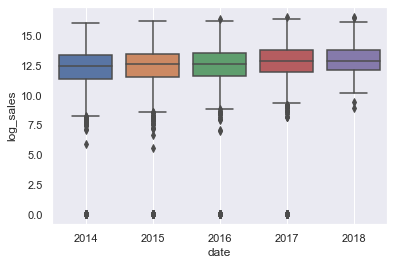

In [19]:
df['date'] = df['date'].astype("datetime64")
sns.boxplot(x = df['date'].dt.year,y = df['log_sales'])
plt.grid();

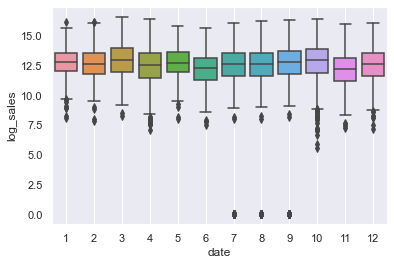

In [20]:
sns.boxplot(x = df['date'].dt.month,y = df['log_sales'])
plt.grid();

In [21]:
monthly_sales_across_years = pd.pivot_table(df, values = 'log_sales', columns = df['date'].dt.month, index = df['date'].dt.year)
monthly_sales_across_years

date         1          2          3          4          5          6   \
date                                                                     
2014        NaN        NaN        NaN  12.020460  12.443415  11.987662   
2015  12.536774  12.408757  12.745961  12.384572  12.655887  11.955730   
2016  12.479016  12.528634  13.020726  12.917880  12.656028  11.963114   
2017  12.801546  12.780599  13.126773  12.361043  13.126994  12.659019   
2018  13.069575  12.852024  13.056617        NaN        NaN        NaN   

date         7          8          9          10         11         12  
date                                                                    
2014  11.241866  11.270849  11.412014  12.253826  11.855503  12.361023  
2015  11.427947  11.361394  11.384063  12.555030  12.214819  12.515344  
2016  11.482731  11.523921  11.719794  12.688826  12.148400  12.367970  
2017  11.847507  11.900185  12.028903  13.018566  12.373778  12.789327  
2018        NaN        NaN        NaN        NaN        NaN        NaN

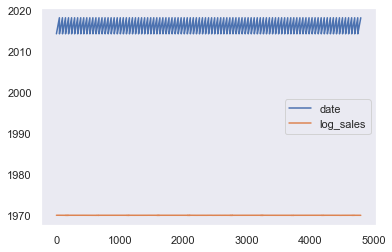

In [22]:
df.plot();
plt.grid()

In [23]:
yearly_sales_across_months = pd.pivot_table(df, values = 'log_sales', columns = df['date'].dt.month, 
                                        index = df['date'].dt.year)

yearly_sales_across_months

date         1          2          3          4          5          6   \
date                                                                     
2014        NaN        NaN        NaN  12.020460  12.443415  11.987662   
2015  12.536774  12.408757  12.745961  12.384572  12.655887  11.955730   
2016  12.479016  12.528634  13.020726  12.917880  12.656028  11.963114   
2017  12.801546  12.780599  13.126773  12.361043  13.126994  12.659019   
2018  13.069575  12.852024  13.056617        NaN        NaN        NaN   

date         7          8          9          10         11         12  
date                                                                    
2014  11.241866  11.270849  11.412014  12.253826  11.855503  12.361023  
2015  11.427947  11.361394  11.384063  12.555030  12.214819  12.515344  
2016  11.482731  11.523921  11.719794  12.688826  12.148400  12.367970  
2017  11.847507  11.900185  12.028903  13.018566  12.373778  12.789327  
2018        NaN        NaN        NaN        NaN        NaN        NaN

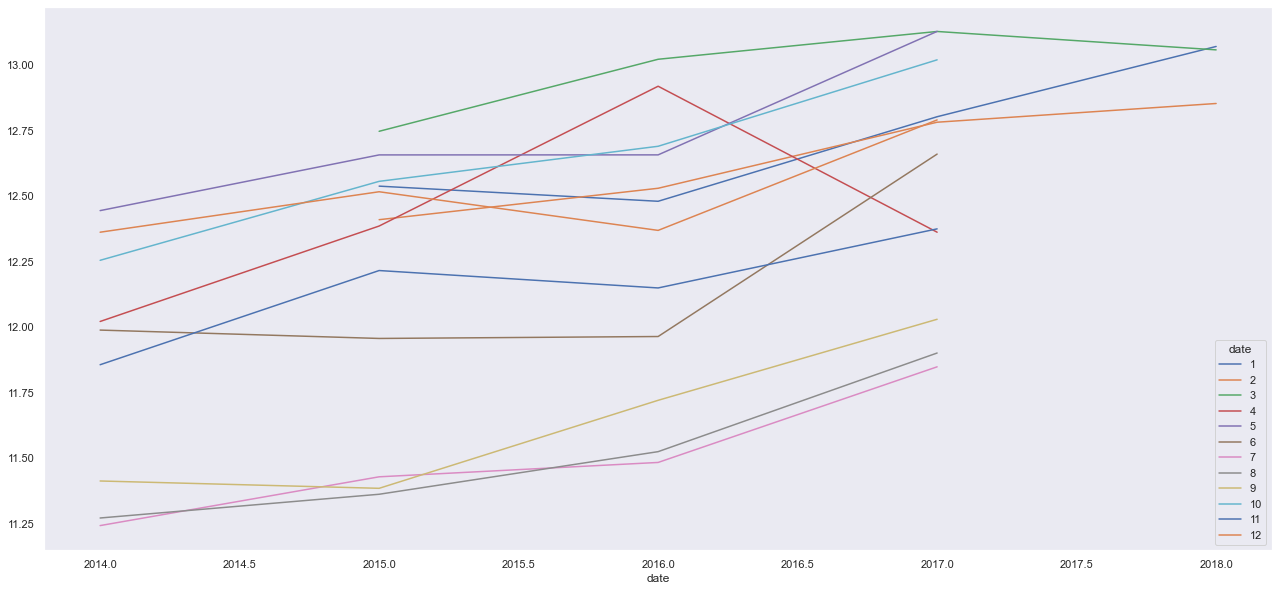

In [24]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

###  Check for Duplicate records

In [25]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [product, date, city, log_sales]
Index: []

### 3. Exploratory Data Analysis

###  1) Univariate Analysis:

C:\Users\Sathyabanu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_sales', ylabel='Density'>

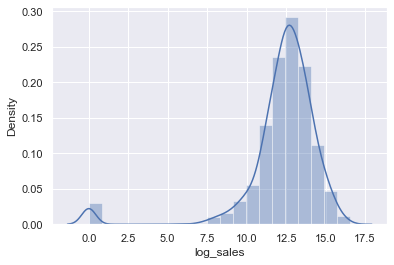

In [26]:
sns.distplot(df.log_sales,bins=20)  # histogram of sales

(array([120.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   6.,  12.,  32.,  33.,  59., 101., 125., 218., 430., 562.,
        806., 729., 643., 425., 264., 153.,  59.,  21.]),
 array([ 0.        ,  0.55268849,  1.10537698,  1.65806547,  2.21075396,
         2.76344245,  3.31613094,  3.86881943,  4.42150792,  4.97419641,
         5.5268849 ,  6.07957339,  6.63226188,  7.18495037,  7.73763886,
         8.29032735,  8.84301584,  9.39570433,  9.94839282, 10.50108131,
        11.0537698 , 11.60645829, 12.15914678, 12.71183527, 13.26452376,
        13.81721225, 14.36990074, 14.92258923, 15.47527772, 16.02796621,
        16.5806547 ]),
 <BarContainer object of 30 artists>)

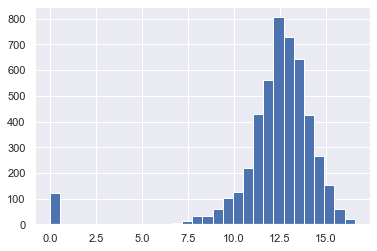

In [27]:
plt.hist(df['log_sales'], bins=30)

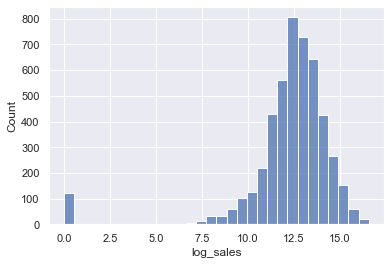

In [28]:
sns.histplot(df['log_sales'], bins=30);

C:\Users\Sathyabanu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_sales', ylabel='Density'>

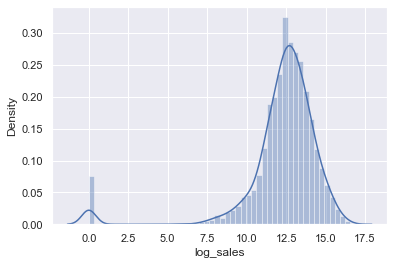

In [29]:
sns.distplot(df['log_sales'])

C:\Users\Sathyabanu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_sales', ylabel='Density'>

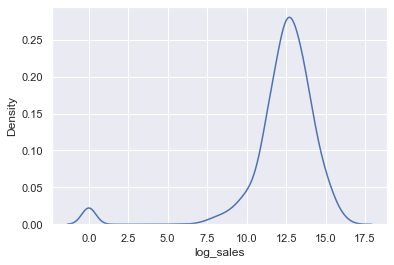

In [30]:
sns.distplot(df['log_sales'], hist=False)

C:\Users\Sathyabanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='log_sales'>

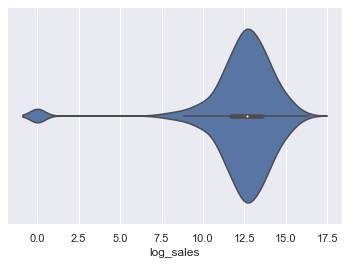

In [31]:
sns.violinplot(df['log_sales'])

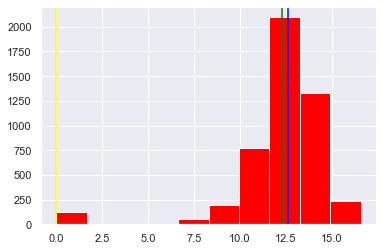

In [32]:
#plt.figure(figsize=(10,10))
plt.hist(df['log_sales'], color='red')
plt.axvline(df['log_sales'].mean(), color='green', label='Mean')
plt.axvline(df['log_sales'].median(), color='blue', label='Median')
plt.axvline(df['log_sales'].mode()[0], color='yellow', label='Mode1')

C:\Users\Sathyabanu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_sales', ylabel='Density'>

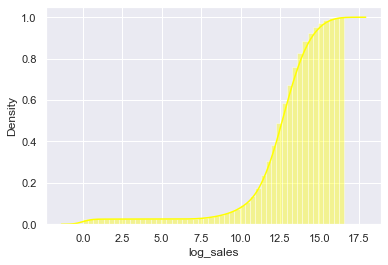

In [33]:
sns.distplot(df['log_sales'],hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True), color='yellow')

In [34]:
df.dtypes.value_counts()

object            2
float64           1
datetime64[ns]    1
dtype: int64

### 2) Bivariate analysis:

### Bar plot: 

### product vs log_sales:

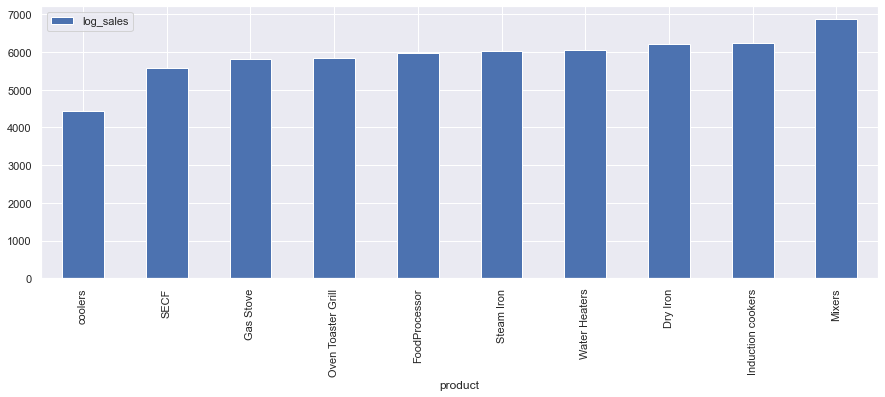

In [35]:
df.groupby(by=['product'])['log_sales'].sum().reset_index().sort_values(['log_sales']).tail(10).plot(x='product',
                                                                                                           y='log_sales',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

### Bar plot to check sales by bottom products 10

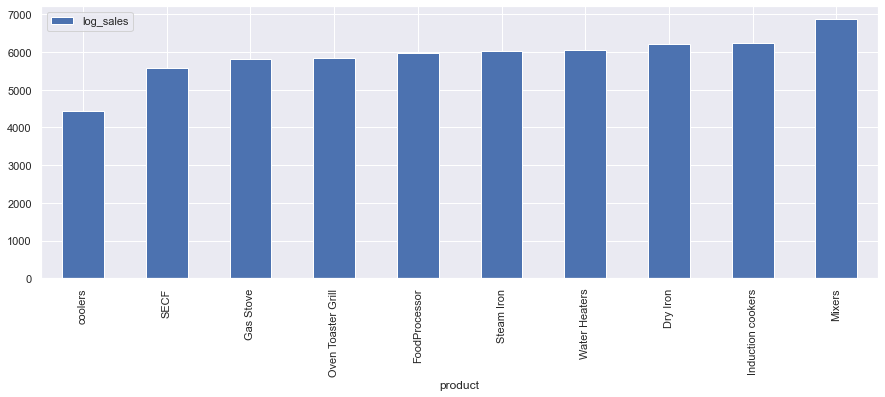

In [36]:
df.groupby(by=['product'])['log_sales'].sum().reset_index().sort_values(['log_sales']
                ).head(10).plot(x='product',y='log_sales',kind='bar', figsize=(15,5))

plt.show()

### city vs log_sales:

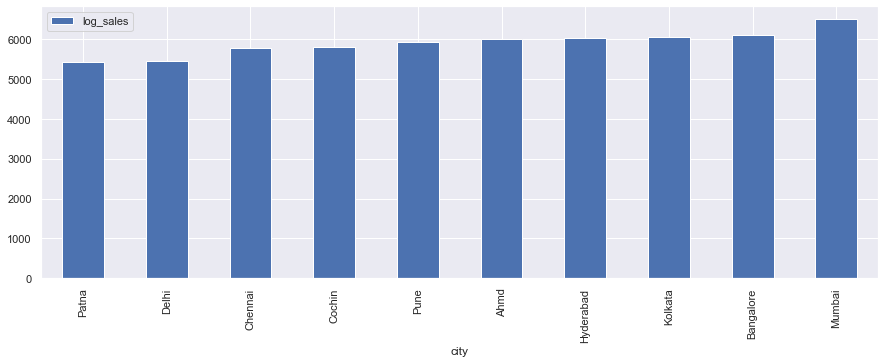

In [37]:
df.groupby(by=['city'])['log_sales'].sum().reset_index().sort_values(['log_sales']).tail(10).plot(x='city',
                                                                                                           y='log_sales',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

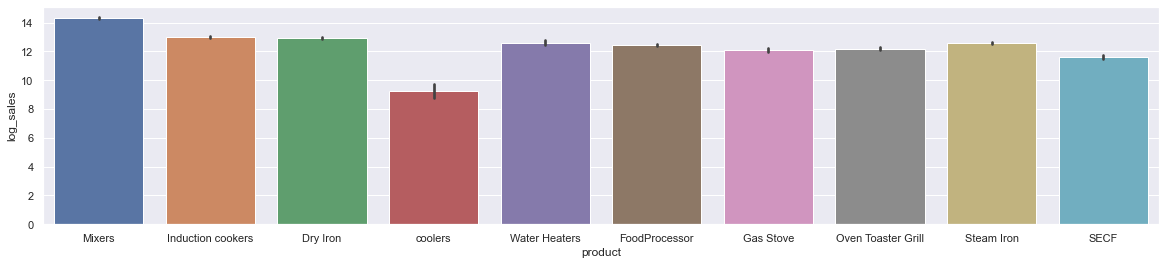

In [38]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="product", y="log_sales", data=df)

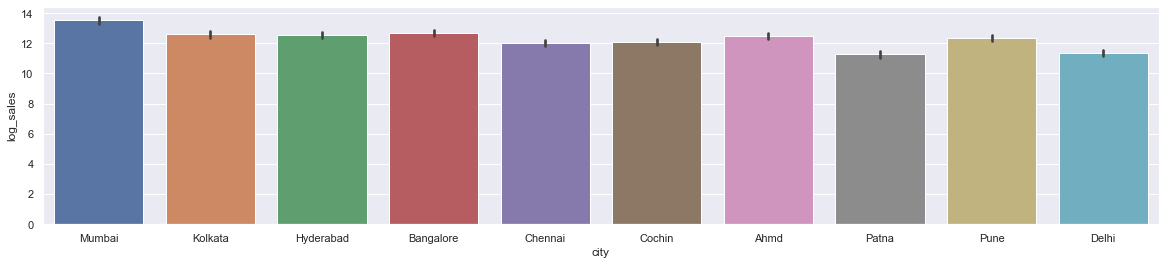

In [39]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="city", y="log_sales", data=df)

### Line plot for product vs log_sales:

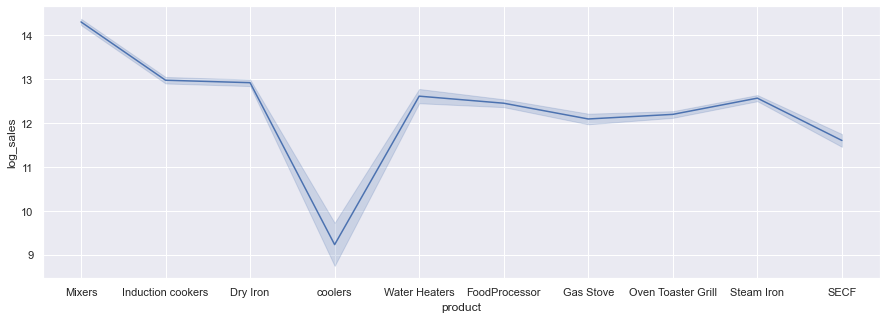

In [40]:
#Here we plotting a line plot. This code might take some time to execute. 
plt.figure(figsize=(15,5))
sns.lineplot(x='product',y='log_sales', data=df )
plt.show()

### Line plot for city vs log_sales:

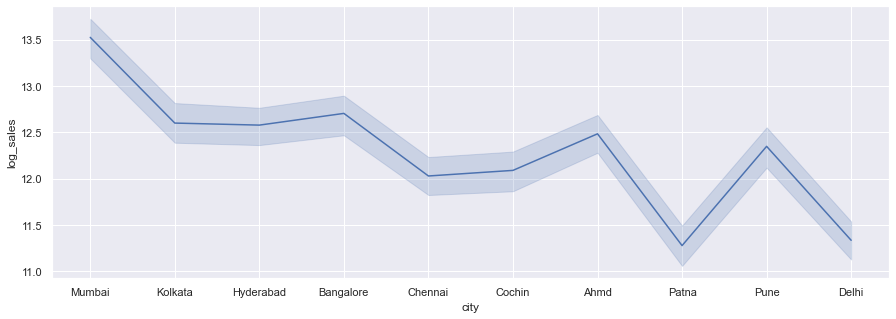

In [41]:
#Here we plotting a line plot. This code might take some time to execute. 
plt.figure(figsize=(15,5))
sns.lineplot(x='city',y='log_sales', data=df )
plt.show()

### bar plot for 2 categorical vs 1 continuous variable:

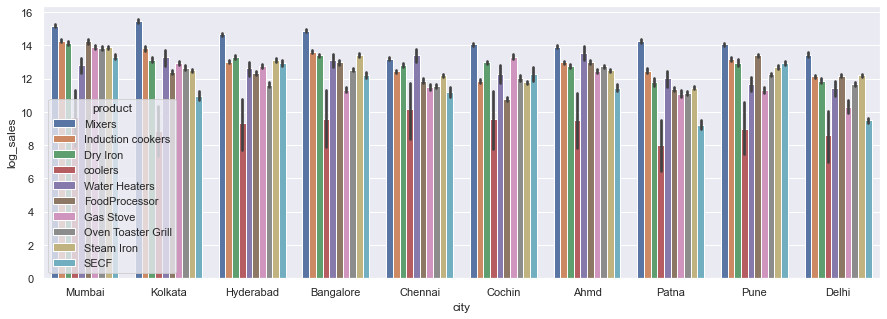

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='city',y='log_sales',hue='product')
plt.show()

### line plot :

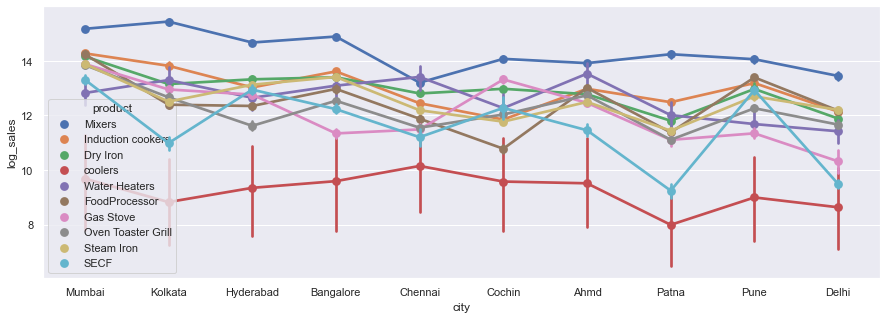

In [43]:
plt.figure(figsize=(15,5))

sns.pointplot(x="city", y="log_sales", hue = 'product',  data=df)
plt.show()


### Distribution of product across log_sales: - violinplot

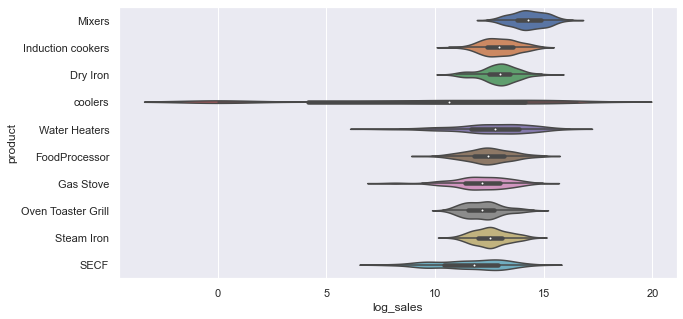

In [44]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df.log_sales, y=df['product'])
plt.show()


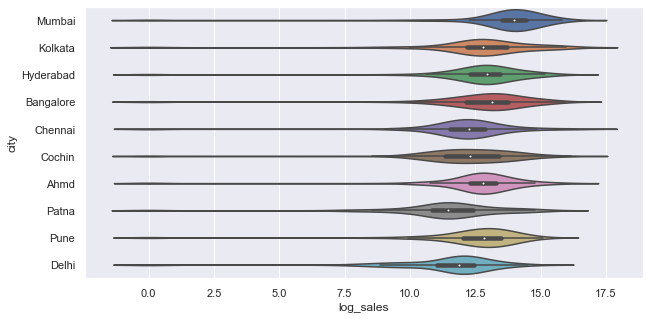

In [45]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df.log_sales, y=df['city'])
plt.show()

### trend line for the log_sales across different years:

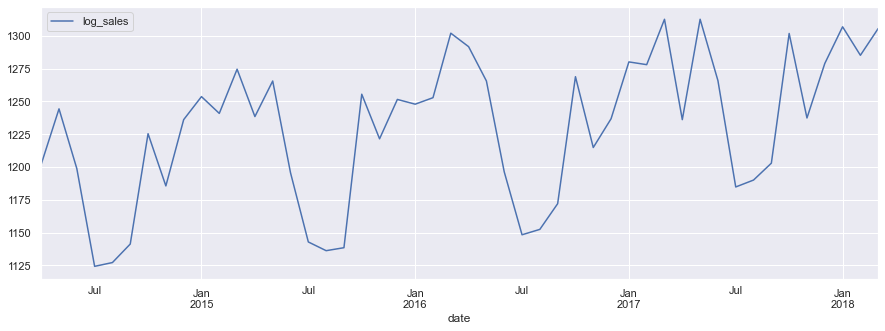

In [46]:
df[['date','log_sales']].groupby(['date']).sum().plot(figsize=(15,5))

plt.show()

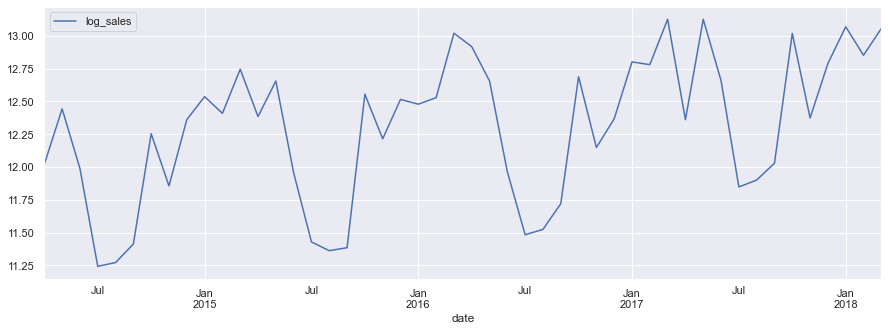

In [47]:
df[['date','log_sales']].groupby(['date']).mean().plot(figsize=(15,5))

plt.show()

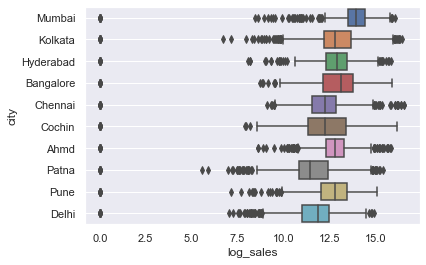

In [48]:
sns.boxplot(x=df['log_sales'],y=df['city'])
plt.grid();

In [49]:
df.cov()

log_sales
log_sales   6.037602

In [50]:
df.corr()

log_sales
log_sales        1.0

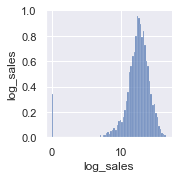

In [51]:
import seaborn as sns

sns.pairplot(df, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

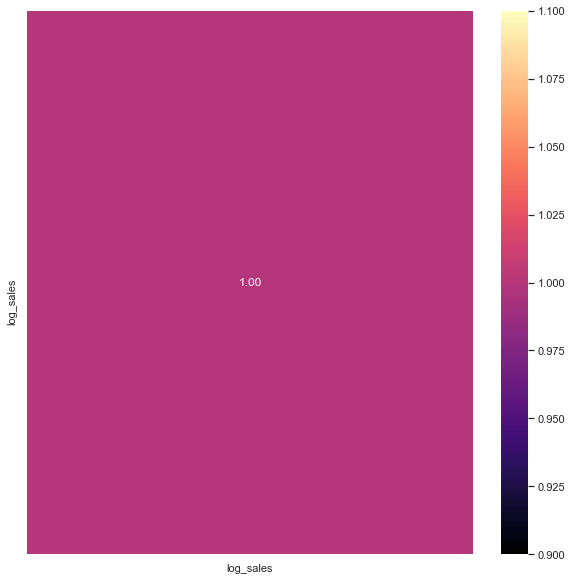

In [52]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

### 3) Check for missing value

In [53]:
# Check for missing value in any column
df.isnull().sum()

product      0
date         0
city         0
log_sales    0
dtype: int64

In [54]:
pd.DataFrame({'value' : df['log_sales'], 'Missing?' : df['log_sales'].isnull()})

value  Missing?
0     14.801084     False
1     15.167372     False
2     14.891420     False
3     15.124847     False
4     15.184412     False
...         ...       ...
4795   8.672144     False
4796   8.916238     False
4797   8.950662     False
4798  10.358568     False
4799  10.495073     False

[4800 rows x 2 columns]

### 4) Outlier Treatment

**To check for outliers, we will be plotting the box plots.**

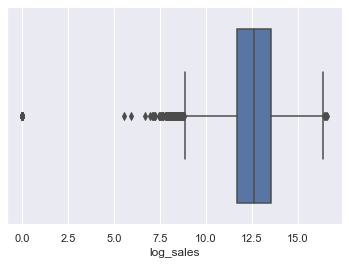

In [55]:
sns.boxplot(x=df['log_sales'])
#df.boxplot(column=['log_sales'])
plt.show()

In [56]:
#def remove_outlier(col):
   # sorted(col)
    #Q1,Q3=col.quantile([0.25,0.75])
    #IQR=Q3-Q1
    #lower_range= Q1-(1.5 * IQR)
    #upper_range= Q3+(1.5 * IQR)
    #return lower_range, upper_range    

In [57]:
#lrincome,urincome=remove_outlier(df['log_sales'])
#df['log_sales']=np.where(df['log_sales']>urincome,urincome,df['log_sales'])
#df['log_sales']=np.where(df['log_sales']<lrincome,lrincome,df['log_sales'])


###  Make Boxplots after Outlier Treatment

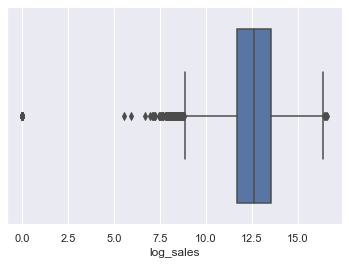

In [58]:
sns.boxplot(x=df['log_sales'])

#df.boxplot(column=['log_sales'])
plt.show()

### 4. Business insights from EDA
a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business b) Any business insights using clustering (if applicable) c) Any other business insights

#### please refer to the business report.

In [59]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

In [60]:
df.groupby('date').count()

product  city  log_sales
date                                
2014-04-01      100   100        100
2014-05-01      100   100        100
2014-06-01      100   100        100
2014-07-01      100   100        100
2014-08-01      100   100        100
2014-09-01      100   100        100
2014-10-01      100   100        100
2014-11-01      100   100        100
2014-12-01      100   100        100
2015-01-01      100   100        100
2015-02-01      100   100        100
2015-03-01      100   100        100
2015-04-01      100   100        100
2015-05-01      100   100        100
2015-06-01      100   100        100
2015-07-01      100   100        100
2015-08-01      100   100        100
2015-09-01      100   100        100
2015-10-01      100   100        100
2015-11-01      100   100        100
2015-12-01      100   100        100
2016-01-01      100   100        100
2016-02-01      100   100        100
2016-03-01      100   100        100
2016-04-01      100   100        100
2016-05-01      100   100        100
2016-06-01      100   100        100
2016-07-01      100   100        100
2016-08-01      100   100        100
2016-09-01      100   100        100
2016-10-01      100   100        100
2016-11-01      100   100        100
2016-12-01      100   100        100
2017-01-01      100   100        100
2017-02-01      100   100        100
2017-03-01      100   100        100
2017-04-01      100   100        100
2017-05-01      100   100        100
2017-06-01      100   100        100
2017-07-01      100   100        100
2017-08-01      100   100        100
2017-09-01      100   100        100
2017-10-01      100   100        100
2017-11-01      100   100        100
2017-12-01      100   100        100
2018-01-01      100   100        100
2018-02-01      100   100        100
2018-03-01      100   100        100

### Goruping of sales by products:

In [61]:
df_DryIron =  df[df['product'] == 'Dry Iron']
df_FoodProcessor =  df[df['product'] == 'FoodProcessor']
df_GasStove =  df[df['product'] == 'Gas Stove']
df_InductionCookers =  df[df['product'] == 'Induction cookers']
df_Mixers =  df[df['product'] == 'Mixers']
df_OvenToasterGrill =  df[df['product'] == 'Oven Toaster Grill']
df_SECF = df[df['product'] == 'SECF']
df_SteamIron =  df[df['product'] == 'Steam Iron']
df_WaterHeaters =  df[df['product'] == 'Water Heaters']
df_Coolers =  df[df['product'] == 'coolers']

**  let us pickup a top 3 products the sales are higher for the mixers, induction cookers and dry iron, build models for each of these 3 products.**

# 1). Model building and interpretation.
## a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes)
## b. Test your predictive model against the test set using various appropriate performance metrics
## c.Interpretation of the model(s)

# Mixers:

In [62]:
df_Mixers = df_Mixers.groupby(['date']).sum()

In [63]:
df_Mixers.shape

(48, 1)

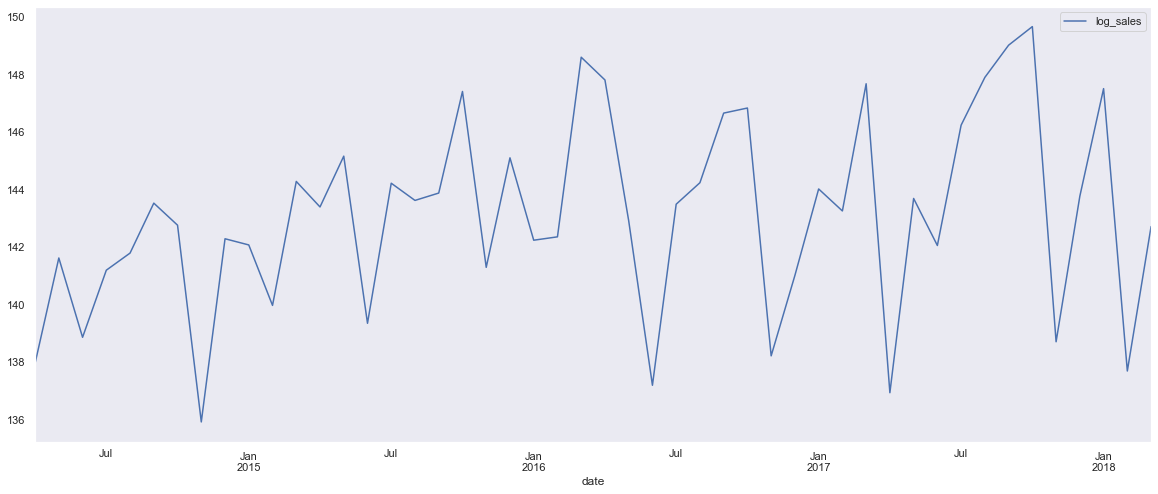

In [64]:
df_Mixers.plot(figsize=(20,8))
plt.grid()

In [65]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

##### Additive decomposition:

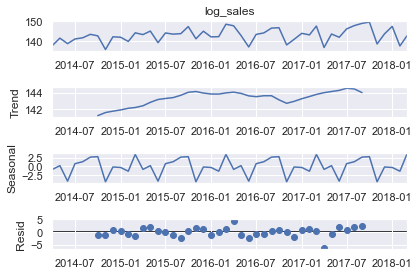

In [66]:
decomposition = seasonal_decompose(df_Mixers['log_sales'], model= 'additive')
decomposition.plot();

** we see that the residuals are located around 0 from the plot of residuals in the decomposition.

In [67]:
trend = decomposition.trend
seasonality= decomposition.seasonal
residual= decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 date
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01    141.247493
2014-11-01    141.621676
2014-12-01    141.789582
2015-01-01    141.935984
2015-02-01    142.138418
2015-03-01    142.229374
Name: trend, dtype: float64 

Seasonality 
 date
2014-04-01   -0.850354
2014-05-01    0.224341
2014-06-01   -4.226557
2014-07-01    0.796771
2014-08-01    1.356916
2014-09-01    2.676316
2014-10-01    2.796703
2014-11-01   -4.412411
2014-12-01   -0.158779
2015-01-01   -0.297724
2015-02-01   -1.369695
2015-03-01    3.464473
Name: seasonal, dtype: float64 

Residual 
 date
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01   -1.282683
2014-11-01   -1.292332
2014-12-01    0.658518
2015-01-01    0.435967
2015-02-01   -0.797787
2015-03-01   -1.410240
Name: resid, dtype: float64 



#### multiplicative model:

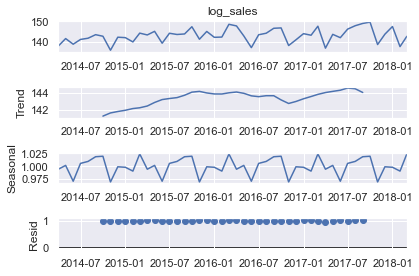

In [68]:
decomposition = seasonal_decompose(df_Mixers['log_sales'],model='multiplicative')
decomposition.plot();

** for the multiplicative model lot of residuals are located around 1.

In [69]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 date
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01    141.247493
2014-11-01    141.621676
2014-12-01    141.789582
2015-01-01    141.935984
2015-02-01    142.138418
2015-03-01    142.229374
Name: trend, dtype: float64 

Seasonality 
 date
2014-04-01    0.994137
2014-05-01    1.001619
2014-06-01    0.970599
2014-07-01    1.005544
2014-08-01    1.009418
2014-09-01    1.018613
2014-10-01    1.019548
2014-11-01    0.969079
2014-12-01    0.998902
2015-01-01    0.997961
2015-02-01    0.990438
2015-03-01    1.024141
Name: seasonal, dtype: float64 

Residual 
 date
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01    0.991340
2014-11-01    0.990340
2014-12-01    1.004628
2015-01-01    1.003019
2015-02-01    0.994258
2015-03-01    0.990531
Name: resid, dtype: float64 



#### Checking stationarity:

In [70]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [71]:
from statsmodels.tsa.stattools import adfuller

In [72]:
dftest = adfuller(df_Mixers,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.739
DF test p-value is 5.4627981436190444e-08
Number of lags used 0


In [73]:
dftest = adfuller(df_Mixers.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.446
DF test p-value is 0.045534269927391256
Number of lags used 10


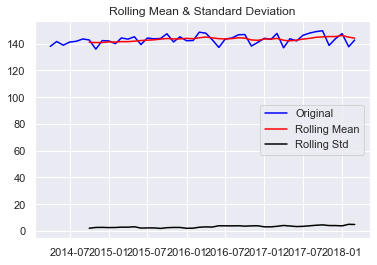

Results of Dickey-Fuller Test:
Test Statistic                -6.421530e+00
p-value                        1.786575e-08
#Lags Used                     0.000000e+00
Number of Observations Used    4.700000e+01
Critical Value (1%)           -3.577848e+00
Critical Value (5%)           -2.925338e+00
Critical Value (10%)          -2.600774e+00
dtype: float64 



In [74]:
test_stationarity(df_Mixers['log_sales'])

##### We see that at 5% significant level the Time Series is non-stationary.
##### Let us take a difference of order 1 and check whether the Time Series is stationary or not.

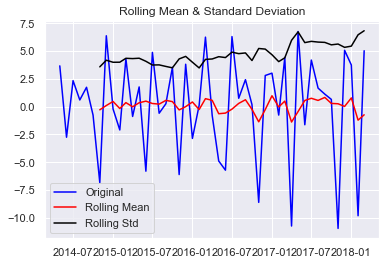

Results of Dickey-Fuller Test:
Test Statistic                 -3.274096
p-value                         0.016077
#Lags Used                     10.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64 



In [75]:
test_stationarity(df_Mixers['log_sales'].diff().dropna())

##### We see that at α = 0.05 the Time Series is indeed stationary.

#### Plot the Auto correlation and Partial Auto correlation function plots:

In [76]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

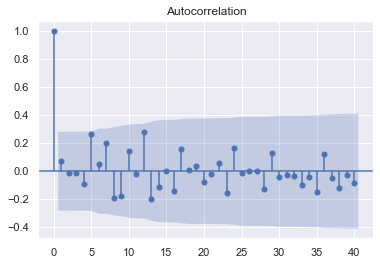

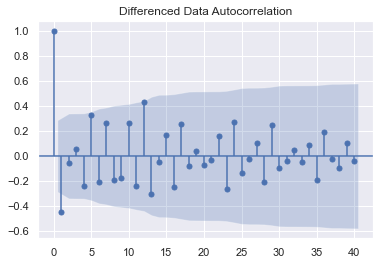

In [77]:
plot_acf(df_Mixers['log_sales'],lags=40)
plot_acf(df_Mixers['log_sales'].diff().dropna(),lags=40,title='Differenced Data Autocorrelation')
plt.show()

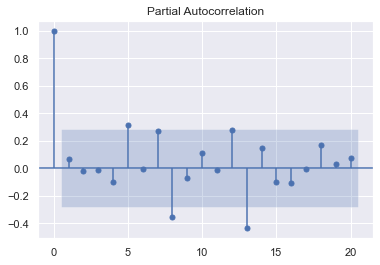

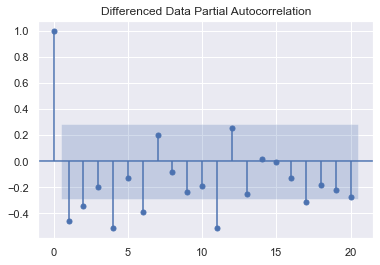

In [78]:
plot_pacf(df_Mixers['log_sales'],lags=20)
plot_pacf(df_Mixers['log_sales'].diff().dropna(),lags=20,title='Differenced Data Partial Autocorrelation')
plt.show()

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
train=df_Mixers.loc['2014-04-01':'2016-12-01']
test=df_Mixers.loc['2017-01-01':'2018-03-01']

#### Check for stationarity of the Training Data Time Series.

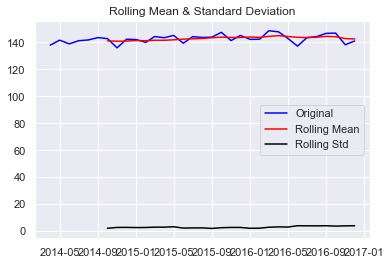

Results of Dickey-Fuller Test:
Test Statistic                 -1.541883
p-value                         0.512700
#Lags Used                      9.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64 



In [81]:
test_stationarity(train['log_sales'])

##### We see that the series is not stationary at α = 0.05.

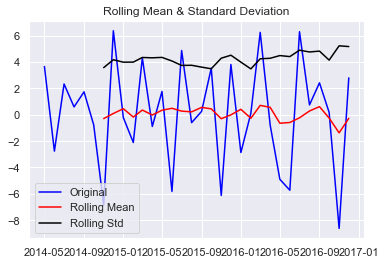

Results of Dickey-Fuller Test:
Test Statistic                 -0.781144
p-value                         0.824598
#Lags Used                      8.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64 



In [82]:
test_stationarity(train['log_sales'].diff().dropna())

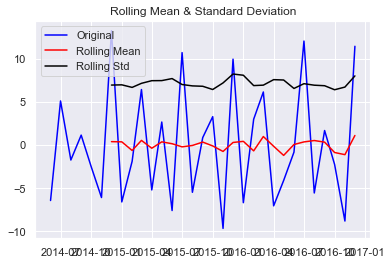

Results of Dickey-Fuller Test:
Test Statistic                 -4.929688
p-value                         0.000031
#Lags Used                      7.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64 



In [83]:
test_stationarity(train['log_sales'].diff().diff(1).dropna())

##### We see that after taking a difference of order 2 the series have become stationary at α = 0.05

#### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [84]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [85]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [86]:
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    ARIMA_model = ARIMA(train['log_sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 0) - AIC:182.7717320390559
ARIMA(0, 1, 1) - AIC:168.16894786513075
ARIMA(0, 1, 2) - AIC:169.99966233726497
ARIMA(1, 1, 0) - AIC:179.53411819285452
ARIMA(1, 1, 1) - AIC:170.06105439599497


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params availa

ARIMA(1, 1, 2) - AIC:168.4715126219313
ARIMA(2, 1, 0) - AIC:178.82351791878648


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 1, 1) - AIC:170.57961805119243
ARIMA(2, 1, 2) - AIC:170.04125010307627


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        F

In [87]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param         AIC
1  (0, 1, 1)  168.168948
5  (1, 1, 2)  168.471513
2  (0, 1, 2)  169.999662
8  (2, 1, 2)  170.041250
4  (1, 1, 1)  170.061054
7  (2, 1, 1)  170.579618
6  (2, 1, 0)  178.823518
3  (1, 1, 0)  179.534118
0  (0, 1, 0)  182.771732

In [88]:
auto_ARIMA = ARIMA(train['log_sales'], order=(0,1,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

                             ARIMA Model Results                              
Dep. Variable:            D.log_sales   No. Observations:                   32
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -81.084
Method:                       css-mle   S.D. of innovations              2.887
Date:                Thu, 19 Aug 2021   AIC                            168.169
Time:                        10:30:14   BIC                            172.566
Sample:                    05-01-2014   HQIC                           169.626
                         - 12-01-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1076      0.053      2.038      0.042       0.004       0.211
ma.L1.D.log_sales    -0.9999      0.116     -8.585      0.000      -1.228      -0.772
                        

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


#### Predict on the Test Set using this model and evaluate the model.

In [89]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))


In [90]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['log_sales'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

4.145353960084054


In [91]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,1)'])

resultsDf

RMSE
ARIMA(0,1,1)  4.145354

#### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

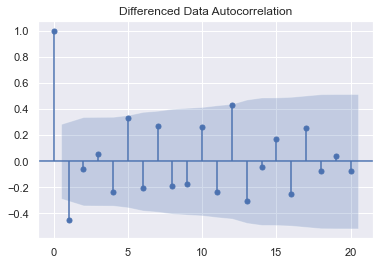

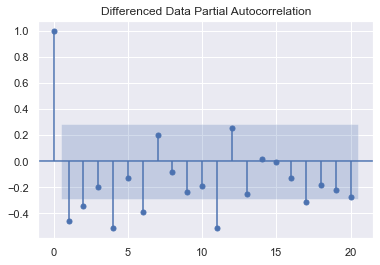

In [92]:
plot_acf(df_Mixers['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plot_pacf(df_Mixers['log_sales'].diff().dropna(),lags=20,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 2.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 1.

In [93]:
manual_ARIMA = ARIMA(train['log_sales'].astype('float64'), order=(2,2,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:           D2.log_sales   No. Observations:                   31
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -85.169
Method:                       css-mle   S.D. of innovations              3.488
Date:                Thu, 19 Aug 2021   AIC                            180.339
Time:                        10:30:16   BIC                            187.509
Sample:                    06-01-2014   HQIC                           182.676
                         - 12-01-2016                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0341      0.040     -0.854      0.393      -0.112       0.044
ar.L1.D2.log_sales    -0.4869      0.171     -2.839      0.005      -0.823      -0.151
ar.L2.D2.log_sales  

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

In [94]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [95]:
rmse = mean_squared_error(test['log_sales'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

9.597655342645092


In [96]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,2,1)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(0,1,1)  4.145354
ARIMA(2,2,1)  9.597655

#### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

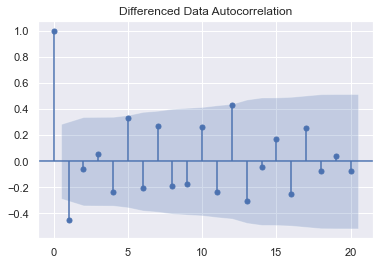

In [97]:
plot_acf(df_Mixers['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plt.show()

##### We see that there can be a seasonality of 5 as well as 12. We will run our auto SARIMA models by setting seasonality both as 5 and 12.

In [98]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 5)
Model: (0, 1, 2)(0, 0, 2, 5)
Model: (1, 1, 0)(1, 0, 0, 5)
Model: (1, 1, 1)(1, 0, 1, 5)
Model: (1, 1, 2)(1, 0, 2, 5)
Model: (2, 1, 0)(2, 0, 0, 5)
Model: (2, 1, 1)(2, 0, 1, 5)
Model: (2, 1, 2)(2, 0, 2, 5)


In [99]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [100]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['log_sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 5) - AIC:175.34460748886855
SARIMA(0, 1, 0)x(0, 0, 1, 5) - AIC:145.52363553015724


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:901: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\Sathyabanu\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 2, 5) - AIC:nan
SARIMA(0, 1, 0)x(1, 0, 0, 5) - AIC:152.4780052314328
SARIMA(0, 1, 0)x(1, 0, 1, 5) - AIC:149.29540001880508


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 2, 5) - AIC:nan
SARIMA(0, 1, 0)x(2, 0, 0, 5) - AIC:126.74982858754231
SARIMA(0, 1, 0)x(2, 0, 1, 5) - AIC:126.60641524202357


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 2, 5) - AIC:nan
SARIMA(0, 1, 1)x(0, 0, 0, 5) - AIC:157.53923296722286
SARIMA(0, 1, 1)x(0, 0, 1, 5) - AIC:126.65837458204552
SARIMA(0, 1, 1)x(0, 0, 2, 5) - AIC:929.4903666309799
SARIMA(0, 1, 1)x(1, 0, 0, 5) - AIC:140.41620785235813
SARIMA(0, 1, 1)x(1, 0, 1, 5) - AIC:128.65788548604854
SARIMA(0, 1, 1)x(1, 0, 2, 5) - AIC:105.68395007621785
SARIMA(0, 1, 1)x(2, 0, 0, 5) - AIC:117.62826155925727
SARIMA(0, 1, 1)x(2, 0, 1, 5) - AIC:115.5753151224401
SARIMA(0, 1, 1)x(2, 0, 2, 5) - AIC:106.00457655354447
SARIMA(0, 1, 2)x(0, 0, 0, 5) - AIC:155.33984361358225
SARIMA(0, 1, 2)x(0, 0, 1, 5) - AIC:124.70157311466679


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 2, 5) - AIC:946.7007004215585
SARIMA(0, 1, 2)x(1, 0, 0, 5) - AIC:142.13413556874085
SARIMA(0, 1, 2)x(1, 0, 1, 5) - AIC:126.6913462360381
SARIMA(0, 1, 2)x(1, 0, 2, 5) - AIC:103.75750945504825
SARIMA(0, 1, 2)x(2, 0, 0, 5) - AIC:118.62454312792205
SARIMA(0, 1, 2)x(2, 0, 1, 5) - AIC:117.32160273968059
SARIMA(0, 1, 2)x(2, 0, 2, 5) - AIC:103.89321934829151
SARIMA(1, 1, 0)x(0, 0, 0, 5) - AIC:172.0959071901735
SARIMA(1, 1, 0)x(0, 0, 1, 5) - AIC:144.61355358453147


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 2, 5) - AIC:1001.8479519632617
SARIMA(1, 1, 0)x(1, 0, 0, 5) - AIC:147.20010808839294
SARIMA(1, 1, 0)x(1, 0, 1, 5) - AIC:146.2392325704421
SARIMA(1, 1, 0)x(1, 0, 2, 5) - AIC:119.81198807293478
SARIMA(1, 1, 0)x(2, 0, 0, 5) - AIC:120.63160571056791
SARIMA(1, 1, 0)x(2, 0, 1, 5) - AIC:117.90509032002458
SARIMA(1, 1, 0)x(2, 0, 2, 5) - AIC:119.32946109453547
SARIMA(1, 1, 1)x(0, 0, 0, 5) - AIC:159.37908836945505
SARIMA(1, 1, 1)x(0, 0, 1, 5) - AIC:128.65252117289498


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 2, 5) - AIC:941.1242605947756
SARIMA(1, 1, 1)x(1, 0, 0, 5) - AIC:137.40674434051786
SARIMA(1, 1, 1)x(1, 0, 1, 5) - AIC:130.6517824025826
SARIMA(1, 1, 1)x(1, 0, 2, 5) - AIC:107.58702517010693
SARIMA(1, 1, 1)x(2, 0, 0, 5) - AIC:112.3173409397658
SARIMA(1, 1, 1)x(2, 0, 1, 5) - AIC:110.31700121476061
SARIMA(1, 1, 1)x(2, 0, 2, 5) - AIC:107.71883389673397
SARIMA(1, 1, 2)x(0, 0, 0, 5) - AIC:153.7455669504427
SARIMA(1, 1, 2)x(0, 0, 1, 5) - AIC:126.63041779037692
SARIMA(1, 1, 2)x(0, 0, 2, 5) - AIC:877.4087040778965
SARIMA(1, 1, 2)x(1, 0, 0, 5) - AIC:136.65433529312963
SARIMA(1, 1, 2)x(1, 0, 1, 5) - AIC:128.51561260730702
SARIMA(1, 1, 2)x(1, 0, 2, 5) - AIC:102.39899653711181
SARIMA(1, 1, 2)x(2, 0, 0, 5) - AIC:110.65857866251406
SARIMA(1, 1, 2)x(2, 0, 1, 5) - AIC:109.08348224189298
SARIMA(1, 1, 2)x(2, 0, 2, 5) - AIC:103.36497691020894
SARIMA(2, 1, 0)x(0, 0, 0, 5) - AIC:166.83157674285872
SARIMA(2, 1, 0)x(0, 0, 1, 5) - AIC:139.71621128624997


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 2, 5) - AIC:1015.0503328691752
SARIMA(2, 1, 0)x(1, 0, 0, 5) - AIC:132.74252732340085
SARIMA(2, 1, 0)x(1, 0, 1, 5) - AIC:131.3680393359565
SARIMA(2, 1, 0)x(1, 0, 2, 5) - AIC:113.34408551493004
SARIMA(2, 1, 0)x(2, 0, 0, 5) - AIC:107.99861272111389
SARIMA(2, 1, 0)x(2, 0, 1, 5) - AIC:109.94936782298683
SARIMA(2, 1, 0)x(2, 0, 2, 5) - AIC:110.56171995620974
SARIMA(2, 1, 1)x(0, 0, 0, 5) - AIC:161.1678688582038
SARIMA(2, 1, 1)x(0, 0, 1, 5) - AIC:127.19729560210446


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 2, 5) - AIC:1076.2506551140225
SARIMA(2, 1, 1)x(1, 0, 0, 5) - AIC:132.9297625627686
SARIMA(2, 1, 1)x(1, 0, 1, 5) - AIC:131.54628316192185
SARIMA(2, 1, 1)x(1, 0, 2, 5) - AIC:104.66962792241007
SARIMA(2, 1, 1)x(2, 0, 0, 5) - AIC:103.42025710980222
SARIMA(2, 1, 1)x(2, 0, 1, 5) - AIC:104.654006728159
SARIMA(2, 1, 1)x(2, 0, 2, 5) - AIC:105.56841079653603
SARIMA(2, 1, 2)x(0, 0, 0, 5) - AIC:155.0232272046412
SARIMA(2, 1, 2)x(0, 0, 1, 5) - AIC:119.7040212750911


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 2, 5) - AIC:953.838782146662
SARIMA(2, 1, 2)x(1, 0, 0, 5) - AIC:130.38100398504594
SARIMA(2, 1, 2)x(1, 0, 1, 5) - AIC:126.95456326419949
SARIMA(2, 1, 2)x(1, 0, 2, 5) - AIC:100.68287231060694
SARIMA(2, 1, 2)x(2, 0, 0, 5) - AIC:105.48965365464703
SARIMA(2, 1, 2)x(2, 0, 1, 5) - AIC:105.4161181747581
SARIMA(2, 1, 2)x(2, 0, 2, 5) - AIC:99.73781949795027


In [101]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal         AIC
80  (2, 1, 2)  (2, 0, 2, 5)   99.737819
77  (2, 1, 2)  (1, 0, 2, 5)  100.682872
50  (1, 1, 2)  (1, 0, 2, 5)  102.398997
53  (1, 1, 2)  (2, 0, 2, 5)  103.364977
69  (2, 1, 1)  (2, 0, 0, 5)  103.420257

In [102]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['log_sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:901: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\Sathyabanu\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   33
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 5)   Log Likelihood                 -40.869
Date:                           Thu, 19 Aug 2021   AIC                             99.738
Time:                                   10:30:34   BIC                            108.238
Sample:                                        0   HQIC                           101.176
                                            - 33                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6254      0.281     -2.227      0.026      -1.176      -0.075
ar.L2         -0.8366      0.251     -3.334

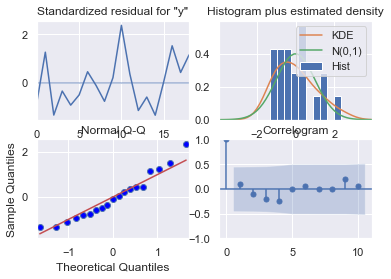

In [103]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [104]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [105]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  143.016479  1.822950     139.443561     146.589396
1  147.107154  1.886106     143.410454     150.803854
2  143.744875  2.185754     139.460876     148.028873
3  140.375160  2.493077     135.488819     145.261501
4  144.253386  2.500389     139.352713     149.154059

In [106]:
rmse = mean_squared_error(test['log_sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

4.1432785626466915


In [107]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(2,1,2)(2,0,2,5)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(0,1,1)            4.145354
ARIMA(2,2,1)            9.597655
SARIMA(2,1,2)(2,0,2,5)  4.143279

#### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [108]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [109]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [110]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['log_sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:175.34460748886855
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:108.01404975355658
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:47.815657120413675
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:98.79270644540883


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:96.64540654506335
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:37.27014062436209
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:46.19127775913635
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:48.191277760693104
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:36.98144531216474
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:157.53923296722286
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:95.25576873079694
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:41.37394375858737
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:101.2411733310662
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:91.51330376520224
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:35.31181927796911
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:45.97462866103992
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:47.974628772819976
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:35.55772957536067
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:155.33984361358225
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:91.92155332257707
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:37.445239058587404
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:96.69562418657084
SARIMA(0, 1, 2)x(1, 0, 

In [111]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal        AIC
44  (1, 1, 1)  (2, 0, 2, 12)  26.751724
26  (0, 1, 2)  (2, 0, 2, 12)  28.561307
53  (1, 1, 2)  (2, 0, 2, 12)  28.952873
80  (2, 1, 2)  (2, 0, 2, 12)  30.948562
60  (2, 1, 0)  (2, 0, 0, 12)  31.170348

In [112]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['log_sales'].values,
                                order=(1, 1, 1),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                   33
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                 -76.458
Date:                                 Thu, 19 Aug 2021   AIC                            166.917
Time:                                         10:30:55   BIC                            177.177
Sample:                                              0   HQIC                           170.318
                                                  - 33                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3172      0.352      0.900      0.368      -0.373       1

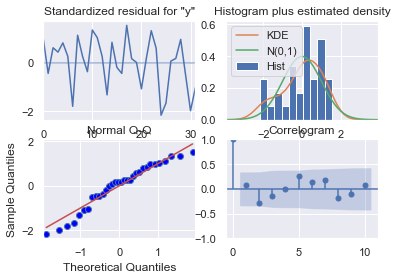

In [113]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()


#### Predict on the Test Set using this model and evaluate the model.

In [114]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [115]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  140.979647  2.296785     136.478031     145.481263
1  141.625040  2.543799     136.639286     146.610794
2  146.024224  2.633780     140.862110     151.186338
3  144.802907  2.607810     139.691693     149.914121
4  142.348568  2.656399     137.142121     147.555015

In [116]:
rmse = mean_squared_error(test['log_sales'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

3.683596921289274


In [117]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,1)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(0,1,1)             4.145354
ARIMA(2,2,1)             9.597655
SARIMA(2,1,2)(2,0,2,5)   4.143279
SARIMA(1,1,1)(2,0,2,12)  3.683597

## Triple exponential smoothing:

In [118]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [119]:
TES_train1 = train.copy()
TES_test1 = test.copy()

In [120]:
model_TES1 = ExponentialSmoothing(TES_train1['log_sales'],trend='additive',seasonal='multiplicative')

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [121]:
model_TES_autofit1 = model_TES1.fit()

In [122]:
model_TES_autofit1.params

{'smoothing_level': 0.23769040164030875,
 'smoothing_trend': 0.23769040164030875,
 'smoothing_seasonal': 0.7623095983596913,
 'damping_trend': nan,
 'initial_level': 138.08873156044694,
 'initial_trend': 0.25958407140113565,
 'initial_seasons': array([0.99717642, 1.01771124, 0.99677102, 1.01651157, 1.01830019,
        1.02996261, 1.02667905, 0.97379784, 1.01387239, 1.0108558 ,
        0.99804137, 1.0264873 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [123]:
## Prediction on the test data

TES_test1['auto_predict'] = model_TES_autofit1.forecast(steps=len(test))
TES_test1.head()

log_sales  auto_predict
date                                
2017-01-01  144.021659    139.970430
2017-02-01  143.256759    139.664174
2017-03-01  147.681491    144.924523
2017-04-01  136.933077    143.100945
2017-05-01  143.691133    138.844289

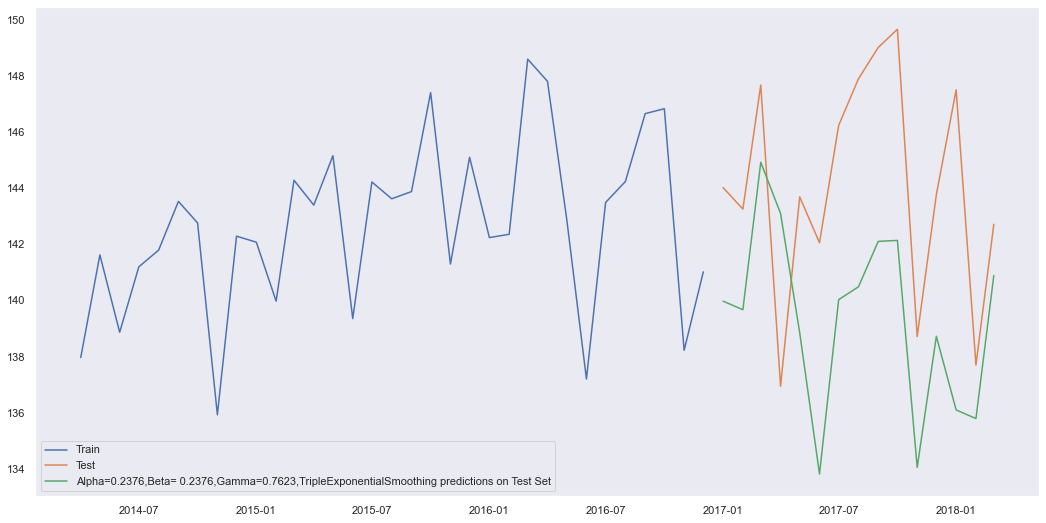

In [124]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train1['log_sales'], label='Train')
plt.plot(TES_test1['log_sales'], label='Test')

plt.plot(TES_test1['auto_predict'], label='Alpha=0.2376,Beta= 0.2376,Gamma=0.7623,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [125]:
from sklearn import metrics

In [126]:
## Test Data

rmse_model_t_test_1 = metrics.mean_squared_error(TES_test1['log_sales'],TES_test1['auto_predict'],squared=False)
print("For Alpha=0.2376,Beta=0.2376,Gamma=0.7623, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model_t_test_1))

For Alpha=0.2376,Beta=0.2376,Gamma=0.7623, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 6.054


In [127]:
results_Df_1 = pd.DataFrame({'Test RMSE': [rmse_model_t_test_1]}
                           ,index=['Alpha=0.2376,Beta=0.2376,Gamma=0.7623,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, results_Df_1])
resultsDf

RMSE  Test RMSE
ARIMA(0,1,1)                                        4.145354        NaN
ARIMA(2,2,1)                                        9.597655        NaN
SARIMA(2,1,2)(2,0,2,5)                              4.143279        NaN
SARIMA(1,1,1)(2,0,2,12)                             3.683597        NaN
Alpha=0.2376,Beta=0.2376,Gamma=0.7623,TripleExp...       NaN   6.053824

In [128]:
## First we will define an empty dataframe to store our values from the loop

results_Df_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
results_Df_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [129]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES1_alpha_i_j_k = model_TES1.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train1['predict',i,j,k] = model_TES1_alpha_i_j_k.fittedvalues
            TES_test1['predict',i,j,k] = model_TES1_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model_2a_train = metrics.mean_squared_error(TES_train1['log_sales'],TES_train1['predict',i,j,k],squared=False)
            
            rmse_model_2a_test = metrics.mean_squared_error(TES_test1['log_sales'],TES_test1['predict',i,j,k],squared=False)
            
            results_Df_2 = results_Df_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model_2a_train,'Test RMSE':rmse_model_2a_test}
                                                 , ignore_index=True)

In [130]:
results_Df_2

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0             0.3          0.3           0.3    2.253751   5.521123
1             0.3          0.3           0.4    2.186046   5.549724
2             0.3          0.3           0.5    2.130876   5.568925
3             0.3          0.3           0.6    2.089263   5.575300
4             0.3          0.3           0.7    2.062060   5.566829
..            ...          ...           ...         ...        ...
507           1.0          1.0           0.6    3.875238  32.215343
508           1.0          1.0           0.7    4.235126  31.410413
509           1.0          1.0           0.8    4.667670  30.610754
510           1.0          1.0           0.9    5.155370  29.829809
511           1.0          1.0           1.0    5.684848  29.086127

[512 rows x 5 columns]

In [131]:
results_Df_2.sort_values(by=['Test RMSE']).head(10)

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
356           0.8          0.7           0.7    2.706269   4.408140
364           0.8          0.8           0.7    2.865563   4.429442
300           0.7          0.8           0.7    2.666898   4.473291
405           0.9          0.5           0.8    2.633245   4.512897
372           0.8          0.9           0.7    3.045132   4.552843
308           0.7          0.9           0.7    2.797805   4.581120
341           0.8          0.5           0.8    2.456879   4.592777
244           0.6          0.9           0.7    2.621907   4.598305
348           0.8          0.6           0.7    2.563746   4.648953
292           0.7          0.7           0.7    2.545990   4.669071

In [132]:
TES_test1.head()

log_sales  auto_predict  (predict, 0.3, 0.3, 0.3)  \
date                                                             
2017-01-01  144.021659    139.970430                141.976701   
2017-02-01  143.256759    139.664174                140.556529   
2017-03-01  147.681491    144.924523                145.164412   
2017-04-01  136.933077    143.100945                141.101682   
2017-05-01  143.691133    138.844289                140.399221   

            (predict, 0.3, 0.3, 0.4)  (predict, 0.3, 0.3, 0.5)  \
date                                                             
2017-01-01                141.623114                141.271206   
2017-02-01                140.568501                140.584887   
2017-03-01                145.406990                145.657277   
2017-04-01                142.029044                142.862551   
2017-05-01                140.259075                140.153303   

            (predict, 0.3, 0.3, 0.6000000000000001)  \
date                                                  
2017-01-01                               140.920905   
2017-02-01                               140.605664   
2017-03-01                               145.915291   
2017-04-01                               143.600730   
2017-05-01                               140.080438   

            (predict, 0.3, 0.3, 0.7000000000000002)  \
date                                                  
2017-01-01                               140.572139   
2017-02-01                               140.630808   
2017-03-01                               146.181053   
2017-04-01                               144.242057   
2017-05-01                               140.039013   

            (predict, 0.3, 0.3, 0.8000000000000003)  \
date                                                  
2017-01-01                               140.224836   
2017-02-01                               140.660299   
2017-03-01                               146.454587   
2017-04-01                               144.784954   
2017-05-01                               140.027559   

            (predict, 0.3, 0.3, 0.9000000000000001)  \
date                                                  
2017-01-01                               139.878928   
2017-02-01                               140.694115   
2017-03-01                               146.735915   
2017-04-01                               145.227790   
2017-05-01                               140.044610   

            (predict, 0.3, 0.3, 1.0000000000000002)  ...  \
date                                                 ...   
2017-01-01                               139.534343  ...   
2017-02-01                               140.732237  ...   
2017-03-01                               147.025064  ...   
2017-04-01                               145.568881  ...   
2017-05-01                               140.088696  ...   

            (predict, 1.0000000000000002, 0.9000000000000001, 0.9000000000000001)  \
date                                                                                
2017-01-01                                         142.360287                       
2017-02-01                                         143.083051                       
2017-03-01                                         141.249044                       
2017-04-01                                         137.042025                       
2017-05-01                                         130.776967                       

            (predict, 1.0000000000000002, 0.9000000000000001, 1.0000000000000002)  \
date                                                                                
2017-01-01                                         142.931040                       
2017-02-01                                         144.369571                       
2017-03-01                                         142.247546                       
2017-04-01                                         138.101118                       
2017-05-01      

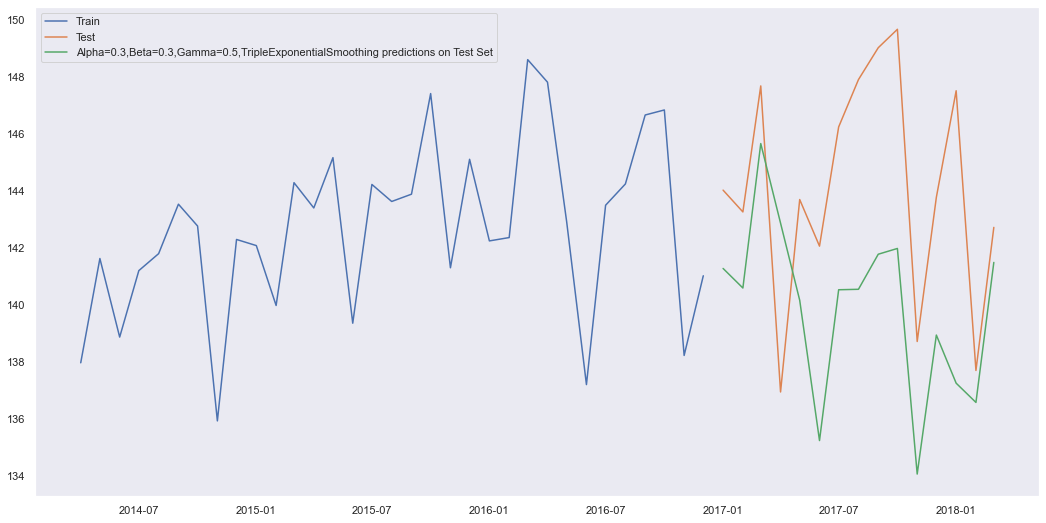

In [133]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train1['log_sales'], label='Train')
plt.plot(TES_test1['log_sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test1['predict', 0.3, 0.3, 0.5], label='Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [134]:
results_Df_3 = pd.DataFrame({'Test RMSE': [results_Df_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, results_Df_3])
resultsDf

RMSE  Test RMSE
ARIMA(0,1,1)                                        4.145354        NaN
ARIMA(2,2,1)                                        9.597655        NaN
SARIMA(2,1,2)(2,0,2,5)                              4.143279        NaN
SARIMA(1,1,1)(2,0,2,12)                             3.683597        NaN
Alpha=0.2376,Beta=0.2376,Gamma=0.7623,TripleExp...       NaN   6.053824
Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialS...       NaN   4.408140

In [135]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



RMSE  Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialS...       NaN   4.408140
Alpha=0.2376,Beta=0.2376,Gamma=0.7623,TripleExp...       NaN   6.053824
ARIMA(0,1,1)                                        4.145354        NaN
ARIMA(2,2,1)                                        9.597655        NaN
SARIMA(2,1,2)(2,0,2,5)                              4.143279        NaN
SARIMA(1,1,1)(2,0,2,12)                             3.683597        NaN

In [136]:
fullmodel_1 = ExponentialSmoothing(df_Mixers,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.2376,
                                                                 smoothing_trend=0.2376,
                                                                 smoothing_seasonal=0.7623)

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [137]:
RMSE_fullmodel_1 = metrics.mean_squared_error(df_Mixers['log_sales'],fullmodel_1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel_1)

RMSE: 2.897536772552387


In [138]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel_1.forecast(steps=len(test))

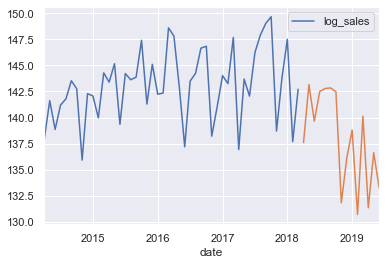

In [139]:
df_Mixers.plot()
prediction_1.plot();

In [140]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel_1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel_1.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
2018-04-01  131.899605  137.598581  143.297557
2018-05-01  137.467179  143.166155  148.865131
2018-06-01  133.952834  139.651810  145.350786
2018-07-01  136.799984  142.498960  148.197936
2018-08-01  137.086255  142.785231  148.484207

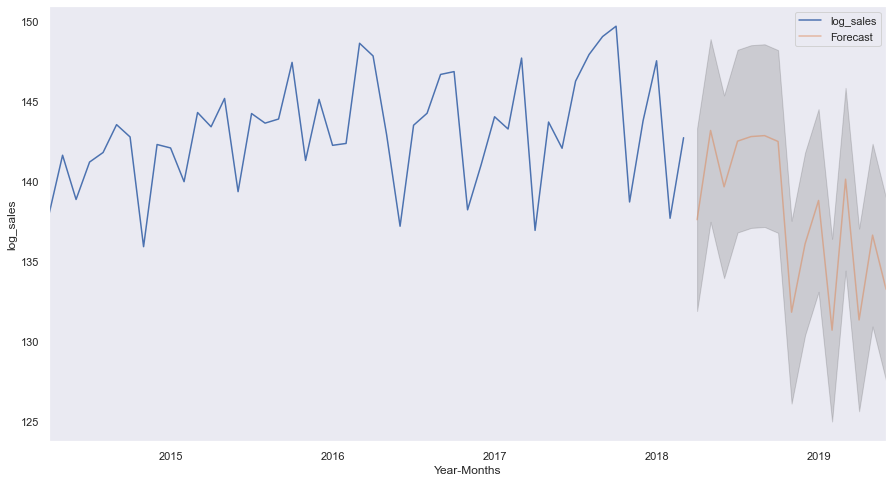

In [141]:
# plot the forecast along with the confidence band

axis = df_Mixers.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('log_sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [142]:
fullmodel_2 = ExponentialSmoothing(df_Mixers,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.3,
                                                                 smoothing_seasonal=0.5)

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [143]:
RMSE_fullmodel_2 = metrics.mean_squared_error(df_Mixers['log_sales'],fullmodel_2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel_2)

RMSE: 2.726914770371464


In [144]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel_2.forecast(steps=len(test))

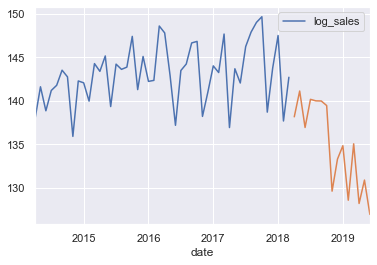

In [145]:
df_Mixers.plot()
prediction_2.plot();

In [146]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel_2.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel_2.resid,ddof=1)})
pred_2_df.head()

lower_CI  prediction    upper_ci
2018-04-01  132.801423  138.169118  143.536812
2018-05-01  135.763777  141.131471  146.499165
2018-06-01  131.574527  136.942222  142.309916
2018-07-01  134.808033  140.175727  145.543422
2018-08-01  134.634798  140.002493  145.370187

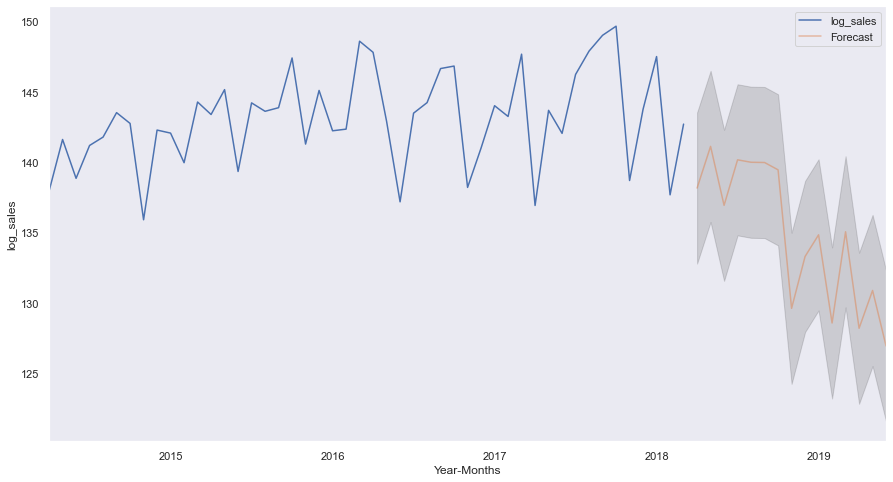

In [147]:
# plot the forecast along with the confidence band

axis = df_Mixers.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('log_sales')
plt.legend(loc='best')
plt.grid()
plt.show()

# Induction Cookers:

In [148]:
df_InductionCookers = df_InductionCookers.groupby(['date']).sum()

In [149]:
df_InductionCookers.shape

(48, 1)

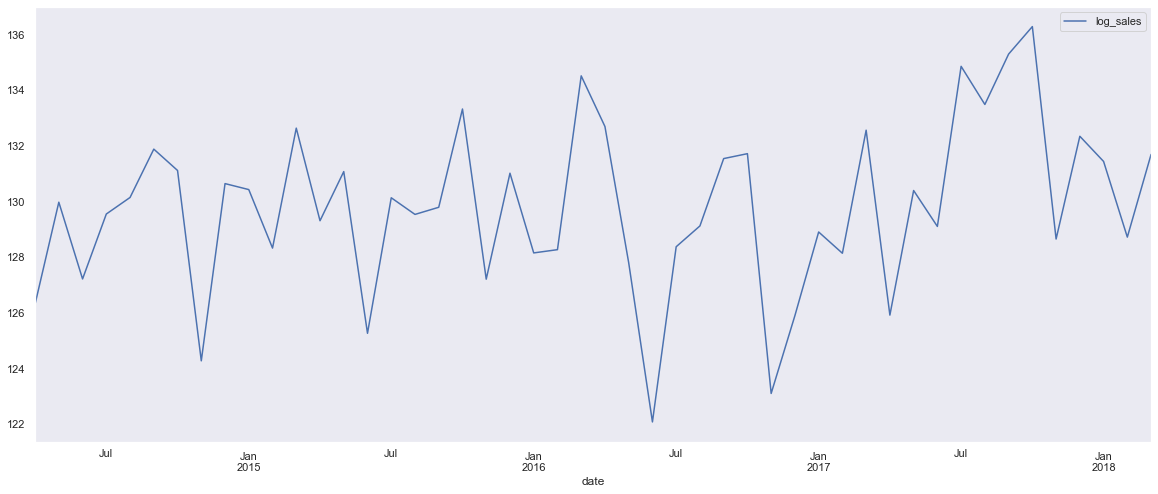

In [150]:
df_InductionCookers.plot(figsize=(20,8))
plt.grid()

In [151]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

#### Additive decomposition:

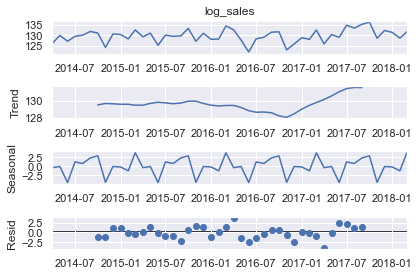

In [152]:
decomposition1 = seasonal_decompose(df_InductionCookers['log_sales'], model= 'additive')
decomposition1.plot();

** we see that the residuals are located around 0 from the plot of residuals in the decomposition.

#### multiplicative model:

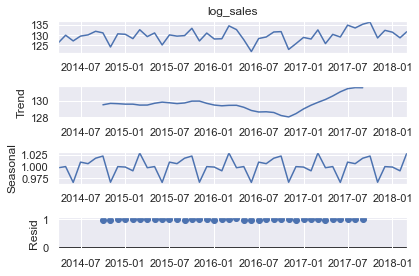

In [153]:
decomposition = seasonal_decompose(df_InductionCookers['log_sales'],model='multiplicative')
decomposition.plot();

In [154]:
trend_1 = decomposition1.trend
seasonality_1= decomposition1.seasonal
residual_1= decomposition1.resid
print('Trend','\n',trend_1.head(12),'\n')
print('Seasonality','\n',seasonality_1.head(12),'\n')
print('Residual','\n',residual_1.head(12),'\n')

Trend 
 date
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01    129.491170
2014-11-01    129.661886
2014-12-01    129.626326
2015-01-01    129.569261
2015-02-01    129.568229
2015-03-01    129.455718
Name: trend, dtype: float64 

Seasonality 
 date
2014-04-01   -0.378636
2014-05-01   -0.061349
2014-06-01   -4.422436
2014-07-01    1.182622
2014-08-01    0.755832
2014-09-01    2.260002
2014-10-01    2.834353
2014-11-01   -4.360547
2014-12-01   -0.065870
2015-01-01   -0.190356
2015-02-01   -1.227546
2015-03-01    3.673931
Name: seasonal, dtype: float64 

Residual 
 date
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01   -1.218597
2014-11-01   -1.038978
2014-12-01    1.074272
2015-01-01    1.040732
2015-02-01   -0.024337
2015-03-01   -0.500635
Name: resid, dtype: float64 



#### Checking stationarity:

In [155]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [156]:
from statsmodels.tsa.stattools import adfuller

In [157]:
dftest1 = adfuller(df_InductionCookers,regression='ct')
print('DF test statistic is %3.3f' %dftest1[0])
print('DF test p-value is' ,dftest1[1])
print('Number of lags used' ,dftest1[2])

DF test statistic is -3.907
DF test p-value is 0.011863261433160735
Number of lags used 10


In [158]:
dftest_1 = adfuller(df_InductionCookers.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest_1[0])
print('DF test p-value is' ,dftest_1[1])
print('Number of lags used' ,dftest_1[2])

DF test statistic is -2.855
DF test p-value is 0.17742359441448946
Number of lags used 10


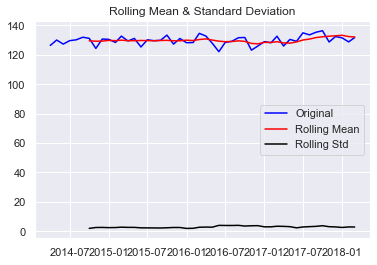

Results of Dickey-Fuller Test:
Test Statistic                 -3.954461
p-value                         0.001669
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64 



In [159]:
test_stationarity(df_InductionCookers['log_sales'])

##### We see that the series is not stationary at α = 0.05.

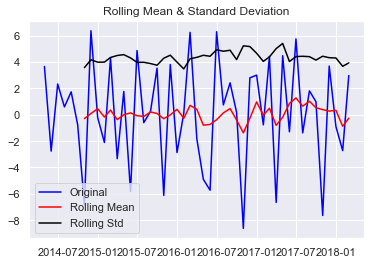

Results of Dickey-Fuller Test:
Test Statistic                 -3.086880
p-value                         0.027540
#Lags Used                     10.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64 



In [160]:
test_stationarity(df_InductionCookers['log_sales'].diff().dropna())

##### We see that at α = 0.05 the Time Series is indeed stationary.

#### Plot the Auto correlation and Partial Auto correlation function plots:

In [161]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

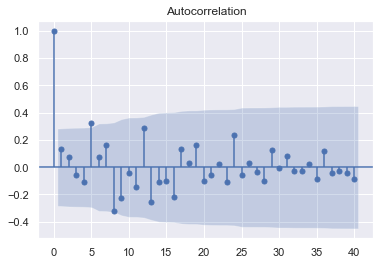

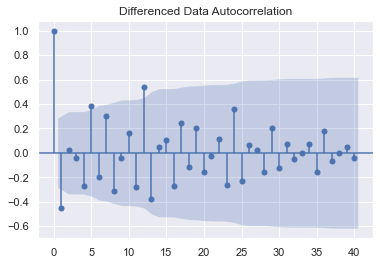

In [162]:
plot_acf(df_InductionCookers['log_sales'],lags=40)
plot_acf(df_InductionCookers['log_sales'].diff().dropna(),lags=40,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


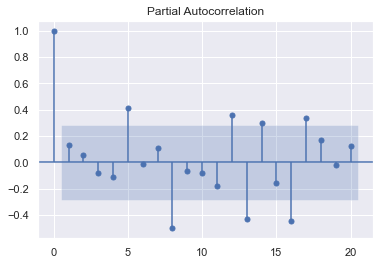

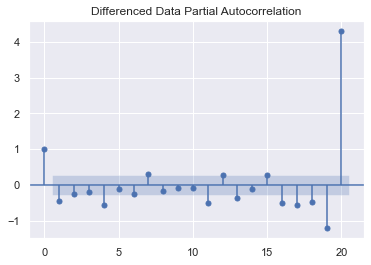

In [163]:
plot_pacf(df_InductionCookers['log_sales'],lags=20)
plot_pacf(df_InductionCookers['log_sales'].diff().dropna(),lags=20,title='Differenced Data Partial Autocorrelation')
plt.show()

In [164]:
train1=df_InductionCookers.loc['2014-04-01':'2016-12-01']
test1=df_InductionCookers.loc['2017-01-01':'2018-03-01']

#### Check for stationarity of the Training Data Time Series.

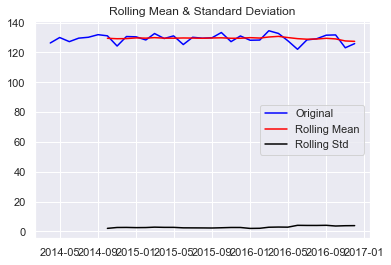

Results of Dickey-Fuller Test:
Test Statistic                 -2.122400
p-value                         0.235603
#Lags Used                     10.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64 



In [165]:
test_stationarity(train1['log_sales'])

##### We see that the series is not stationary at α = 0.05.

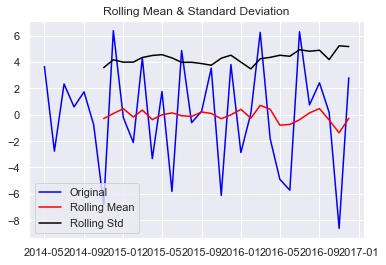

Results of Dickey-Fuller Test:
Test Statistic                -6.785719e+00
p-value                        2.435147e-09
#Lags Used                     5.000000e+00
Number of Observations Used    2.600000e+01
Critical Value (1%)           -3.711212e+00
Critical Value (5%)           -2.981247e+00
Critical Value (10%)          -2.630095e+00
dtype: float64 



In [166]:
test_stationarity(train1['log_sales'].diff().dropna())

#### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [167]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [168]:
# Creating an empty Dataframe with column names only
ARIMA_AIC1 = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC1

Empty DataFrame
Columns: [param, AIC]
Index: []

In [169]:
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    ARIMA_model1 = ARIMA(train1['log_sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model1.aic))
    ARIMA_AIC1 = ARIMA_AIC1.append({'param':param, 'AIC': ARIMA_model1.aic}, ignore_index=True)


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 0, 0) - AIC:166.4873688445791
ARIMA(0, 0, 1) - AIC:168.48730032575185
ARIMA(0, 0, 2) - AIC:165.51992707035285
ARIMA(1, 0, 0) - AIC:168.4873303976005


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        F

ARIMA(1, 0, 1) - AIC:168.276917896334
ARIMA(1, 0, 2) - AIC:167.4789043237562
ARIMA(2, 0, 0) - AIC:168.69426131872785
ARIMA(2, 0, 1) - AIC:167.45916115451524


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 0, 2) - AIC:168.16186260031748


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [170]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC1.sort_values(by='AIC',ascending=True)

param         AIC
2  (0, 0, 2)  165.519927
0  (0, 0, 0)  166.487369
7  (2, 0, 1)  167.459161
5  (1, 0, 2)  167.478904
8  (2, 0, 2)  168.161863
4  (1, 0, 1)  168.276918
1  (0, 0, 1)  168.487300
3  (1, 0, 0)  168.487330
6  (2, 0, 0)  168.694261

In [171]:
auto_ARIMA1 = ARIMA(train1['log_sales'], order=(0,0,2))

results_auto_ARIMA1 = auto_ARIMA1.fit()

print(results_auto_ARIMA1.summary())

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

                              ARMA Model Results                              
Dep. Variable:              log_sales   No. Observations:                   33
Model:                     ARMA(0, 2)   Log Likelihood                 -78.760
Method:                       css-mle   S.D. of innovations              2.500
Date:                Thu, 19 Aug 2021   AIC                            165.520
Time:                        10:31:27   BIC                            171.506
Sample:                    04-01-2014   HQIC                           167.534
                         - 12-01-2016                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             129.4512      0.076   1704.170      0.000     129.302     129.600
ma.L1.log_sales    -0.1984      0.197     -1.006      0.314      -0.585       0.188
ma.L2.log_sales    -0.8016      

#### Predict on the Test Set using this model and evaluate the model.

In [172]:
predicted_auto_ARIMA1 = results_auto_ARIMA1.forecast(steps=len(test1))


In [173]:
from sklearn.metrics import  mean_squared_error
rmse1 = mean_squared_error(test1['log_sales'],predicted_auto_ARIMA1[0],squared=False)
print(rmse1)

3.805308871175444


In [174]:
results_Df = pd.DataFrame({'RMSE': [rmse1]}
                           ,index=['ARIMA(0,0,2)'])

results_Df

RMSE
ARIMA(0,0,2)  3.805309

#### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


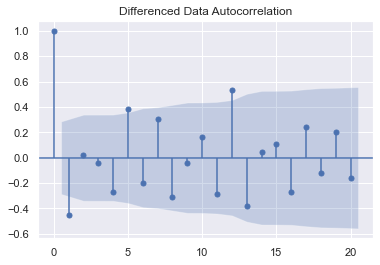

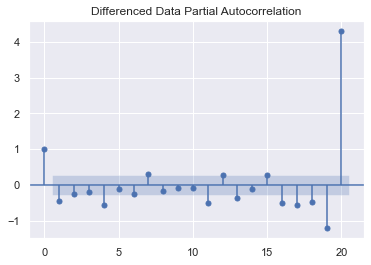

In [175]:
plot_acf(df_InductionCookers['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plot_pacf(df_InductionCookers['log_sales'].diff().dropna(),lags=20,title='Differenced Data Partial Autocorrelation')
plt.show()

In [176]:
manual_ARIMA1 = ARIMA(train1['log_sales'].astype('float64'), order=(1,1,1))

results_manual_ARIMA1 = manual_ARIMA1.fit()

print(results_manual_ARIMA1.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_sales   No. Observations:                   32
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -80.827
Method:                       css-mle   S.D. of innovations              2.866
Date:                Thu, 19 Aug 2021   AIC                            169.653
Time:                        10:31:28   BIC                            175.516
Sample:                    05-01-2014   HQIC                           171.596
                         - 12-01-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0324      0.053     -0.608      0.543      -0.137       0.072
ar.L1.D.log_sales     0.0184      0.184      0.100      0.920      -0.342       0.379
ma.L1.D.log_sales    -1.

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

In [177]:
predicted_manual_ARIMA1 = results_manual_ARIMA1.forecast(steps=len(test1))

In [178]:
rmse1 = mean_squared_error(test1['log_sales'],predicted_manual_ARIMA1[0],squared=False)
print(rmse1)

3.997763781602704


In [179]:
temp_results_Df = pd.DataFrame({'RMSE': [rmse1]}
                           ,index=['ARIMA(1,1,1)'])


results_Df = pd.concat([results_Df,temp_results_Df])

results_Df




RMSE
ARIMA(0,0,2)  3.805309
ARIMA(1,1,1)  3.997764

#### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

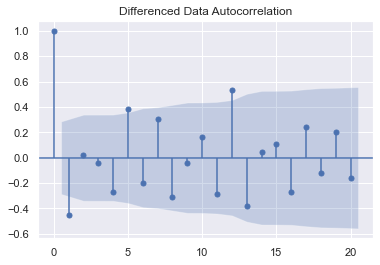

In [180]:
plot_acf(df_InductionCookers['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plt.show()

#### Setting the seasonality as 5 for the first iteration of the auto SARIMA model.

In [181]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 5)
Model: (0, 1, 2)(0, 0, 2, 5)
Model: (1, 1, 0)(1, 0, 0, 5)
Model: (1, 1, 1)(1, 0, 1, 5)
Model: (1, 1, 2)(1, 0, 2, 5)
Model: (2, 1, 0)(2, 0, 0, 5)
Model: (2, 1, 1)(2, 0, 1, 5)
Model: (2, 1, 2)(2, 0, 2, 5)


In [182]:
SARIMA_AIC1 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC1

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [183]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model1 = sm.tsa.statespace.SARIMAX(train1['log_sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA1 = SARIMA_model1.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA1.aic))
        SARIMA_AIC1 = SARIMA_AIC1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA1.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 5) - AIC:176.1607821278347
SARIMA(0, 1, 0)x(0, 0, 1, 5) - AIC:146.29266721292166
SARIMA(0, 1, 0)x(0, 0, 2, 5) - AIC:nan
SARIMA(0, 1, 0)x(1, 0, 0, 5) - AIC:152.28244297927114


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:901: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\Sathyabanu\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 1, 5) - AIC:149.14816958634145
SARIMA(0, 1, 0)x(1, 0, 2, 5) - AIC:nan
SARIMA(0, 1, 0)x(2, 0, 0, 5) - AIC:126.60803771222497


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 5) - AIC:127.40714400619453
SARIMA(0, 1, 0)x(2, 0, 2, 5) - AIC:nan
SARIMA(0, 1, 1)x(0, 0, 0, 5) - AIC:155.93811139067017


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 1, 5) - AIC:126.54556503524589
SARIMA(0, 1, 1)x(0, 0, 2, 5) - AIC:877.5762404470554
SARIMA(0, 1, 1)x(1, 0, 0, 5) - AIC:141.1271267940917
SARIMA(0, 1, 1)x(1, 0, 1, 5) - AIC:128.50440984009595
SARIMA(0, 1, 1)x(1, 0, 2, 5) - AIC:107.24064642772571
SARIMA(0, 1, 1)x(2, 0, 0, 5) - AIC:118.21066488114039
SARIMA(0, 1, 1)x(2, 0, 1, 5) - AIC:118.06714399976661
SARIMA(0, 1, 1)x(2, 0, 2, 5) - AIC:108.74803377695001
SARIMA(0, 1, 2)x(0, 0, 0, 5) - AIC:153.91900423135115
SARIMA(0, 1, 2)x(0, 0, 1, 5) - AIC:124.83608177046669
SARIMA(0, 1, 2)x(0, 0, 2, 5) - AIC:721.3058997929624
SARIMA(0, 1, 2)x(1, 0, 0, 5) - AIC:142.8503023011854
SARIMA(0, 1, 2)x(1, 0, 1, 5) - AIC:126.82281651417246
SARIMA(0, 1, 2)x(1, 0, 2, 5) - AIC:104.9740259631944
SARIMA(0, 1, 2)x(2, 0, 0, 5) - AIC:119.96482594397497
SARIMA(0, 1, 2)x(2, 0, 1, 5) - AIC:119.9189649007018
SARIMA(0, 1, 2)x(2, 0, 2, 5) - AIC:106.5237260777709
SARIMA(1, 1, 0)x(0, 0, 0, 5) - AIC:172.246271672631
SARIMA(1, 1, 0)x(0, 0, 1, 5) - AIC:14

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 2, 5) - AIC:694.789184762532
SARIMA(1, 1, 0)x(1, 0, 0, 5) - AIC:146.74916572425215
SARIMA(1, 1, 0)x(1, 0, 1, 5) - AIC:146.71211079093447
SARIMA(1, 1, 0)x(1, 0, 2, 5) - AIC:120.21170969106757
SARIMA(1, 1, 0)x(2, 0, 0, 5) - AIC:120.05594743483998
SARIMA(1, 1, 0)x(2, 0, 1, 5) - AIC:119.82490737743295
SARIMA(1, 1, 0)x(2, 0, 2, 5) - AIC:121.80973112604242
SARIMA(1, 1, 1)x(0, 0, 0, 5) - AIC:157.928522968852
SARIMA(1, 1, 1)x(0, 0, 1, 5) - AIC:128.54473871968497


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 2, 5) - AIC:813.4045657359753
SARIMA(1, 1, 1)x(1, 0, 0, 5) - AIC:136.906330394952
SARIMA(1, 1, 1)x(1, 0, 1, 5) - AIC:130.50403381371905
SARIMA(1, 1, 1)x(1, 0, 2, 5) - AIC:109.12019914745272
SARIMA(1, 1, 1)x(2, 0, 0, 5) - AIC:113.56099392559388
SARIMA(1, 1, 1)x(2, 0, 1, 5) - AIC:113.92461569386725
SARIMA(1, 1, 1)x(2, 0, 2, 5) - AIC:110.65006396793288
SARIMA(1, 1, 2)x(0, 0, 0, 5) - AIC:153.17961772419932
SARIMA(1, 1, 2)x(0, 0, 1, 5) - AIC:126.44114540729223
SARIMA(1, 1, 2)x(0, 0, 2, 5) - AIC:812.9751361967604
SARIMA(1, 1, 2)x(1, 0, 0, 5) - AIC:138.48474857041444
SARIMA(1, 1, 2)x(1, 0, 1, 5) - AIC:128.76125887780253
SARIMA(1, 1, 2)x(1, 0, 2, 5) - AIC:104.08928263655112
SARIMA(1, 1, 2)x(2, 0, 0, 5) - AIC:112.5021751777177
SARIMA(1, 1, 2)x(2, 0, 1, 5) - AIC:112.8445076996052
SARIMA(1, 1, 2)x(2, 0, 2, 5) - AIC:105.91198410937602
SARIMA(2, 1, 0)x(0, 0, 0, 5) - AIC:167.70128305277677
SARIMA(2, 1, 0)x(0, 0, 1, 5) - AIC:142.1201861504627


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 2, 5) - AIC:966.0726182387629
SARIMA(2, 1, 0)x(1, 0, 0, 5) - AIC:134.73970203246313
SARIMA(2, 1, 0)x(1, 0, 1, 5) - AIC:135.05491790497442
SARIMA(2, 1, 0)x(1, 0, 2, 5) - AIC:117.08046949591248
SARIMA(2, 1, 0)x(2, 0, 0, 5) - AIC:111.73923275228042
SARIMA(2, 1, 0)x(2, 0, 1, 5) - AIC:113.7361640750097
SARIMA(2, 1, 0)x(2, 0, 2, 5) - AIC:114.23059801229552
SARIMA(2, 1, 1)x(0, 0, 0, 5) - AIC:159.21800936001094
SARIMA(2, 1, 1)x(0, 0, 1, 5) - AIC:128.36322820238325


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 2, 5) - AIC:825.2803877846044
SARIMA(2, 1, 1)x(1, 0, 0, 5) - AIC:130.58349689355254
SARIMA(2, 1, 1)x(1, 0, 1, 5) - AIC:132.06503931714792
SARIMA(2, 1, 1)x(1, 0, 2, 5) - AIC:110.09646137568322
SARIMA(2, 1, 1)x(2, 0, 0, 5) - AIC:109.56602500130847
SARIMA(2, 1, 1)x(2, 0, 1, 5) - AIC:110.22289233773225
SARIMA(2, 1, 1)x(2, 0, 2, 5) - AIC:111.71657776467063
SARIMA(2, 1, 2)x(0, 0, 0, 5) - AIC:154.4323749279225
SARIMA(2, 1, 2)x(0, 0, 1, 5) - AIC:124.88090146870293


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 2, 5) - AIC:771.9845449276504
SARIMA(2, 1, 2)x(1, 0, 0, 5) - AIC:131.41407704191107
SARIMA(2, 1, 2)x(1, 0, 1, 5) - AIC:127.98979178648372
SARIMA(2, 1, 2)x(1, 0, 2, 5) - AIC:104.31058321918935
SARIMA(2, 1, 2)x(2, 0, 0, 5) - AIC:109.17019743796439
SARIMA(2, 1, 2)x(2, 0, 1, 5) - AIC:109.58808975961358
SARIMA(2, 1, 2)x(2, 0, 2, 5) - AIC:105.98537976093819


In [184]:
SARIMA_AIC1.sort_values(by=['AIC']).head()

param      seasonal         AIC
50  (1, 1, 2)  (1, 0, 2, 5)  104.089283
77  (2, 1, 2)  (1, 0, 2, 5)  104.310583
23  (0, 1, 2)  (1, 0, 2, 5)  104.974026
53  (1, 1, 2)  (2, 0, 2, 5)  105.911984
80  (2, 1, 2)  (2, 0, 2, 5)  105.985380

In [185]:
import statsmodels.api as sm

auto_SARIMA1 = sm.tsa.statespace.SARIMAX(train1['log_sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA1 = auto_SARIMA1.fit(maxiter=1000)
print(results_auto_SARIMA1.summary())

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:901: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\Sathyabanu\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   33
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 5)   Log Likelihood                 -45.045
Date:                           Thu, 19 Aug 2021   AIC                            104.089
Time:                                   10:31:42   BIC                            110.700
Sample:                                        0   HQIC                           105.208
                                            - 33                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4231      0.392     -1.078      0.281      -1.192       0.346
ma.L1      -3.214e-06   4.86e+04  -6.61e-11

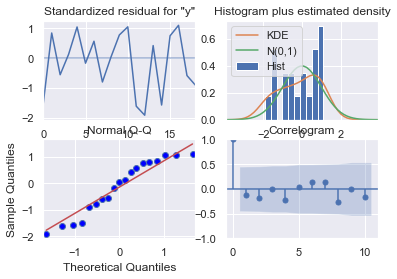

In [186]:
results_auto_SARIMA1.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [187]:
predicted_auto_SARIMA1 = results_auto_SARIMA1.get_forecast(steps=len(test1))

In [188]:
predicted_auto_SARIMA1.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  126.728217  2.332470     122.156660     131.299773
1  129.505577  2.648847     124.313931     134.697222
2  131.998179  2.665361     126.774167     137.222191
3  127.290741  2.676930     122.044053     132.537428
4  126.512767  2.669634     121.280380     131.745153

In [189]:
rmse1 = mean_squared_error(test1['log_sales'],predicted_auto_SARIMA1.predicted_mean,squared=False)
print(rmse1)

3.7060150020536198


In [190]:
temp_results_Df = pd.DataFrame({'RMSE': [rmse1]}
                           ,index=['SARIMA(1,1,2)(1,0,2,5)'])


results_Df = pd.concat([results_Df,temp_results_Df])

results_Df

RMSE
ARIMA(0,0,2)            3.805309
ARIMA(1,1,1)            3.997764
SARIMA(1,1,2)(1,0,2,5)  3.706015

#### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [191]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [192]:
SARIMA_AIC_1 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_1

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [193]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_1 = sm.tsa.statespace.SARIMAX(train1['log_sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_1 = SARIMA_model_1.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_1.aic))
        SARIMA_AIC_1 = SARIMA_AIC_1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_1.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:176.1607821278347
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:108.18396434442056
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:47.815636742609655
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:99.00832812394276
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:96.88146077311487


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:37.27009957378175
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:46.19124771700537
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:48.191247717678735
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:36.98136311901785
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:155.93811139067017
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:97.18969037262725
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:41.37391547777274
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:100.02031561111498
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:89.6896343348487
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:35.31177789456552
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:45.975799108249234
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:47.975799131483015
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:35.55765672940697
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:153.91900423135115
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:93.44249606743966
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:37.44523568868978
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:96.32152496509441
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:84.16077531590551
SARIMA(0, 1, 2)x(1, 0, 

In [194]:
SARIMA_AIC_1.sort_values(by=['AIC']).head()

param       seasonal        AIC
44  (1, 1, 1)  (2, 0, 2, 12)  26.751719
26  (0, 1, 2)  (2, 0, 2, 12)  28.561235
53  (1, 1, 2)  (2, 0, 2, 12)  28.952811
80  (2, 1, 2)  (2, 0, 2, 12)  30.948500
60  (2, 1, 0)  (2, 0, 0, 12)  31.170257

In [195]:
import statsmodels.api as sm

auto_SARIMA_12_I = sm.tsa.statespace.SARIMAX(train1['log_sales'].values,
                                order=(1, 1, 1),
                                seasonal_order=(2, 0, 2, 12),
                                
                                enforce_invertibility=False)
results_auto_SARIMA_12_I = auto_SARIMA_12_I.fit(maxiter=1000)
print(results_auto_SARIMA_12_I.summary())

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                   33
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                 -74.953
Date:                                 Thu, 19 Aug 2021   AIC                            163.906
Time:                                         10:32:00   BIC                            174.166
Sample:                                              0   HQIC                           167.307
                                                  - 33                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2965      0.341      0.870      0.384      -0.372       0

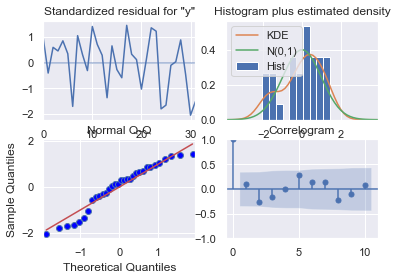

In [196]:
results_auto_SARIMA_12_I.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [197]:
predicted_auto_SARIMA_12_I = results_auto_SARIMA_12_I.get_forecast(steps=len(test1))

In [198]:
predicted_auto_SARIMA_12_I.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  127.078444  2.153347     122.857962     131.298927
1  127.937967  2.249593     123.528845     132.347089
2  132.467585  2.242017     128.073313     136.861857
3  130.279556  2.060100     126.241834     134.317277
4  128.077288  2.060262     124.039248     132.115328

In [199]:
rmse1 = mean_squared_error(test1['log_sales'],predicted_auto_SARIMA_12_I.predicted_mean,squared=False)
print(rmse1)

3.7699958760624708


In [200]:
temp_results_Df = pd.DataFrame({'RMSE': [rmse1]}
                           ,index=['SARIMA(1,1,1)(2,0,2,12)'])


results_Df = pd.concat([results_Df,temp_results_Df])

results_Df

RMSE
ARIMA(0,0,2)             3.805309
ARIMA(1,1,1)             3.997764
SARIMA(1,1,2)(1,0,2,5)   3.706015
SARIMA(1,1,1)(2,0,2,12)  3.769996

## Triple exponential smoothing:

In [201]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [202]:
TES_train_I = train1.copy()
TES_test_I = test1.copy()

In [203]:
model_TES_I = ExponentialSmoothing(TES_train_I['log_sales'],trend='additive',seasonal='multiplicative')

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [204]:
model_TES_autofit_I = model_TES_I.fit()

In [205]:
model_TES_autofit_I.params

{'smoothing_level': 0.20116796904854814,
 'smoothing_trend': 0.20116796904854814,
 'smoothing_seasonal': 0.7988320309514518,
 'damping_trend': nan,
 'initial_level': 129.4267286115624,
 'initial_trend': 0.05770760594354451,
 'initial_seasons': array([0.97543036, 0.99925437, 0.97768877, 0.99943586, 1.00316285,
        1.01734181, 1.01489419, 0.96013516, 1.00595908, 1.00451251,
        0.99191599, 1.02503754]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [206]:
## Prediction on the test data

TES_test_I['auto_predict'] = model_TES_autofit_I.forecast(steps=len(test1))
TES_test_I.head()

log_sales  auto_predict
date                                
2017-01-01  128.895293    125.525364
2017-02-01  128.130393    125.378983
2017-03-01  132.555124    130.851461
2017-04-01  125.906389    128.047248
2017-05-01  130.386170    123.588201

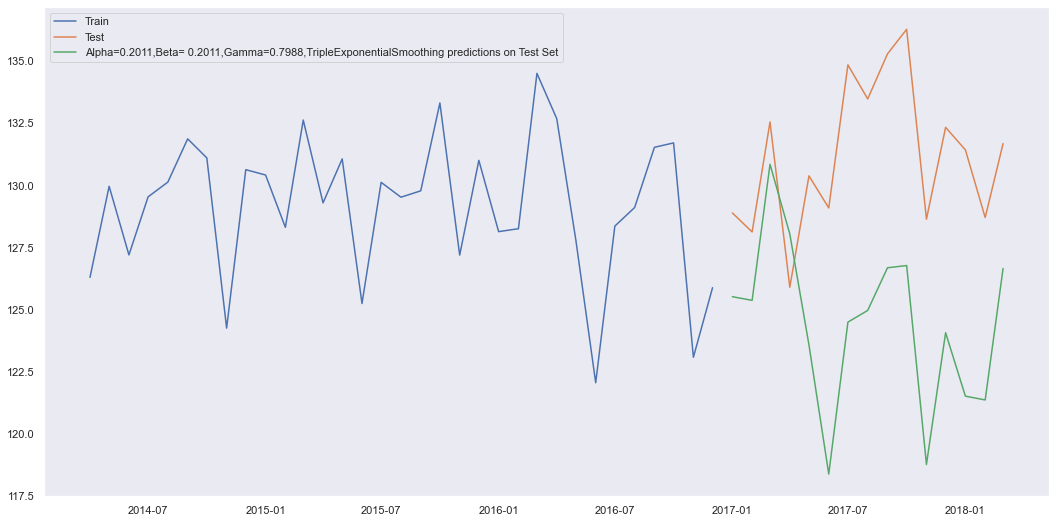

In [207]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train_I['log_sales'], label='Train')
plt.plot(TES_test_I['log_sales'], label='Test')

plt.plot(TES_test_I['auto_predict'], label='Alpha=0.2011,Beta= 0.2011,Gamma=0.7988,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [208]:
## Test Data

rmse_model_test_IC = metrics.mean_squared_error(TES_test_I['log_sales'],TES_test_I['auto_predict'],squared=False)
print("For Alpha=0.2011,Beta=0.2011,Gamma=0.7988, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model_test_IC))

For Alpha=0.2011,Beta=0.2011,Gamma=0.7988, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 7.632


In [209]:
results_Df_TES = pd.DataFrame({'Test RMSE': [rmse_model_test_IC]}
                           ,index=['Alpha=0.2011,Beta=0.2011,Gamma=0.7988,TripleExponentialSmoothing'])

results_Df = pd.concat([results_Df, results_Df_TES])
results_Df

RMSE  Test RMSE
ARIMA(0,0,2)                                        3.805309        NaN
ARIMA(1,1,1)                                        3.997764        NaN
SARIMA(1,1,2)(1,0,2,5)                              3.706015        NaN
SARIMA(1,1,1)(2,0,2,12)                             3.769996        NaN
Alpha=0.2011,Beta=0.2011,Gamma=0.7988,TripleExp...       NaN   7.631616

In [210]:
## First we will define an empty dataframe to store our values from the loop

results_Df_TES1 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
results_Df_TES1

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [211]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_I_alpha_i_j_k = model_TES_I.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_I['predict',i,j,k] = model_TES_I_alpha_i_j_k.fittedvalues
            TES_test_I['predict',i,j,k] = model_TES_I_alpha_i_j_k.forecast(steps=len(test1))
        
            rmse_model_train2 = metrics.mean_squared_error(TES_train_I['log_sales'],TES_train_I['predict',i,j,k],squared=False)
            
            rmse_model_test2 = metrics.mean_squared_error(TES_test_I['log_sales'],TES_test_I['predict',i,j,k],squared=False)
            
            results_Df_TES1 = results_Df_TES1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model_train2,'Test RMSE':rmse_model_test2}
                                                 , ignore_index=True)

In [212]:
results_Df_TES1

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0             0.3          0.3           0.3    2.132660   8.723041
1             0.3          0.3           0.4    2.067116   9.001047
2             0.3          0.3           0.5    2.009757   9.286091
3             0.3          0.3           0.6    1.961294   9.575595
4             0.3          0.3           0.7    1.922392   9.867749
..            ...          ...           ...         ...        ...
507           1.0          1.0           0.6    3.515659  34.719406
508           1.0          1.0           0.7    3.764390  34.187107
509           1.0          1.0           0.8    4.067531  33.650455
510           1.0          1.0           0.9    4.412870  33.114923
511           1.0          1.0           1.0    4.790393  32.588062

[512 rows x 5 columns]

In [213]:
results_Df_TES1.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
357           0.8          0.7           0.8    2.734119   3.927366
406           0.9          0.5           0.9    2.641658   3.986441
365           0.8          0.8           0.8    2.895988   4.069866
301           0.7          0.8           0.8    2.712999   4.074127
342           0.8          0.5           0.9    2.485294   4.107183

In [214]:
TES_test_I

log_sales  auto_predict  (predict, 0.3, 0.3, 0.3)  \
date                                                             
2017-01-01  128.895293    125.525364                126.453321   
2017-02-01  128.130393    125.378983                124.898790   
2017-03-01  132.555124    130.851461                129.209239   
2017-04-01  125.906389    128.047248                124.318132   
2017-05-01  130.386170    123.588201                123.700637   
2017-06-01  129.094902    118.392428                119.448314   
2017-07-01  134.850945    124.503305                123.618029   
2017-08-01  133.479537    124.973331                123.662042   
2017-09-01  135.291359    126.689766                124.865629   
2017-10-01  136.280069    126.777675                124.858012   
2017-11-01  128.642077    118.776748                117.330128   
2017-12-01  132.336561    124.076459                122.066946   
2018-01-01  131.431132    121.525737                120.663579   
2018-02-01  128.710621    121.373384                119.158321   
2018-03-01  131.683585    126.659869                123.247825   

            (predict, 0.3, 0.3, 0.4)  (predict, 0.3, 0.3, 0.5)  \
date                                                             
2017-01-01                126.045225                125.638691   
2017-02-01                124.799877                124.702530   
2017-03-01                129.290476                129.373448   
2017-04-01                124.842583                125.310920   
2017-05-01                123.150660                122.629837   
2017-06-01                118.625705                117.890334   
2017-07-01                123.383597                123.139518   
2017-08-01                123.443589                123.239964   
2017-09-01                124.663925                124.489283   
2017-10-01                124.812976                124.682006   
2017-11-01                117.145493                116.907722   
2017-12-01                121.710417                121.357948   
2018-01-01                120.053241                119.448456   
2018-02-01                118.843499                118.533089   
2018-03-01                123.095132                122.946424   

            (predict, 0.3, 0.3, 0.6000000000000001)  \
date                                                  
2017-01-01                               125.233698   
2017-02-01                               124.606740   
2017-03-01                               129.458156   
2017-04-01                               125.723140   
2017-05-01                               122.137774   
2017-06-01                               117.241689   
2017-07-01                               122.885656   
2017-08-01                               123.051084   
2017-09-01                               124.341660   
2017-10-01                               124.465757   
2017-11-01                               116.617025   
2017-12-01                               121.009509   
2018-01-01                               118.849165   
2018-02-01                               118.227067   
2018-03-01                               122.801697   

            (predict, 0.3, 0.3, 0.7000000000000002)  \
date                                                  
2017-01-01                               124.830223   
2017-02-01                               124.512498   
2017-03-01                               129.544598   
2017-04-01                               126.079238   
2017-05-01                               121.674080   
2017-06-01                               116.679271   
2017-07-01                               122.621873   
2017-08-01                               122.876867   
2017-09-01                               124.221014   
2017-10-01                               124.164864   
2017-11-01                               116.273605   
2017-12-01                               120.665073   
2018-01-01                               118.255310   
2018-0

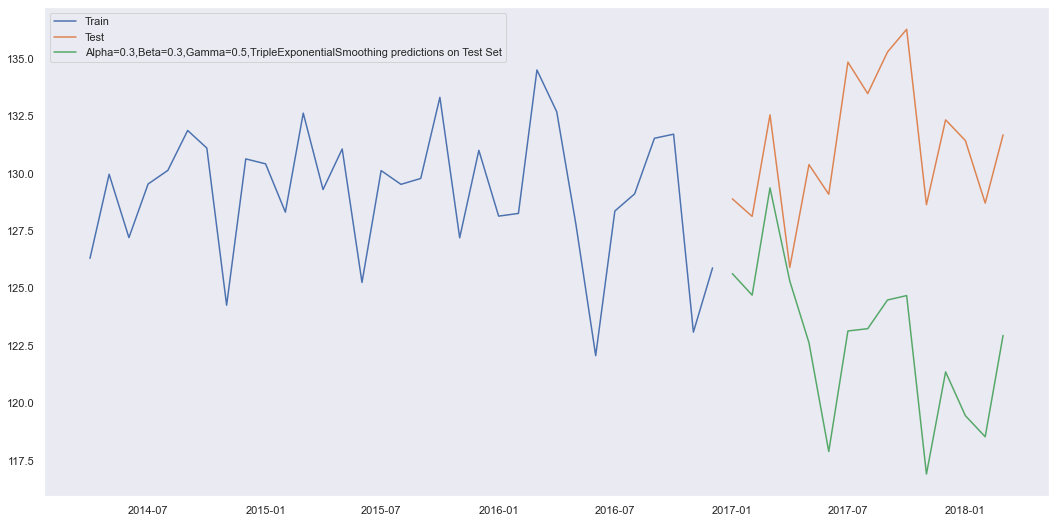

In [215]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_I['log_sales'], label='Train')
plt.plot(TES_test_I['log_sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test_I['predict', 0.3, 0.3, 0.5], label='Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [216]:
results_Df_TES2 = pd.DataFrame({'Test RMSE': [results_Df_TES1.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing'])

results_Df = pd.concat([results_Df, results_Df_TES2])
results_Df

RMSE  Test RMSE
ARIMA(0,0,2)                                        3.805309        NaN
ARIMA(1,1,1)                                        3.997764        NaN
SARIMA(1,1,2)(1,0,2,5)                              3.706015        NaN
SARIMA(1,1,1)(2,0,2,12)                             3.769996        NaN
Alpha=0.2011,Beta=0.2011,Gamma=0.7988,TripleExp...       NaN   7.631616
Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialS...       NaN   3.927366

In [217]:
print('Sorted by RMSE values on the Test Data:','\n',)
results_Df.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



RMSE  Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialS...       NaN   3.927366
Alpha=0.2011,Beta=0.2011,Gamma=0.7988,TripleExp...       NaN   7.631616
ARIMA(0,0,2)                                        3.805309        NaN
ARIMA(1,1,1)                                        3.997764        NaN
SARIMA(1,1,2)(1,0,2,5)                              3.706015        NaN
SARIMA(1,1,1)(2,0,2,12)                             3.769996        NaN

In [218]:
fullmodel_1a = ExponentialSmoothing(df_InductionCookers,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.2011,
                                                                 smoothing_trend=0.2011,
                                                                 smoothing_seasonal=0.7988)

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [219]:
RMSE_fullmodel_1a = metrics.mean_squared_error(df_InductionCookers['log_sales'],fullmodel_1a.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel_1a)

RMSE: 2.7833675773303894


In [220]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1a = fullmodel_1a.forecast(steps=len(test1))

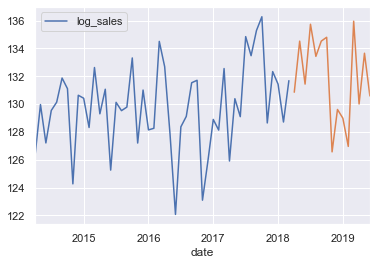

In [221]:
df_InductionCookers.plot()
prediction_1a.plot();

In [222]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df1a = pd.DataFrame({'lower_CI':prediction_1a - 1.96*np.std(fullmodel_1a.resid,ddof=1),
                          'prediction':prediction_1a,
                          'upper_ci': prediction_1a + 1.96*np.std(fullmodel_1a.resid,ddof=1)})
pred_1_df1a.head()

lower_CI  prediction    upper_ci
2018-04-01  125.342143  130.852876  136.363608
2018-05-01  129.015638  134.526371  140.037103
2018-06-01  125.926352  131.437085  136.947817
2018-07-01  130.228404  135.739137  141.249869
2018-08-01  127.920424  133.431156  138.941889

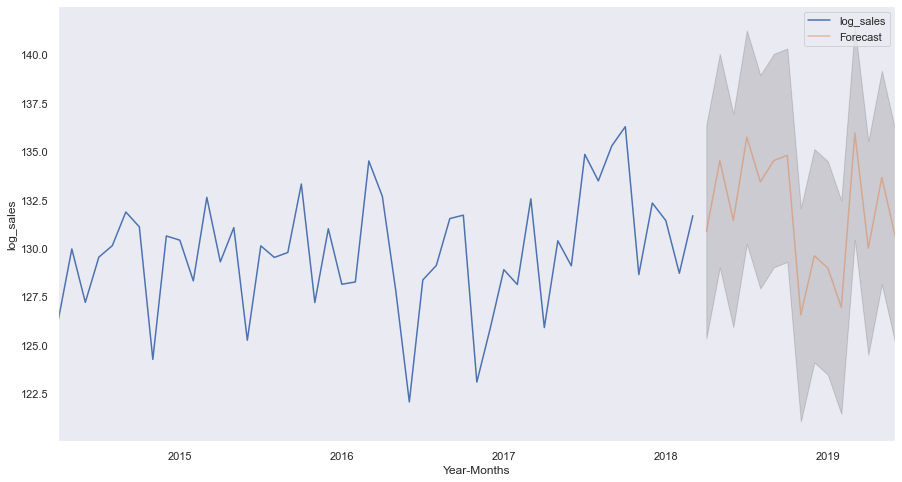

In [223]:
# plot the forecast along with the confidence band

axis = df_InductionCookers.plot(label='Actual', figsize=(15,8))
pred_1_df1a['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df1a.index, pred_1_df1a['lower_CI'], pred_1_df1a['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('log_sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [224]:
fullmodel_2a = ExponentialSmoothing(df_InductionCookers,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.3,
                                                                 smoothing_seasonal=0.5)

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [225]:
RMSE_fullmodel_2a = metrics.mean_squared_error(df_InductionCookers['log_sales'],fullmodel_2a.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel_2a)

RMSE: 2.4023224834623065


In [226]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2a = fullmodel_2a.forecast(steps=len(test1))

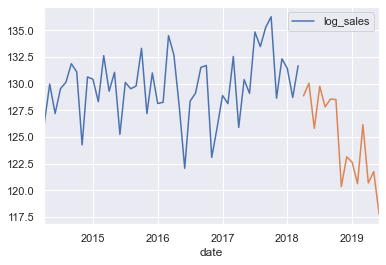

In [227]:
df_InductionCookers.plot()
prediction_2a.plot();

In [228]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df2a = pd.DataFrame({'lower_CI':prediction_2a - 1.96*np.std(fullmodel_2a.resid,ddof=1),
                          'prediction':prediction_2a,
                          'upper_ci': prediction_2a + 1.96*np.std(fullmodel_2a.resid,ddof=1)})
pred_2_df2a.head()

lower_CI  prediction    upper_ci
2018-04-01  124.138653  128.866416  133.594178
2018-05-01  125.325681  130.053444  134.781206
2018-06-01  121.081358  125.809120  130.536883
2018-07-01  125.031719  129.759481  134.487244
2018-08-01  123.099439  127.827202  132.554964

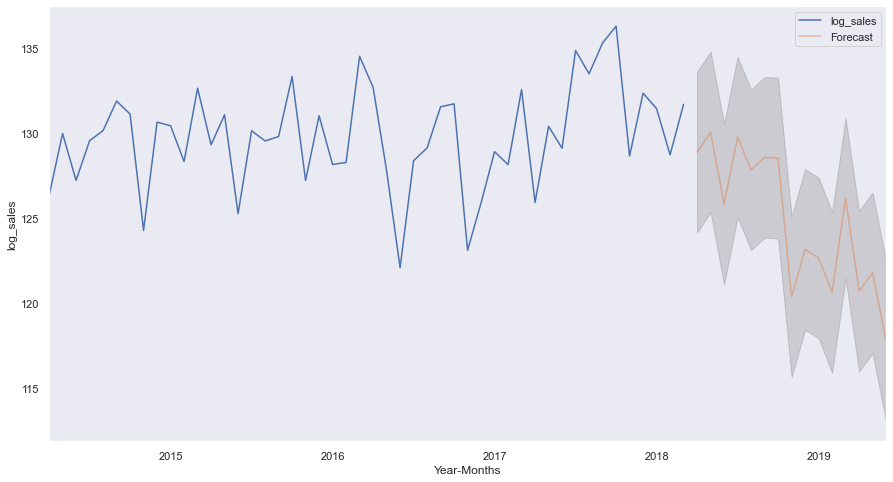

In [229]:
# plot the forecast along with the confidence band

axis = df_InductionCookers.plot(label='Actual', figsize=(15,8))
pred_2_df2a['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df2a.index, pred_2_df2a['lower_CI'], pred_2_df2a['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('log_sales')
plt.legend(loc='best')
plt.grid()
plt.show()

# Dry Iron:

In [230]:
df_DryIron = df_DryIron.groupby(['date']).sum()

In [231]:
df_DryIron.shape

(48, 1)

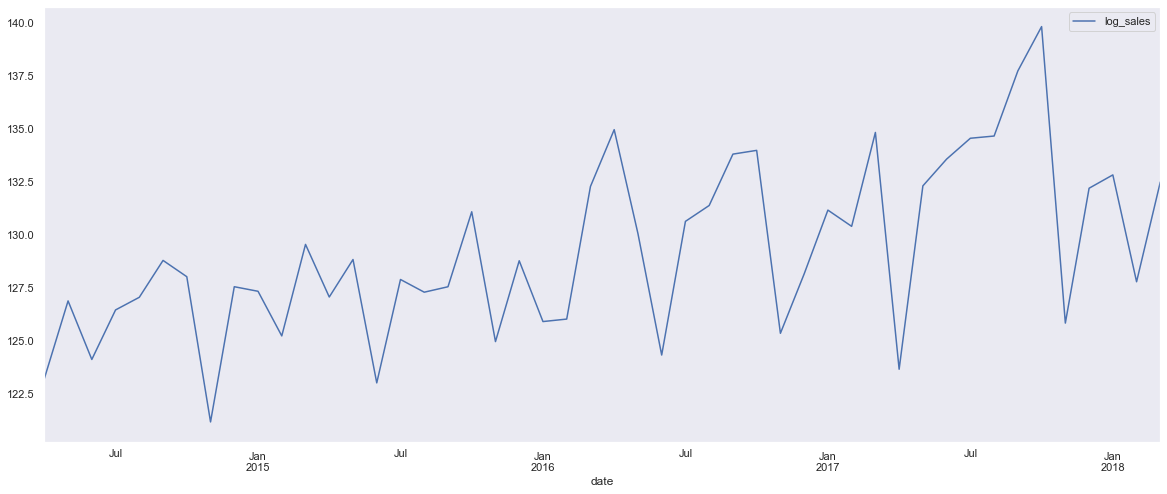

In [232]:
df_DryIron.plot(figsize=(20,8))
plt.grid()

In [233]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

#### Additive Decomposition:

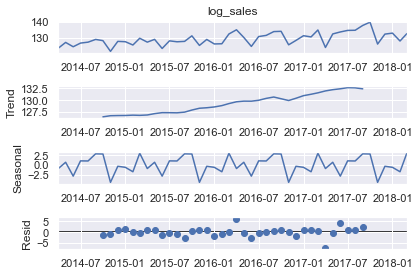

In [234]:
decomposition3 = seasonal_decompose(df_DryIron['log_sales'], model= 'additive')
decomposition3.plot();

** We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [235]:
trend3 = decomposition3.trend
seasonality3 = decomposition3.seasonal
residual3 = decomposition3.resid

print('Trend','\n',trend3.head(12),'\n')
print('Seasonality','\n',seasonality3.head(12),'\n')
print('Residual','\n',residual3.head(12),'\n')

Trend 
 date
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01    126.448373
2014-11-01    126.689923
2014-12-01    126.725198
2015-01-01    126.738969
2015-02-01    126.808772
2015-03-01    126.767096
Name: trend, dtype: float64 

Seasonality 
 date
2014-04-01   -0.961633
2014-05-01    0.647067
2014-06-01   -2.907701
2014-07-01    1.003255
2014-08-01    0.976383
2014-09-01    2.815608
2014-10-01    2.772355
2014-11-01   -4.503659
2014-12-01   -0.383378
2015-01-01   -0.651402
2015-02-01   -1.786329
2015-03-01    2.979435
Name: seasonal, dtype: float64 

Residual 
 date
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01   -1.192026
2014-11-01   -1.002111
2014-12-01    1.214684
2015-01-01    1.253848
2015-02-01    0.215688
2015-03-01   -0.195741
Name: resid, dtype: float64 



#### Multiplicative model:

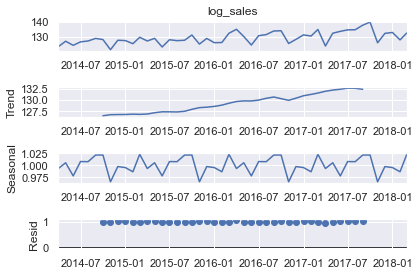

In [236]:
decomposition3a = seasonal_decompose(df_DryIron['log_sales'],model='multiplicative')
decomposition3a.plot();

** For the multiplicative series, we see that a lot of residuals are located around 1.

In [237]:
trend3a = decomposition3a.trend
seasonality3a = decomposition3a.seasonal
residual3a = decomposition3a.resid

print('Trend','\n',trend3a.head(12),'\n')
print('Seasonality','\n',seasonality3a.head(12),'\n')
print('Residual','\n',residual3a.head(12),'\n')

Trend 
 date
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01    126.448373
2014-11-01    126.689923
2014-12-01    126.725198
2015-01-01    126.738969
2015-02-01    126.808772
2015-03-01    126.767096
Name: trend, dtype: float64 

Seasonality 
 date
2014-04-01    0.993015
2014-05-01    1.005117
2014-06-01    0.977376
2014-07-01    1.007693
2014-08-01    1.007443
2014-09-01    1.021415
2014-10-01    1.021592
2014-11-01    0.964923
2014-12-01    0.997183
2015-01-01    0.994996
2015-02-01    0.986163
2015-03-01    1.023084
Name: seasonal, dtype: float64 

Residual 
 date
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01    0.991098
2014-11-01    0.991313
2014-12-01    1.009404
2015-01-01    1.009807
2015-02-01    1.001471
2015-03-01    0.998901
Name: resid, dtype: float64 



### Check for stationarity of the DryIron Time Series data.

In [238]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

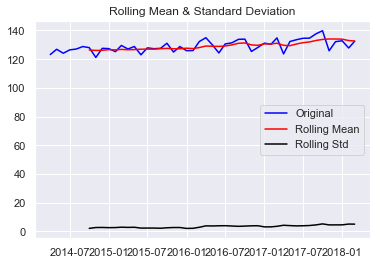

Results of Dickey-Fuller Test:
Test Statistic                 -4.971970
p-value                         0.000025
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64 



In [239]:
test_stationarity(df_DryIron['log_sales'])

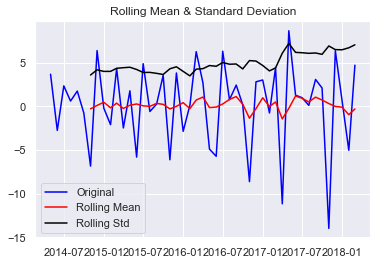

Results of Dickey-Fuller Test:
Test Statistic                 -3.761341
p-value                         0.003329
#Lags Used                     10.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64 



In [240]:
test_stationarity(df_DryIron['log_sales'].diff().dropna())


**We see that at α = 0.05 the Time Series is indeed stationary.

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the DryIron data.

In [241]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

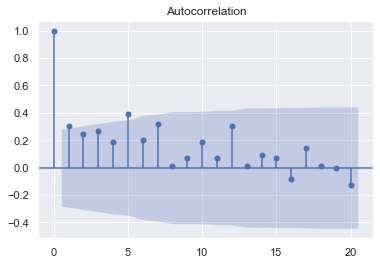

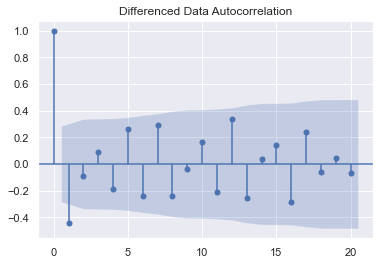

In [242]:
plot_acf(df_DryIron['log_sales'],lags=20)
plot_acf(df_DryIron['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


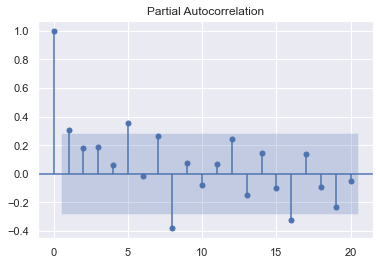

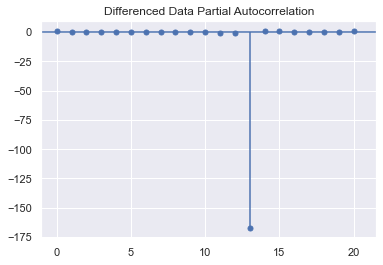

In [243]:
plot_pacf(df_DryIron['log_sales'],lags=20)
plot_pacf(df_DryIron['log_sales'].diff().dropna(),lags=20,title='Differenced Data Partial Autocorrelation')
plt.show()

#### Split the data into train and test and plot the training and test data.

In [244]:
train2=df_DryIron.loc['2014-04-01':'2016-12-01']
test2=df_DryIron.loc['2017-01-01':'2018-03-01']

#### Check for stationarity of the Training Data Time Series.

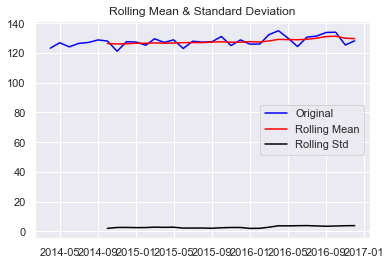

Results of Dickey-Fuller Test:
Test Statistic                  0.805804
p-value                         0.991729
#Lags Used                      8.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64 



In [245]:
test_stationarity(train2['log_sales'])

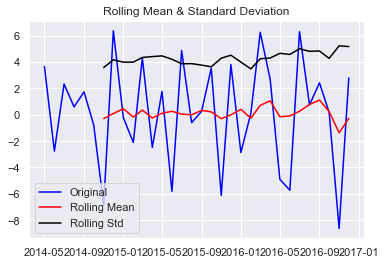

Results of Dickey-Fuller Test:
Test Statistic                 -2.907617
p-value                         0.044469
#Lags Used                      7.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64 



In [246]:
test_stationarity(train2['log_sales'].diff().dropna())

** We see that after taking a difference of order 1 the series have become stationary at α = 0.05.

In [247]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 2014-04-01 to 2016-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   log_sales  33 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


#### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [248]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 2)
d= range(0,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
     print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 1, 0)
Model: (1, 1, 1)


In [249]:
# Creating an empty Dataframe with column names only
ARIMA_AIC3 = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC3

Empty DataFrame
Columns: [param, AIC]
Index: []

In [250]:
train2.head()

log_sales
date                  
2014-04-01  123.224955
2014-05-01  126.887813
2014-06-01  124.128292
2014-07-01  126.462565
2014-08-01  127.058205

In [251]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    print(param)
    ARIMA_model3 = ARIMA(train2['log_sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model3.aic))
    ARIMA_AIC3 = ARIMA_AIC3.append({'param':param, 'AIC': ARIMA_model3.aic}, ignore_index=True)

(0, 0, 0)
ARIMA(0, 0, 0) - AIC:173.94482928770512
(0, 0, 1)
ARIMA(0, 0, 1) - AIC:174.6214670003172
(0, 1, 0)
ARIMA(0, 1, 0) - AIC:183.49534773376615
(0, 1, 1)


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 1) - AIC:166.2055062884753
(1, 0, 0)
ARIMA(1, 0, 0) - AIC:174.5585590804277
(1, 0, 1)
ARIMA(1, 0, 1) - AIC:177.84659247774945
(1, 1, 0)
ARIMA(1, 1, 0) - AIC:180.23269961943623
(1, 1, 1)
ARIMA(1, 1, 1) - AIC:168.20366699467803


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arim

In [252]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC3.sort_values(by='AIC',ascending=True)

param         AIC
3  (0, 1, 1)  166.205506
7  (1, 1, 1)  168.203667
0  (0, 0, 0)  173.944829
4  (1, 0, 0)  174.558559
1  (0, 0, 1)  174.621467
5  (1, 0, 1)  177.846592
6  (1, 1, 0)  180.232700
2  (0, 1, 0)  183.495348

In [253]:
auto_ARIMA3 = ARIMA(train2['log_sales'], order=(0,1,1))

results_auto_ARIMA3 = auto_ARIMA3.fit()

print(results_auto_ARIMA3.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_sales   No. Observations:                   32
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -80.103
Method:                       css-mle   S.D. of innovations              2.800
Date:                Thu, 19 Aug 2021   AIC                            166.206
Time:                        10:32:33   BIC                            170.603
Sample:                    05-01-2014   HQIC                           167.663
                         - 12-01-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1658      0.051      3.238      0.001       0.065       0.266
ma.L1.D.log_sales    -1.0000      0.082    -12.149      0.000      -1.161      -0.839
                        

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

### Predict on the Test Set using this model and evaluate the model.

In [254]:
predicted_auto_ARIMA3 = results_auto_ARIMA3.forecast(steps=len(test2))

In [255]:
from sklearn.metrics import  mean_squared_error
rmse_3 = mean_squared_error(test2['log_sales'],predicted_auto_ARIMA3[0],squared=False)
print(rmse_3)

4.093231927168577


In [256]:
results_Df_3 = pd.DataFrame({'RMSE': [rmse_3]}
                           ,index=['ARIMA(0,1,1)'])

results_Df_3

RMSE
ARIMA(0,1,1)  4.093232

#### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


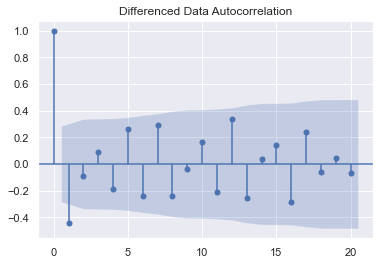

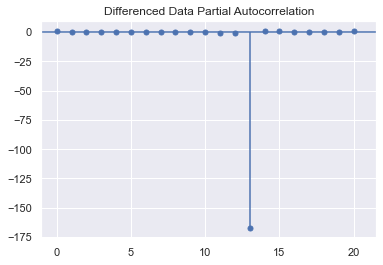

In [257]:
plot_acf(df_DryIron['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plot_pacf(df_DryIron['log_sales'].diff().dropna(),lags=20,title='Differenced Data Partial Autocorrelation')
plt.show()

#### Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 1.

In [258]:
manual_ARIMA_3 = ARIMA(train2['log_sales'].astype('float64'), order=(0,1,1))

results_manual_ARIMA_3 = manual_ARIMA_3.fit()

print(results_manual_ARIMA_3.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_sales   No. Observations:                   32
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -80.103
Method:                       css-mle   S.D. of innovations              2.800
Date:                Thu, 19 Aug 2021   AIC                            166.206
Time:                        10:32:34   BIC                            170.603
Sample:                    05-01-2014   HQIC                           167.663
                         - 12-01-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1658      0.051      3.238      0.001       0.065       0.266
ma.L1.D.log_sales    -1.0000      0.082    -12.149      0.000      -1.161      -0.839
                        

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

#### Predict on the Test Set using this model and evaluate the model.

In [259]:
predicted_manual_ARIMA_3 = results_manual_ARIMA_3.forecast(steps=len(test2))

In [260]:
rmse_3a = mean_squared_error(test2['log_sales'],predicted_manual_ARIMA_3[0],squared=False)
print(rmse_3a)

4.093231927168577


In [261]:
temp_results_Df_3 = pd.DataFrame({'RMSE': [rmse_3a]}
                           ,index=['ARIMA(0,1,1)'])


results_Df_3 = pd.concat([results_Df_3,temp_results_Df_3])

results_Df_3

RMSE
ARIMA(0,1,1)  4.093232
ARIMA(0,1,1)  4.093232

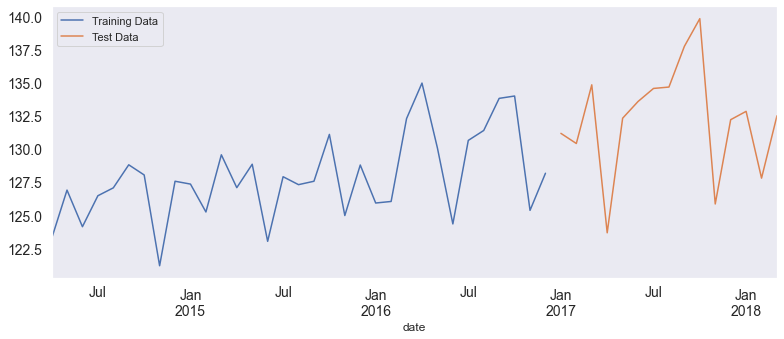

In [262]:
train2['log_sales'].plot(figsize=(13,5), fontsize=14)
test2['log_sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [263]:
print(train2.shape)
print(test2.shape)

(33, 1)
(15, 1)


In [264]:
train_time3 = [i+1 for i in range(len(train2))]
test_time3 = [i+34 for i in range(len(test2))]
print('Training Time instance','\n',train_time3)
print('Test Time instance','\n',test_time3)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]


In [265]:
LinearRegression_train3 = train2.copy()
LinearRegression_test3 = test2.copy()

In [266]:
LinearRegression_train3['time3'] = train_time3
LinearRegression_test3['time3'] = test_time3

print('First few rows of Training Data','\n',LinearRegression_train3.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train3.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test3.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test3.tail(),'\n')

First few rows of Training Data 
              log_sales  time3
date                         
2014-04-01  123.224955      1
2014-05-01  126.887813      2
2014-06-01  124.128292      3
2014-07-01  126.462565      4
2014-08-01  127.058205      5 

Last few rows of Training Data 
              log_sales  time3
date                         
2016-08-01  131.384354     29
2016-09-01  133.805741     30
2016-10-01  133.982316     31
2016-11-01  125.361191     32
2016-12-01  128.159158     33 

First few rows of Test Data 
              log_sales  time3
date                         
2017-01-01  131.166785     34
2017-02-01  130.401894     35
2017-03-01  134.826614     36
2017-04-01  123.667987     37
2017-05-01  132.309192     38 

Last few rows of Test Data 
              log_sales  time3
date                         
2017-11-01  125.841989     44
2017-12-01  132.197751     45
2018-01-01  132.826054     46
2018-02-01  127.790000     47
2018-03-01  132.492923     48 



In [267]:
from sklearn.linear_model import LinearRegression
lr3 = LinearRegression()
lr3.fit(LinearRegression_train3[['time3']],LinearRegression_train3['log_sales'].values)

LinearRegression()

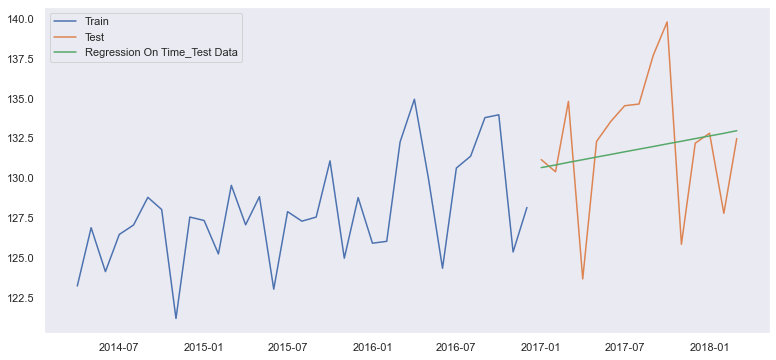

In [268]:
test_predictions_model_3         = lr3.predict(LinearRegression_test3[['time3']])
LinearRegression_test3['RegOnTime3'] = test_predictions_model_3

plt.figure(figsize=(13,6))
plt.plot( train2['log_sales'], label='Train')
plt.plot(test2['log_sales'], label='Test')
plt.plot(LinearRegression_test3['RegOnTime3'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [269]:
from sklearn import metrics
## Test Data - RMSE

rmse_model_test3 = metrics.mean_squared_error(test2['log_sales'],test_predictions_model_3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model_test3))

For RegressionOnTime forecast on the Test Data,  RMSE is 4.100


In [270]:
temp_results_Df_DI = pd.DataFrame({'Test RMSE': [rmse_model_test3]},index=['RegressionOnTime3'])


results_Df_3 = pd.concat([results_Df_3,temp_results_Df_DI])

results_Df_3

RMSE  Test RMSE
ARIMA(0,1,1)       4.093232        NaN
ARIMA(0,1,1)       4.093232        NaN
RegressionOnTime3       NaN   4.100289

In [271]:
TES_train3 = train2.copy()
TES_test3 = test2.copy()

In [272]:
model_TES3 = ExponentialSmoothing(TES_train3['log_sales'],trend='additive',seasonal='multiplicative')

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [273]:
model_TES_autofit3 = model_TES3.fit()

In [274]:
model_TES_autofit3.params

{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 1.3501912048866688e-08,
 'smoothing_seasonal': 0.0,
 'damping_trend': nan,
 'initial_level': 125.81744805453805,
 'initial_trend': 0.1752462665695049,
 'initial_seasons': array([1.00283996, 1.00248942, 0.96389681, 0.99774972, 0.99832679,
        1.00840887, 1.01467515, 0.95760273, 0.98956291, 0.98438921,
        0.97541129, 1.0150878 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [275]:
## Prediction on the test data

TES_test3['auto_predict'] = model_TES_autofit3.forecast(steps=len(test2))
TES_test3.head()

log_sales  auto_predict
date                                
2017-01-01  131.166785    129.718696
2017-02-01  130.401894    128.706561
2017-03-01  134.826614    134.119810
2017-04-01  123.667987    132.677291
2017-05-01  132.309192    132.806597

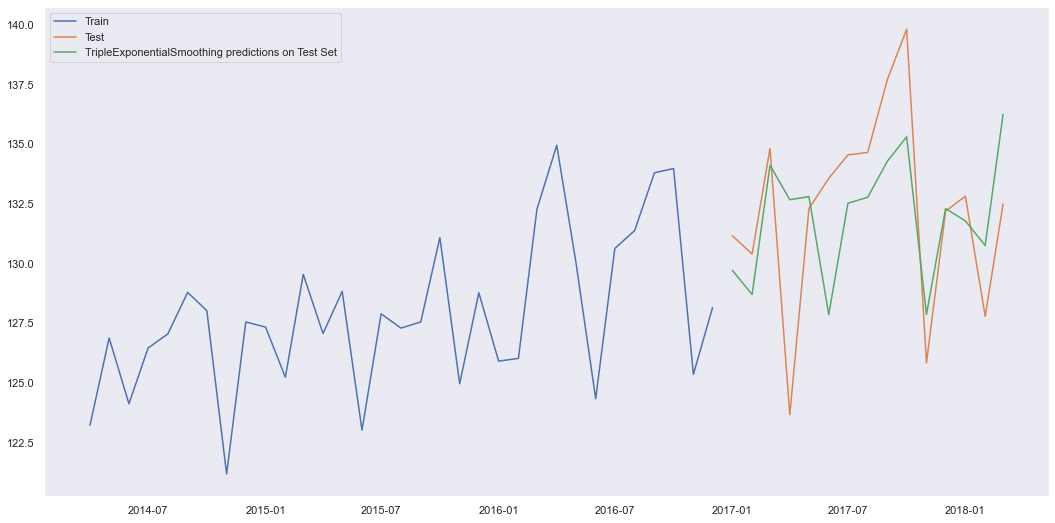

In [276]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train3['log_sales'], label='Train')
plt.plot(TES_test3['log_sales'], label='Test')

plt.plot(TES_test3['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [277]:
## Test Data

rmse_model_test_3DI = metrics.mean_squared_error(TES_test3['log_sales'],TES_test3['auto_predict'],squared=False)
print("Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model_test_3DI))

Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 3.534


In [278]:
results_Df_3di = pd.DataFrame({'Test RMSE': [rmse_model_test_3DI]}
                           ,index=['TripleExponentialSmoothing'])

results_Df_3 = pd.concat([results_Df_3, results_Df_3di])
results_Df_3

RMSE  Test RMSE
ARIMA(0,1,1)                4.093232        NaN
ARIMA(0,1,1)                4.093232        NaN
RegressionOnTime3                NaN   4.100289
TripleExponentialSmoothing       NaN   3.533706

In [279]:
## First we will define an empty dataframe to store our values from the loop

results_Df_3tra = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
results_Df_3tra

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [280]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES3_alpha_i_j_k = model_TES3.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train3['predict',i,j,k] = model_TES3_alpha_i_j_k.fittedvalues
            TES_test3['predict',i,j,k] = model_TES3_alpha_i_j_k.forecast(steps=len(test2))
        
            rmse_model_train_3tr = metrics.mean_squared_error(TES_train3['log_sales'],TES_train3['predict',i,j,k],squared=False)
            
            rmse_model_test_3te = metrics.mean_squared_error(TES_test3['log_sales'],TES_test3['predict',i,j,k],squared=False)
            
            results_Df_3tra = results_Df_3tra.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model_train_3tr,'Test RMSE':rmse_model_test_3te}
                                                 , ignore_index=True)

In [281]:
 results_Df_3tra

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0             0.3          0.3           0.3    2.420296   5.339868
1             0.3          0.3           0.4    2.355204   5.618466
2             0.3          0.3           0.5    2.298659   5.891300
3             0.3          0.3           0.6    2.251276   6.154915
4             0.3          0.3           0.7    2.213615   6.407285
..            ...          ...           ...         ...        ...
507           1.0          1.0           0.6    4.008998  35.210480
508           1.0          1.0           0.7    4.229005  34.558748
509           1.0          1.0           0.8    4.517037  33.907698
510           1.0          1.0           0.9    4.860418  33.264350
511           1.0          1.0           1.0    5.247800  32.638484

[512 rows x 5 columns]

In [282]:
results_Df_3tra.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0             0.3          0.3           0.3    2.420296   5.339868
364           0.8          0.8           0.7    3.143971   5.503989
308           0.7          0.9           0.7    3.120361   5.517641
372           0.8          0.9           0.7    3.310413   5.526265
300           0.7          0.8           0.7    2.984059   5.547811

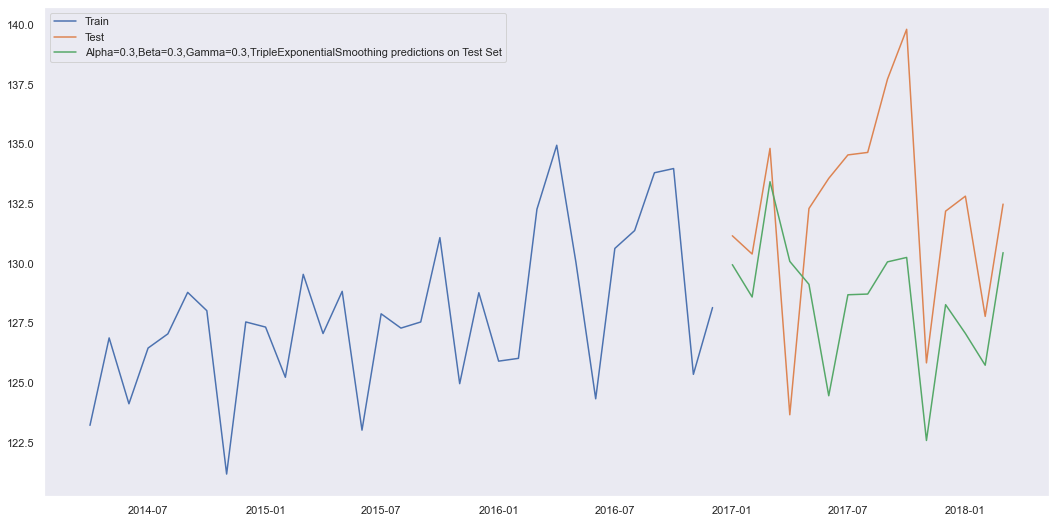

In [283]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train3['log_sales'], label='Train')
plt.plot(TES_test3['log_sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test3['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [284]:
results_Df_3

RMSE  Test RMSE
ARIMA(0,1,1)                4.093232        NaN
ARIMA(0,1,1)                4.093232        NaN
RegressionOnTime3                NaN   4.100289
TripleExponentialSmoothing       NaN   3.533706

In [285]:
results_Df_3_tra = pd.DataFrame({'Test RMSE': [results_Df_3tra.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

results_Df_3 = pd.concat([results_Df_3, results_Df_3_tra])


In [286]:
results_Df_3_tra

Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...   5.339868

In [287]:
results_Df_3

RMSE  Test RMSE
ARIMA(0,1,1)                                        4.093232        NaN
ARIMA(0,1,1)                                        4.093232        NaN
RegressionOnTime3                                        NaN   4.100289
TripleExponentialSmoothing                               NaN   3.533706
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...       NaN   5.339868

In [288]:
print('Sorted by RMSE values on the Test Data:','\n',)
results_Df_3.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



RMSE  Test RMSE
TripleExponentialSmoothing                               NaN   3.533706
RegressionOnTime3                                        NaN   4.100289
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...       NaN   5.339868
ARIMA(0,1,1)                                        4.093232        NaN
ARIMA(0,1,1)                                        4.093232        NaN

In [289]:
fullmodel_3a = ExponentialSmoothing(df_DryIron,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=1.4901161193847656e-08,
                                                                 smoothing_trend=1.3501912048866688e-08,
                                                                 smoothing_seasonal=0.0)

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [290]:
RMSE_fullmodel_3a = metrics.mean_squared_error(df_DryIron['log_sales'],fullmodel_3a.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel_3a)

RMSE: 2.096872745116458


In [291]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_3a = fullmodel_3a.forecast(steps=len(test2))

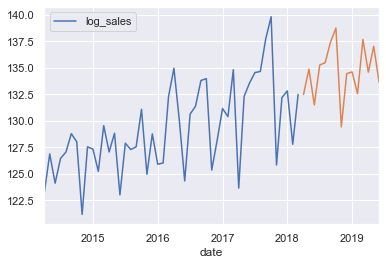

In [292]:
df_DryIron.plot()
prediction_3a.plot();

In [293]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df3a = pd.DataFrame({'lower_CI':prediction_3a - 1.96*np.std(fullmodel_3a.resid,ddof=1),
                          'prediction':prediction_3a,
                          'upper_ci': prediction_3a + 1.96*np.std(fullmodel_3a.resid,ddof=1)})
pred_1_df3a.head()

lower_CI  prediction    upper_ci
2018-04-01  128.331718  132.485080  136.638443
2018-05-01  130.730149  134.883511  139.036873
2018-06-01  127.356197  131.509560  135.662922
2018-07-01  131.114055  135.267417  139.420780
2018-08-01  131.327599  135.480962  139.634324

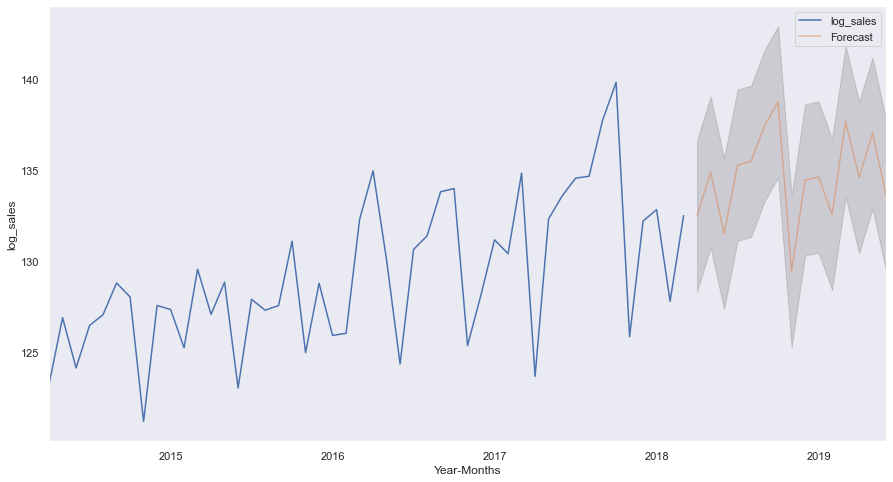

In [294]:
# plot the forecast along with the confidence band

axis = df_DryIron.plot(label='Actual', figsize=(15,8))
pred_1_df3a['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df3a.index, pred_1_df3a['lower_CI'], pred_1_df3a['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('log_sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [295]:
fullmodel_3b = ExponentialSmoothing(df_DryIron,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.3,
                                                                 smoothing_seasonal=0.3)

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [296]:
RMSE_fullmodel_3b = metrics.mean_squared_error(df_DryIron['log_sales'],fullmodel_3b.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel_3b)

RMSE: 2.86428541634966


In [297]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_3b = fullmodel_3b.forecast(steps=len(test2))

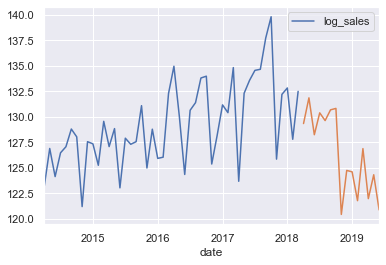

In [298]:
df_DryIron.plot()
prediction_3b.plot();

In [299]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df3b = pd.DataFrame({'lower_CI':prediction_3b - 1.96*np.std(fullmodel_3b.resid,ddof=1),
                          'prediction':prediction_3b,
                          'upper_ci': prediction_3b + 1.96*np.std(fullmodel_3b.resid,ddof=1)})
pred_2_df3b.head()

lower_CI  prediction    upper_ci
2018-04-01  123.683467  129.334473  134.985479
2018-05-01  126.205988  131.856994  137.508000
2018-06-01  122.586400  128.237406  133.888411
2018-07-01  124.733460  130.384466  136.035471
2018-08-01  123.973050  129.624056  135.275062

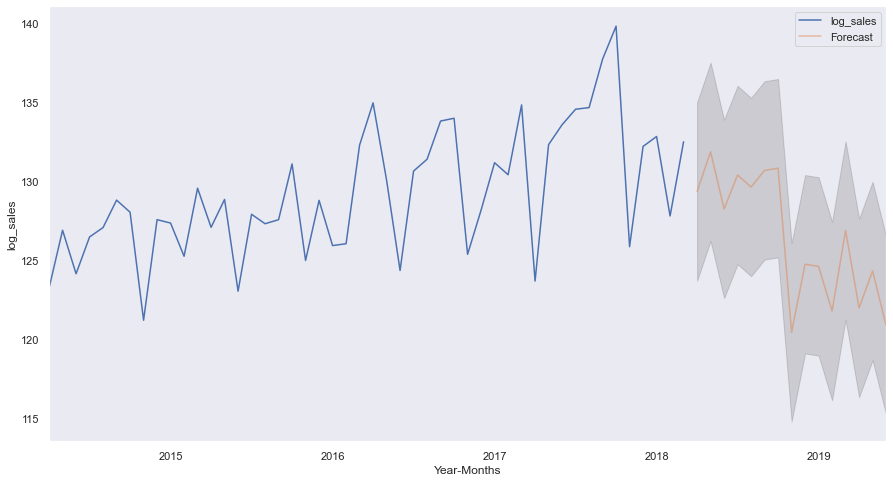

In [300]:
# plot the forecast along with the confidence band

axis = df_DryIron.plot(label='Actual', figsize=(15,8))
pred_2_df3b['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df3b.index, pred_2_df3b['lower_CI'], pred_2_df3b['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('log_sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [301]:
df_Mumbai = df[df['city'] == 'Mumbai']
df_Kolkata = df[df['city'] == 'Kolkata']
df_Hyderabad = df[df['city'] == 'Hyderabad']
df_Bangalore = df[df['city'] == 'Bangalore']
df_Chennai = df[df['city'] == 'Chennai']
df_Cochin = df[df['city'] == 'Cochin']
df_Ahmd = df[df['city'] == 'Ahmd']
df_Patna = df[df['city'] == 'Patna']
df_Pune = df[df['city'] == 'Pune']
df_Delhi = df[df['city'] == 'Delhi']

** the top 3 cities with the higher sales are Mumbai, Bangalore and Kolkata.

# Mumbai:

In [302]:
df_Mumbai = df_Mumbai.groupby(['date']).sum()

In [303]:
df_Mumbai.shape

(48, 1)

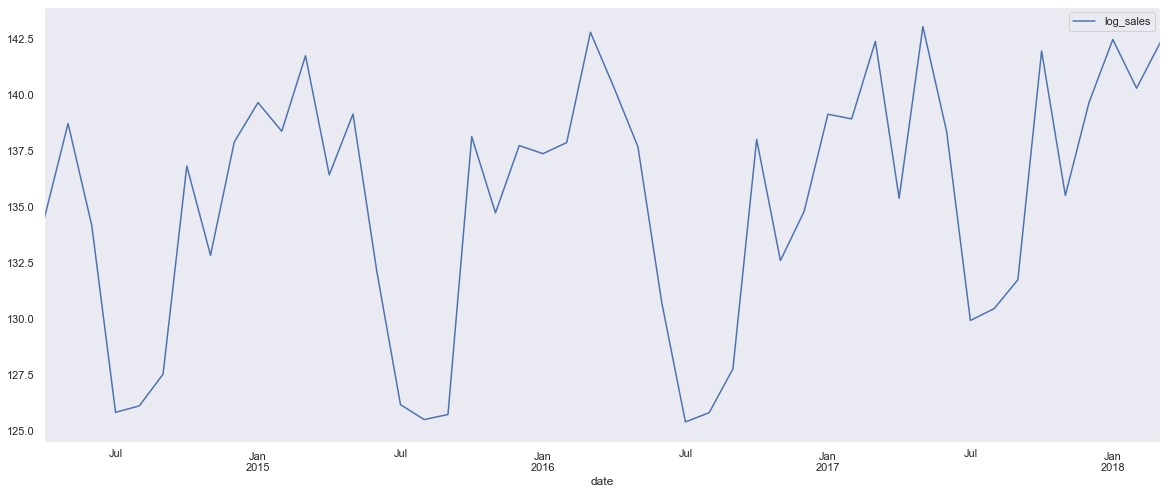

In [304]:
df_Mumbai.plot(figsize=(20,8))
plt.grid()

#### Decompose the Time Series and plot the different components.

In [305]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

#### Additive Decomposition

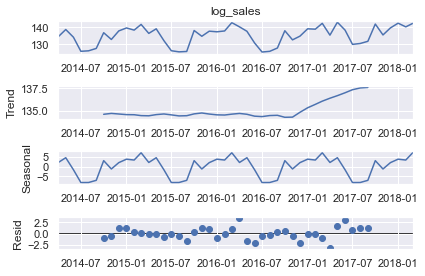

In [306]:
decomposition_1a = seasonal_decompose(df_Mumbai['log_sales'],model='additive')
decomposition_1a.plot();

** We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [307]:
trend_1a = decomposition_1a.trend
seasonality_1a = decomposition_1a.seasonal
residual_1a = decomposition_1a.resid

print('Trend','\n',trend_1a.head(12),'\n')
print('Seasonality','\n',seasonality_1a.head(12),'\n')
print('Residual','\n',residual_1a.head(12),'\n')

Trend 
 date
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01    134.585950
2014-11-01    134.684393
2014-12-01    134.617818
2015-01-01    134.547907
2015-02-01    134.536687
2015-03-01    134.436284
Name: trend, dtype: float64 

Seasonality 
 date
2014-04-01    2.157596
2014-05-01    4.633900
2014-06-01   -1.631368
2014-07-01   -8.275473
2014-08-01   -8.250216
2014-09-01   -7.127635
2014-10-01    3.113713
2014-11-01   -1.221789
2014-12-01    2.078528
2015-01-01    3.873292
2015-02-01    3.424966
2015-03-01    7.224486
Name: seasonal, dtype: float64 

Residual 
 date
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01   -0.887183
2014-11-01   -0.633172
2014-12-01    1.188343
2015-01-01    1.221094
2015-02-01    0.400448
2015-03-01    0.073418
Name: resid, dtype: float64 



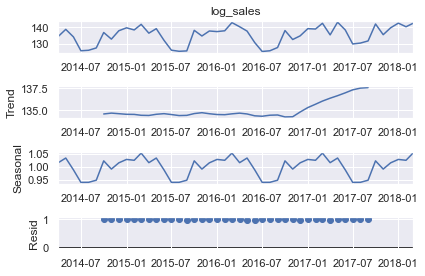

In [308]:
decomposition_1b = seasonal_decompose(df_Mumbai['log_sales'],model='multiplicative')
decomposition_1b.plot();

** For the multiplicative series, we see that a lot of residuals are located around 1.

In [309]:
trend_1b = decomposition_1b.trend
seasonality_1b = decomposition_1b.seasonal
residual_1b = decomposition_1b.resid

print('Trend','\n',trend_1b.head(12),'\n')
print('Seasonality','\n',seasonality_1b.head(12),'\n')
print('Residual','\n',residual_1b.head(12),'\n')

Trend 
 date
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01    134.585950
2014-11-01    134.684393
2014-12-01    134.617818
2015-01-01    134.547907
2015-02-01    134.536687
2015-03-01    134.436284
Name: trend, dtype: float64 

Seasonality 
 date
2014-04-01    1.016023
2014-05-01    1.034149
2014-06-01    0.987778
2014-07-01    0.938815
2014-08-01    0.939011
2014-09-01    0.947302
2014-10-01    1.023115
2014-11-01    0.990886
2014-12-01    1.015402
2015-01-01    1.028693
2015-02-01    1.025350
2015-03-01    1.053477
Name: seasonal, dtype: float64 

Residual 
 date
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01    0.993577
2014-11-01    0.995299
2014-12-01    1.008731
2015-01-01    1.008914
2015-02-01    1.003008
2015-03-01    1.000767
Name: resid, dtype: float64 



#### Check for stationarity of the Time Series data.

In [310]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

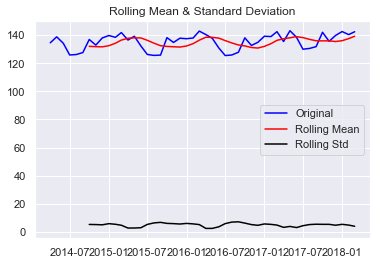

Results of Dickey-Fuller Test:
Test Statistic                 -0.074393
p-value                         0.951930
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64 



In [311]:
test_stationarity(df_Mumbai['log_sales'])

**We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

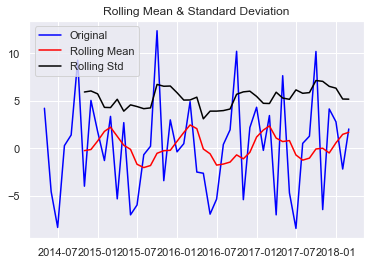

Results of Dickey-Fuller Test:
Test Statistic                -6.175271e+00
p-value                        6.654069e-08
#Lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64 



In [312]:
test_stationarity(df_Mumbai['log_sales'].diff().dropna())

** We see that at α = 0.05 the Time Series is indeed stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the Mumbai data.

In [313]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

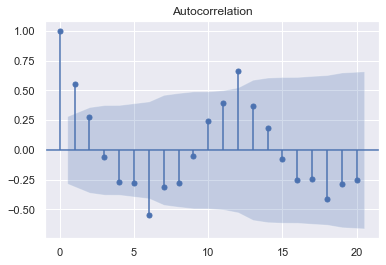

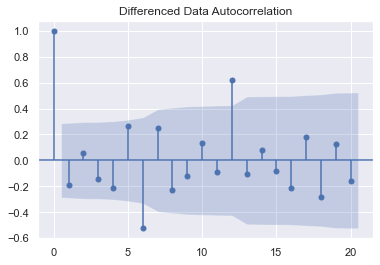

In [314]:
plot_acf(df_Mumbai['log_sales'],lags=20)
plot_acf(df_Mumbai['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


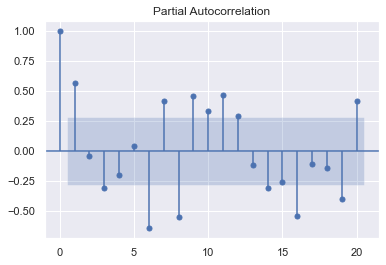

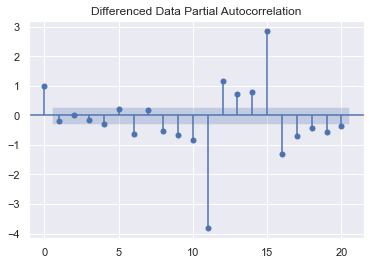

In [315]:
plot_pacf(df_Mumbai['log_sales'],lags=20)
plot_pacf(df_Mumbai['log_sales'].diff().dropna(),lags=20,title='Differenced Data Partial Autocorrelation')
plt.show()

#### Split the data into train and test and plot the training and test data.

In [316]:
train1a=df_Mumbai.loc['2014-04-01':'2016-12-01']
test1a=df_Mumbai.loc['2017-01-01':'2018-03-01']

### Check for stationarity of the Training Data Time Series.

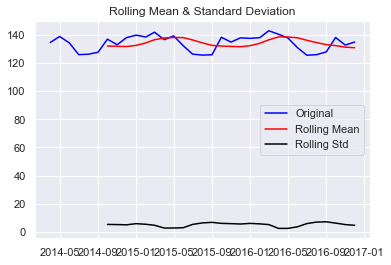

Results of Dickey-Fuller Test:
Test Statistic                -7.860180e+00
p-value                        5.309971e-12
#Lags Used                     1.000000e+01
Number of Observations Used    2.200000e+01
Critical Value (1%)           -3.769733e+00
Critical Value (5%)           -3.005426e+00
Critical Value (10%)          -2.642501e+00
dtype: float64 



In [317]:
test_stationarity(train1a['log_sales'])

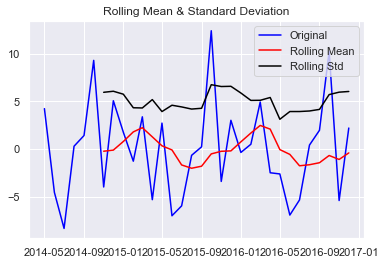

Results of Dickey-Fuller Test:
Test Statistic                -1.162703e+01
p-value                        2.310340e-21
#Lags Used                     1.000000e+01
Number of Observations Used    2.100000e+01
Critical Value (1%)           -3.788386e+00
Critical Value (5%)           -3.013098e+00
Critical Value (10%)          -2.646397e+00
dtype: float64 



In [318]:
test_stationarity(train1a['log_sales'].diff().dropna())


#### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [319]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [320]:
# Creating an empty Dataframe with column names only
ARIMA_AIC_1a = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_1a

Empty DataFrame
Columns: [param, AIC]
Index: []

In [321]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model_1a = ARIMA(train1a['log_sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_1a.aic))
    ARIMA_AIC_1a = ARIMA_AIC_1a.append({'param':param, 'AIC': ARIMA_model_1a.aic}, ignore_index=True)

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 0, 0) - AIC:208.98354025275066
ARIMA(0, 0, 1) - AIC:200.7038571723893
ARIMA(0, 0, 2) - AIC:190.05458787886857
ARIMA(1, 0, 0) - AIC:197.76388447873126
ARIMA(1, 0, 1) - AIC:199.48110879235728


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 0, 2) - AIC:191.40880618399905
ARIMA(2, 0, 0) - AIC:199.10945685937077


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 0, 1) - AIC:191.2119749969808


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 0, 2) - AIC:191.87137041882778


In [322]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC_1a.sort_values(by='AIC',ascending=True)

param         AIC
2  (0, 0, 2)  190.054588
7  (2, 0, 1)  191.211975
5  (1, 0, 2)  191.408806
8  (2, 0, 2)  191.871370
3  (1, 0, 0)  197.763884
6  (2, 0, 0)  199.109457
4  (1, 0, 1)  199.481109
1  (0, 0, 1)  200.703857
0  (0, 0, 0)  208.983540

In [323]:
auto_ARIMA_1a = ARIMA(train1a['log_sales'], order=(0,0,2))

results_auto_ARIMA_1a = auto_ARIMA_1a.fit()

print(results_auto_ARIMA_1a.summary())

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

                              ARMA Model Results                              
Dep. Variable:              log_sales   No. Observations:                   33
Model:                     ARMA(0, 2)   Log Likelihood                 -91.027
Method:                       css-mle   S.D. of innovations              3.495
Date:                Thu, 19 Aug 2021   AIC                            190.055
Time:                        10:33:10   BIC                            196.041
Sample:                    04-01-2014   HQIC                           192.069
                         - 12-01-2016                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             133.5868      1.549     86.250      0.000     130.551     136.622
ma.L1.log_sales     0.6182      0.095      6.518      0.000       0.432       0.804
ma.L2.log_sales     0.9998      

#### Predict on the Test Set using this model and evaluate the model.

In [324]:
predicted_auto_ARIMA_1a = results_auto_ARIMA_1a.forecast(steps=len(test1a))

In [325]:
from sklearn.metrics import  mean_squared_error
rmse_1a = mean_squared_error(test1a['log_sales'],predicted_auto_ARIMA_1a[0],squared=False)
print(rmse_1a)

6.70403816416632


In [326]:
results = pd.DataFrame({'RMSE': [rmse_1a]}
                           ,index=['ARIMA(0,0,2)'])

results

RMSE
ARIMA(0,0,2)  6.704038

#### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


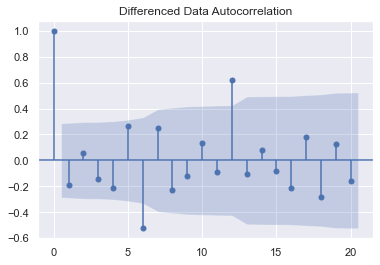

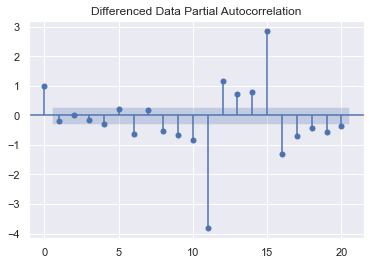

In [327]:
plot_acf(df_Mumbai['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plot_pacf(df_Mumbai['log_sales'].diff().dropna(),lags=20,title='Differenced Data Partial Autocorrelation')
plt.show()

** Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.
By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [328]:
manual_ARIMA_1a = ARIMA(train1a['log_sales'].astype('float64'), order=(0,1,0))

results_manual_ARIMA_1a = manual_ARIMA_1a.fit()

print(results_manual_ARIMA_1a.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_sales   No. Observations:                   32
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -97.025
Method:                           css   S.D. of innovations              5.018
Date:                Thu, 19 Aug 2021   AIC                            198.049
Time:                        10:33:11   BIC                            200.981
Sample:                    05-01-2014   HQIC                           199.021
                         - 12-01-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0097      0.887      0.011      0.991      -1.729       1.748


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

#### Predict on the Test Set using this model and evaluate the model.

In [329]:
predicted_manual_ARIMA_1a = results_manual_ARIMA_1a.forecast(steps=len(test1a))

In [330]:
rmse_1b = mean_squared_error(test1a['log_sales'],predicted_manual_ARIMA_1a[0],squared=False)
print(rmse_1b)

5.412667279099604


In [331]:
temp_results = pd.DataFrame({'RMSE': [rmse_1b]}
                           ,index=['ARIMA(0,1,0)'])


results = pd.concat([results,temp_results])

results

RMSE
ARIMA(0,0,2)  6.704038
ARIMA(0,1,0)  5.412667

#### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

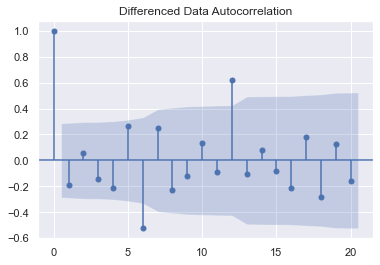

In [332]:
plot_acf(df_Mumbai['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plt.show()

** We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

#### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [333]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [334]:
SARIMA_AIC_1a = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_1a

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [335]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_1a = sm.tsa.statespace.SARIMAX(train1a['log_sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_1a = SARIMA_model_1a.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_1a = SARIMA_AIC_1a.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_1a.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:30.948561673450875
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:30.948561673450875
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:30.948561673450875
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:30.948561673450875
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:30.948561673450875


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:30.948561673450875
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:30.948561673450875
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:30.948561673450875
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:30.948561673450875
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:30.948561673450875
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:30.948561673450875
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:30.948561673450875
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:30.948561673450875
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:30.948561673450875
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:30.948561673450875
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:30.948561673450875
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:30.948561673450875
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:30.948561673450875
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:30.948561673450875
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:30.948561673450875
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:30.948561673450875
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:30.948561673450875
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:30.948561673450875
SARIMA(0, 1, 2)x(1, 0, 2, 6)

In [336]:
SARIMA_AIC_1a.sort_values(by=['AIC']).head()

param      seasonal        AIC
80  (2, 1, 2)  (2, 0, 2, 6)  73.201104
78  (2, 1, 2)  (2, 0, 0, 6)  75.495411
77  (2, 1, 2)  (1, 0, 2, 6)  75.978206
26  (0, 1, 2)  (2, 0, 2, 6)  76.786932
79  (2, 1, 2)  (2, 0, 1, 6)  77.041157

In [337]:
import statsmodels.api as sm

auto_SARIMA_1a = sm.tsa.statespace.SARIMAX(train1a['log_sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_1a = auto_SARIMA_1a.fit(maxiter=1000)
print(results_auto_SARIMA_1a.summary())

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   33
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 6)   Log Likelihood                 -27.601
Date:                           Thu, 19 Aug 2021   AIC                             73.201
Time:                                   10:33:35   BIC                             80.700
Sample:                                        0   HQIC                            73.947
                                            - 33                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4863      0.410      1.187      0.235      -0.317       1.289
ar.L2         -0.7580      0.311     -2.434

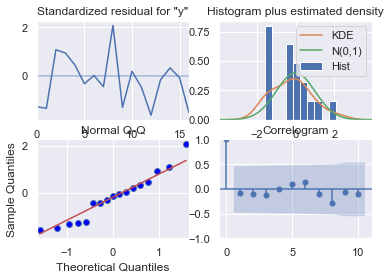

In [338]:
results_auto_SARIMA_1a.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [339]:
predicted_auto_SARIMA_1a = results_auto_SARIMA_1a.get_forecast(steps=len(test1a))

In [340]:
predicted_auto_SARIMA_1a.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  137.888401  1.080001     135.771637     140.005165
1  138.919719  1.077624     136.807615     141.031824
2  141.677172  1.142885     139.437158     143.917186
3  136.696696  1.168411     134.406653     138.986739
4  136.807087  1.428379     134.007515     139.606659

In [341]:
rmse_1c = mean_squared_error(test1a['log_sales'],predicted_auto_SARIMA_1a.predicted_mean,squared=False)
print(rmse_1c)

4.278980402854512


In [342]:
temp_results = pd.DataFrame({'RMSE': [rmse_1c]}
                           ,index=['SARIMA(2,1,2)(2,0,2,6)'])


results = pd.concat([results,temp_results])

results

RMSE
ARIMA(0,0,2)            6.704038
ARIMA(0,1,0)            5.412667
SARIMA(2,1,2)(2,0,2,6)  4.278980

#### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [343]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [344]:
SARIMA_AIC_1b = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_1b

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [345]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_1b = sm.tsa.statespace.SARIMAX(train1a['log_sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_1b = SARIMA_model_1b.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_1b.aic))
        SARIMA_AIC_1b = SARIMA_AIC_1b.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:190.27380775474938
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:112.549792336255
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:49.9763856286891
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:89.60347789341682


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:88.02114264346648
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:31.089439793946987
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:40.529646848999135
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:42.52964685526244
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:32.5249243653263
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:186.2428870028893
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:106.69761875511571
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:45.114026758730866
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:87.77012619615826
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:79.19252174227194
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:27.234901634004615
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:40.37314994026061
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:42.37314996823071
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:28.957930631787587
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:179.1817358760803
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:102.6408440493018
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:40.23084392413274
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:86.52537196743283
SARIMA(0, 1, 2)x(1, 0, 

In [346]:
SARIMA_AIC_1b.sort_values(by=['AIC']).head()

param       seasonal        AIC
0   (0, 1, 0)  (0, 0, 0, 12)  30.948562
57  (2, 1, 0)  (1, 0, 0, 12)  30.948562
56  (2, 1, 0)  (0, 0, 2, 12)  30.948562
55  (2, 1, 0)  (0, 0, 1, 12)  30.948562
54  (2, 1, 0)  (0, 0, 0, 12)  30.948562

In [347]:
import statsmodels.api as sm

auto_SARIMA_1b = sm.tsa.statespace.SARIMAX(train1a['log_sales'].values,
                                order=(0, 1, 0),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_1b = auto_SARIMA_1b.fit(maxiter=1000)
print(results_auto_SARIMA_1b.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   33
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -94.137
Date:                Thu, 19 Aug 2021   AIC                            190.274
Time:                        10:33:59   BIC                            191.708
Sample:                             0   HQIC                           190.741
                                 - 33                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        25.4183      6.655      3.820      0.000      12.375      38.461
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 1.70
Prob(Q):                              0.66   Pr

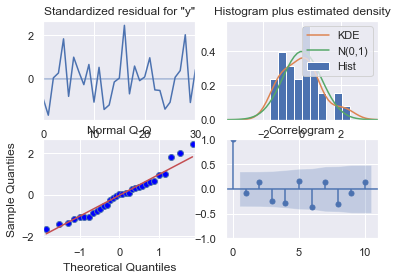

In [348]:
results_auto_SARIMA_1b.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [349]:
predicted_auto_SARIMA_1b = results_auto_SARIMA_1b.get_forecast(steps=len(test1a))

In [350]:
predicted_auto_SARIMA_1b.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  134.78794   5.041656     124.906474     144.669405
1  134.78794   7.129979     120.813438     148.762442
2  134.78794   8.732405     117.672740     151.903139
3  134.78794  10.083313     115.025009     154.550870
4  134.78794  11.273487     112.692312     156.883567

In [351]:
rmse_1d = mean_squared_error(test1a['log_sales'],predicted_auto_SARIMA_1b.predicted_mean,squared=False)
print(rmse_1d)

5.4630473354082545


In [352]:
temp_results = pd.DataFrame({'RMSE': [rmse_1d]}
                           ,index=['SARIMA(0,1,0)(0,0,0,12)'])


results = pd.concat([results,temp_results])

results

RMSE
ARIMA(0,0,2)             6.704038
ARIMA(0,1,0)             5.412667
SARIMA(2,1,2)(2,0,2,6)   4.278980
SARIMA(0,1,0)(0,0,0,12)  5.463047

### Triple exponential smoothing:

In [353]:
TES_train_M = train1a.copy()
TES_test_M = test1a.copy()

In [354]:
model_TES_M = ExponentialSmoothing(TES_train_M['log_sales'],trend='additive',seasonal='multiplicative')

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [355]:
model_TES_autofit_M = model_TES_M.fit()

In [356]:
model_TES_autofit_M.params

{'smoothing_level': 1.5741924850044773e-08,
 'smoothing_trend': 1.4415263061269528e-09,
 'smoothing_seasonal': 0.9999999842573372,
 'damping_trend': nan,
 'initial_level': 137.06203972884907,
 'initial_trend': -0.012476663242990856,
 'initial_seasons': array([0.98124107, 1.01221083, 0.97902753, 0.9183339 , 0.92053088,
        0.93092247, 0.99881261, 0.96982   , 1.00683893, 1.01976231,
        1.01048413, 1.03520133]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [357]:
## Prediction on the test data

TES_test_M['auto_predict'] = model_TES_autofit_M.forecast(steps=len(test1a))
TES_test_M.head()

log_sales  auto_predict
date                                
2017-01-01  139.123727    137.212759
2017-02-01  138.914264    137.708395
2017-03-01  142.376001    142.623928
2017-04-01  135.373530    140.133615
2017-05-01  143.033135    137.517801

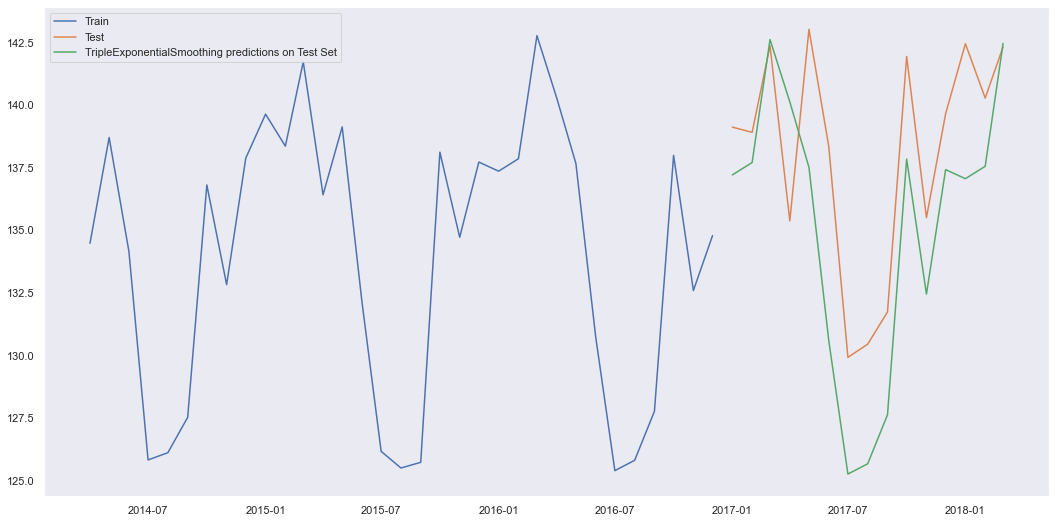

In [358]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train_M['log_sales'], label='Train')
plt.plot(TES_test_M['log_sales'], label='Test')

plt.plot(TES_test_M['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [359]:
## Test Data

rmse_model_test_1e = metrics.mean_squared_error(TES_test_M['log_sales'],TES_test_M['auto_predict'],squared=False)
print(" Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model_test_1e))

 Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 4.063


In [360]:
results_1e = pd.DataFrame({'Test RMSE': [rmse_model_test_1e]}
                           ,index=['TripleExponentialSmoothing'])

results = pd.concat([results, results_1e])
results

RMSE  Test RMSE
ARIMA(0,0,2)                6.704038        NaN
ARIMA(0,1,0)                5.412667        NaN
SARIMA(2,1,2)(2,0,2,6)      4.278980        NaN
SARIMA(0,1,0)(0,0,0,12)     5.463047        NaN
TripleExponentialSmoothing       NaN   4.063106

In [361]:
## First we will define an empty dataframe to store our values from the loop

results_1tr = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
results_1tr

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [362]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_M_alpha_i_j_k = model_TES_M.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_M['predict',i,j,k] = model_TES_M_alpha_i_j_k.fittedvalues
            TES_test_M['predict',i,j,k] = model_TES_M_alpha_i_j_k.forecast(steps=len(test1a))
        
            rmse_model_train_1e = metrics.mean_squared_error(TES_train_M['log_sales'],TES_train_M['predict',i,j,k],squared=False)
            
            rmse_model_test_1e = metrics.mean_squared_error(TES_test_M['log_sales'],TES_test_M['predict',i,j,k],squared=False)
            
            results_1tr = results_1tr.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model_train_1e,'Test RMSE':rmse_model_test_1e}
                                                 , ignore_index=True)

In [363]:
results_1tr

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0             0.3          0.3           0.3    1.725000   6.768686
1             0.3          0.3           0.4    1.675990   7.028140
2             0.3          0.3           0.5    1.632821   7.293380
3             0.3          0.3           0.6    1.595978   7.562563
4             0.3          0.3           0.7    1.565917   7.834446
..            ...          ...           ...         ...        ...
507           1.0          1.0           0.6    2.921569  28.623314
508           1.0          1.0           0.7    3.104539  28.234569
509           1.0          1.0           0.8    3.329265  27.844599
510           1.0          1.0           0.9    3.587177  27.458114
511           1.0          1.0           1.0    3.870985  27.081398

[512 rows x 5 columns]

In [364]:
results_1tr.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
365           0.8          0.8           0.8    2.424842   4.082327
350           0.8          0.6           0.9    2.212659   4.088841
373           0.8          0.9           0.8    2.565994   4.096127
414           0.9          0.6           0.9    2.362554   4.127047
406           0.9          0.5           0.9    2.209445   4.134070

In [365]:
TES_test_M

log_sales  auto_predict  (predict, 0.3, 0.3, 0.3)  \
date                                                             
2017-01-01  139.123727    137.212759                137.384741   
2017-02-01  138.914264    137.708395                136.592557   
2017-03-01  142.376001    142.623928                140.087427   
2017-04-01  135.373530    140.133615                134.268499   
2017-05-01  143.033135    137.517801                134.984115   
2017-06-01  138.353359    130.596185                129.210855   
2017-07-01  129.921795    125.257448                122.691182   
2017-08-01  130.448588    125.668903                122.603534   
2017-09-01  131.735771    127.625469                123.683982   
2017-10-01  141.948783    137.845275                133.367630   
2017-11-01  135.500924    132.446942                128.709600   
2017-12-01  139.656433    137.424826                132.701433   
2018-01-01  142.458933    137.062409                133.477547   
2018-02-01  140.283417    137.557488                132.698664   
2018-03-01  142.329351    142.467620                136.084395   

            (predict, 0.3, 0.3, 0.4)  (predict, 0.3, 0.3, 0.5)  \
date                                                             
2017-01-01                137.048011                136.712110   
2017-02-01                136.505829                136.419635   
2017-03-01                140.147304                140.207456   
2017-04-01                134.786699                135.266171   
2017-05-01                134.568193                134.175321   
2017-06-01                128.539158                127.933278   
2017-07-01                122.477898                122.242858   
2017-08-01                122.400040                122.199647   
2017-09-01                123.494194                123.321868   
2017-10-01                133.303322                133.170405   
2017-11-01                128.524097                128.295303   
2017-12-01                132.389710                132.078785   
2018-01-01                132.950889                132.425837   
2018-02-01                132.414724                132.131328   
2018-03-01                135.936546                135.788504   

            (predict, 0.3, 0.3, 0.6000000000000001)  \
date                                                  
2017-01-01                               136.377033   
2017-02-01                               136.333971   
2017-03-01                               140.267882   
2017-04-01                               135.707034   
2017-05-01                               133.805400   
2017-06-01                               127.392946   
2017-07-01                               121.985987   
2017-08-01                               122.002190   
2017-09-01                               123.166804   
2017-10-01                               132.969122   
2017-11-01                               128.023261   
2017-12-01                               131.768649   
2018-01-01                               131.902380   
2018-02-01                               131.848467   
2018-03-01                               135.640260   

            (predict, 0.3, 0.3, 0.7000000000000002)  \
date                                                  
2017-01-01                               136.042774   
2017-02-01                               136.248837   
2017-03-01                               140.328582   
2017-04-01                               136.109412   
2017-05-01                               133.458333   
2017-06-01                               126.917895   
2017-07-01                               121.707209   
2017-08-01                               121.807505   
2017-09-01                               123.028804   
2017-10-01                               132.699717   
2017-11-01                               127.708014   
2017-12-01                               131.459295   
2018-01-01                               131.380506   
2018-0

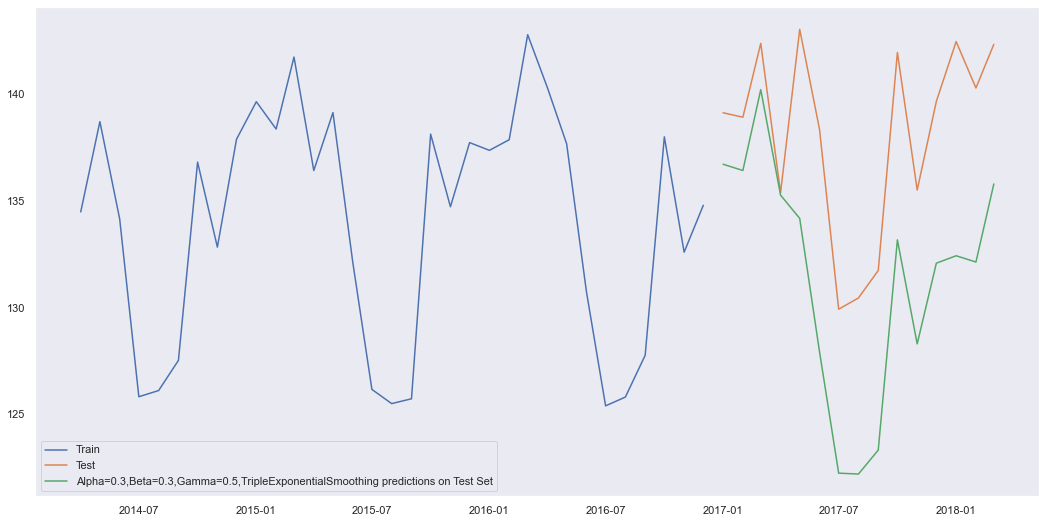

In [366]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_M['log_sales'], label='Train')
plt.plot(TES_test_M['log_sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test_M['predict', 0.3, 0.3, 0.5], label='Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [367]:
results

RMSE  Test RMSE
ARIMA(0,0,2)                6.704038        NaN
ARIMA(0,1,0)                5.412667        NaN
SARIMA(2,1,2)(2,0,2,6)      4.278980        NaN
SARIMA(0,1,0)(0,0,0,12)     5.463047        NaN
TripleExponentialSmoothing       NaN   4.063106

In [368]:
results_1tr = pd.DataFrame({'Test RMSE': [results_1tr.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing'])
results = pd.concat([results, results_1tr])
results_1tr

Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialS...   4.082327

In [369]:
print('Sorted by RMSE values on the Test Data:','\n',)
results.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



RMSE  Test RMSE
TripleExponentialSmoothing                               NaN   4.063106
Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialS...       NaN   4.082327
ARIMA(0,0,2)                                        6.704038        NaN
ARIMA(0,1,0)                                        5.412667        NaN
SARIMA(2,1,2)(2,0,2,6)                              4.278980        NaN
SARIMA(0,1,0)(0,0,0,12)                             5.463047        NaN

In [370]:
fullmodel_m = ExponentialSmoothing(df_Mumbai,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=1.5741924850044773e-08,
                                                                 smoothing_trend=1.4415263061269528e-09,
                                                                 smoothing_seasonal=0.9999999842573372)

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [371]:
RMSE_fullmodel_m = metrics.mean_squared_error(df_Mumbai['log_sales'],fullmodel_m.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel_m)

RMSE: 2.322711411618281


In [372]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1m = fullmodel_m.forecast(steps=len(test1a))

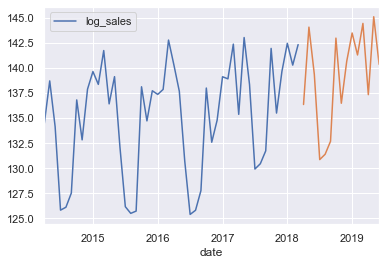

In [373]:
df_Mumbai.plot()
prediction_1m.plot();

In [374]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_dfm = pd.DataFrame({'lower_CI':prediction_1m - 1.96*np.std(fullmodel_m.resid,ddof=1),
                          'prediction':prediction_1m,
                          'upper_ci': prediction_1m + 1.96*np.std(fullmodel_m.resid,ddof=1)})
pred_1_dfm.head()

lower_CI  prediction    upper_ci
2018-04-01  131.755007  136.355294  140.955582
2018-05-01  139.469535  144.069823  148.670110
2018-06-01  134.755236  139.355523  143.955810
2018-07-01  126.262030  130.862317  135.462604
2018-08-01  126.792067  131.392354  135.992642

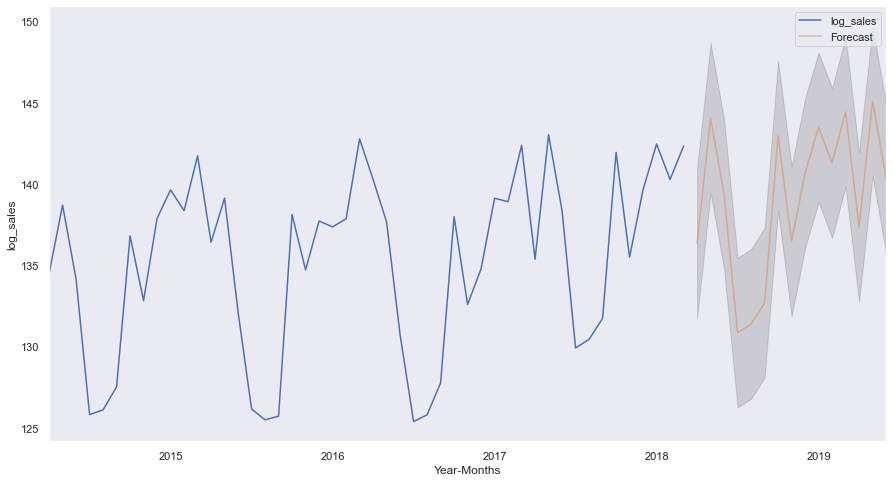

In [375]:
# plot the forecast along with the confidence band

axis = df_Mumbai.plot(label='Actual', figsize=(15,8))
pred_1_dfm['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_dfm.index, pred_1_dfm['lower_CI'], pred_1_dfm['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('log_sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [376]:
fullmodel_2m = ExponentialSmoothing(df_Mumbai,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.3,
                                                                 smoothing_seasonal=0.5)

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [377]:
RMSE_fullmodel_2m = metrics.mean_squared_error(df_Mumbai['log_sales'],fullmodel_2m.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel_2m)

RMSE: 2.080235615930284


In [378]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2m = fullmodel_2m.forecast(steps=len(test1a))

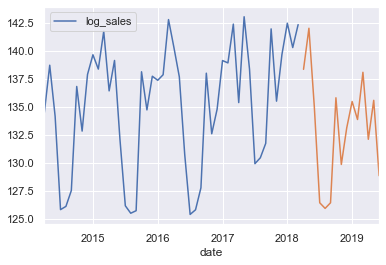

In [379]:
df_Mumbai.plot()
prediction_2m.plot();

In [380]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2m_df = pd.DataFrame({'lower_CI':prediction_2m - 1.96*np.std(fullmodel_2m.resid,ddof=1),
                          'prediction':prediction_2m,
                          'upper_ci': prediction_2m + 1.96*np.std(fullmodel_2m.resid,ddof=1)})
pred_2m_df.head()

lower_CI  prediction    upper_ci
2018-04-01  134.248207  138.341284  142.434361
2018-05-01  137.913141  142.006218  146.099295
2018-06-01  130.896355  134.989432  139.082509
2018-07-01  122.340560  126.433637  130.526714
2018-08-01  121.839098  125.932175  130.025252

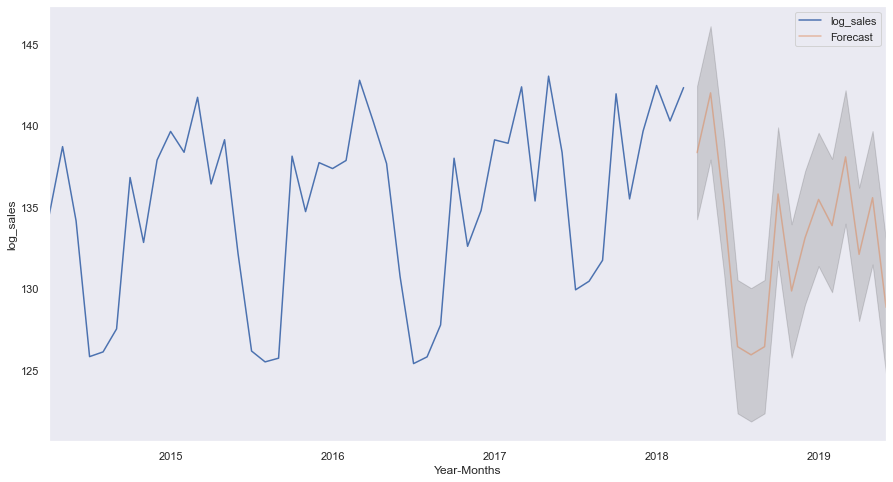

In [381]:
# plot the forecast along with the confidence band

axis = df_Mumbai.plot(label='Actual', figsize=(15,8))
pred_2m_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2m_df.index, pred_2m_df['lower_CI'], pred_2m_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('log_sales')
plt.legend(loc='best')
plt.grid()
plt.show()

# Bangalore:

In [382]:
df_Bangalore = df_Bangalore.groupby(['date']).sum()

In [383]:
df_Bangalore.shape

(48, 1)

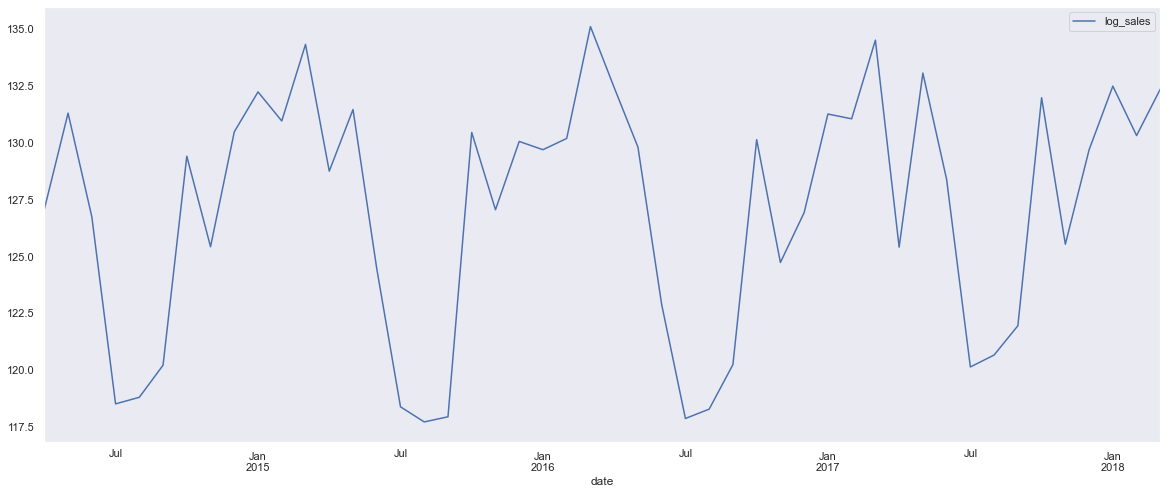

In [384]:
df_Bangalore.plot(figsize=(20,8))
plt.grid()

#### Decompose the Time Series and plot the different components.

In [385]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

#### Additive Decomposition

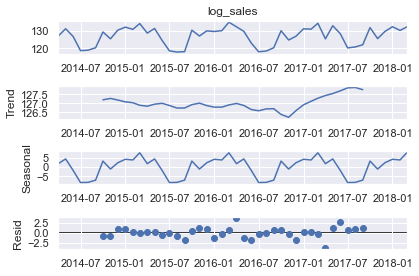

In [386]:
decomposition_ba = seasonal_decompose(df_Bangalore['log_sales'],model='additive')
decomposition_ba.plot();

** We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [387]:
trend_ba = decomposition_ba.trend
seasonality_ba = decomposition_ba.seasonal
residual_ba = decomposition_ba.resid

print('Trend','\n',trend_ba.head(12),'\n')
print('Seasonality','\n',seasonality_ba.head(12),'\n')
print('Residual','\n',residual_ba.head(12),'\n')

Trend 
 date
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01    127.182324
2014-11-01    127.258772
2014-12-01    127.170201
2015-01-01    127.069634
2015-02-01    127.019105
2015-03-01    126.879393
Name: trend, dtype: float64 

Seasonality 
 date
2014-04-01    1.730359
2014-05-01    4.277888
2014-06-01   -1.916202
2014-07-01   -8.356901
2014-08-01   -8.260482
2014-09-01   -7.066732
2014-10-01    3.120700
2014-11-01   -1.143587
2014-12-01    2.227901
2015-01-01    4.092632
2015-02-01    3.713071
2015-03-01    7.581353
Name: seasonal, dtype: float64 

Residual 
 date
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01   -0.906456
2014-11-01   -0.701538
2014-12-01    1.070794
2015-01-01    1.064230
2015-02-01    0.214131
2015-03-01   -0.142355
Name: resid, dtype: float64 



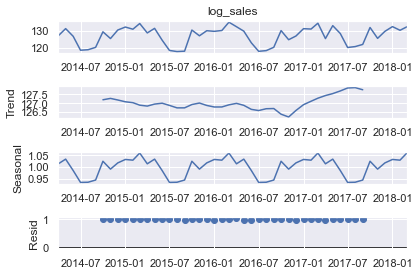

In [388]:
decomposition_bm = seasonal_decompose(df_Bangalore['log_sales'],model='multiplicative')
decomposition_bm.plot();

** For the multiplicative series, we see that a lot of residuals are located around 1

In [389]:
trend_bm = decomposition_bm.trend
seasonality_bm = decomposition_bm.seasonal
residual_bm = decomposition_bm.resid

print('Trend','\n',trend_bm.head(12),'\n')
print('Seasonality','\n',seasonality_bm.head(12),'\n')
print('Residual','\n',residual_bm.head(12),'\n')

Trend 
 date
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01    127.182324
2014-11-01    127.258772
2014-12-01    127.170201
2015-01-01    127.069634
2015-02-01    127.019105
2015-03-01    126.879393
Name: trend, dtype: float64 

Seasonality 
 date
2014-04-01    1.013643
2014-05-01    1.033622
2014-06-01    0.984875
2014-07-01    0.934251
2014-08-01    0.934997
2014-09-01    0.944370
2014-10-01    1.024607
2014-11-01    0.990980
2014-12-01    1.017533
2015-01-01    1.032225
2015-02-01    1.029229
2015-03-01    1.059667
Name: seasonal, dtype: float64 

Residual 
 date
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01    0.992976
2014-11-01    0.994471
2014-12-01    1.008261
2015-01-01    1.008097
2015-02-01    1.001641
2015-03-01    0.999022
Name: resid, dtype: float64 



#### Check for stationarity of the whole Time Series data.

In [390]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

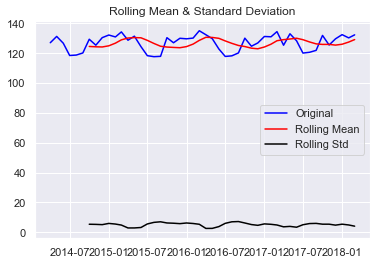

Results of Dickey-Fuller Test:
Test Statistic                -5.831410e+00
p-value                        3.967133e-07
#Lags Used                     8.000000e+00
Number of Observations Used    3.900000e+01
Critical Value (1%)           -3.610400e+00
Critical Value (5%)           -2.939109e+00
Critical Value (10%)          -2.608063e+00
dtype: float64 



In [391]:
test_stationarity(df_Bangalore['log_sales'])

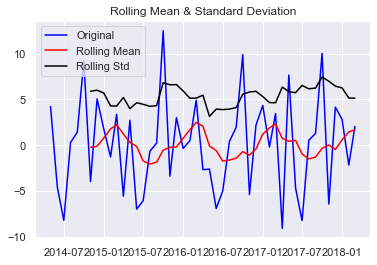

Results of Dickey-Fuller Test:
Test Statistic                -7.275456e+00
p-value                        1.548712e-10
#Lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64 



In [392]:
test_stationarity(df_Bangalore['log_sales'].diff().dropna())

** We see that at α = 0.05 the Time Series is indeed stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the  data.

In [393]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

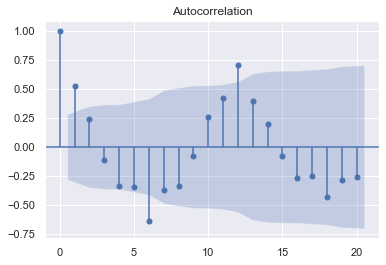

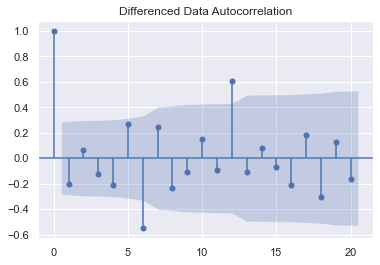

In [394]:
plot_acf(df_Bangalore['log_sales'],lags=20)
plot_acf(df_Bangalore['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


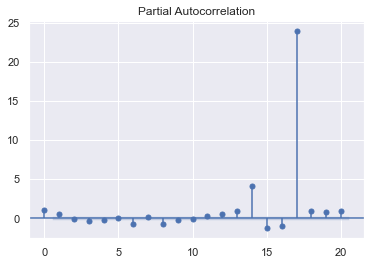

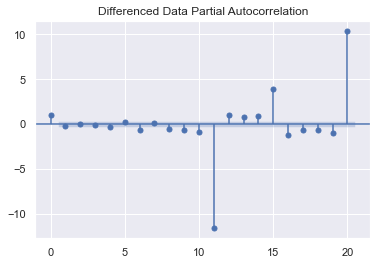

In [395]:
plot_pacf(df_Bangalore['log_sales'],lags=20)
plot_pacf(df_Bangalore['log_sales'].diff().dropna(),lags=20,title='Differenced Data Partial Autocorrelation')
plt.show()

#### Split the data into train and test and plot the training and test data.

In [396]:
train1b=df_Bangalore.loc['2014-04-01':'2016-12-01']
test1b=df_Bangalore.loc['2017-01-01':'2018-03-01']

#### Check for stationarity of the Training Data Time Series.

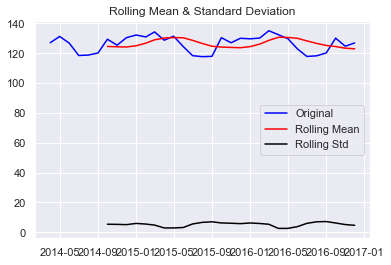

Results of Dickey-Fuller Test:
Test Statistic                 -4.279573
p-value                         0.000482
#Lags Used                     10.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64 



In [397]:
test_stationarity(train1b['log_sales'])

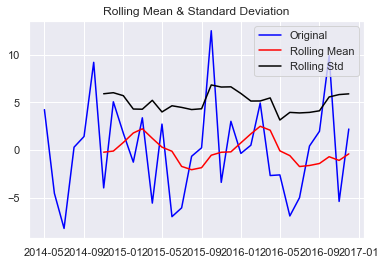

Results of Dickey-Fuller Test:
Test Statistic                -1.082649e+01
p-value                        1.751537e-19
#Lags Used                     1.000000e+01
Number of Observations Used    2.100000e+01
Critical Value (1%)           -3.788386e+00
Critical Value (5%)           -3.013098e+00
Critical Value (10%)          -2.646397e+00
dtype: float64 



In [398]:
test_stationarity(train1b['log_sales'].diff().dropna())

** We see that after taking a difference of order 1 the series have become stationary at α = 0.05.

In [399]:
train1b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 2014-04-01 to 2016-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   log_sales  33 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


#### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [400]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [401]:
# Creating an empty Dataframe with column names only
ARIMA_AIC1b = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC1b

Empty DataFrame
Columns: [param, AIC]
Index: []

In [402]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model_2b = ARIMA(train1b['log_sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_2b.aic))
    ARIMA_AIC1b = ARIMA_AIC1b.append({'param':param, 'AIC': ARIMA_model_2b.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:208.83430762422


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 0, 1) - AIC:200.5446109650528
ARIMA(0, 0, 2) - AIC:189.8142734011679
ARIMA(1, 0, 0) - AIC:197.56478961358795
ARIMA(1, 0, 1) - AIC:199.30012583337555


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params availa

ARIMA(1, 0, 2) - AIC:194.80882460128595
ARIMA(2, 0, 0) - AIC:198.95308721751795
ARIMA(2, 0, 1) - AIC:191.02117190447888


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 0, 2) - AIC:191.63214543115296


In [403]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC1b.sort_values(by='AIC',ascending=True)

param         AIC
2  (0, 0, 2)  189.814273
7  (2, 0, 1)  191.021172
8  (2, 0, 2)  191.632145
5  (1, 0, 2)  194.808825
3  (1, 0, 0)  197.564790
6  (2, 0, 0)  198.953087
4  (1, 0, 1)  199.300126
1  (0, 0, 1)  200.544611
0  (0, 0, 0)  208.834308

In [404]:
auto_ARIMA_2b = ARIMA(train1b['log_sales'], order=(0,0,2))

results_auto_ARIMA_2b = auto_ARIMA_2b.fit()

print(results_auto_ARIMA_2b.summary())

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

                              ARMA Model Results                              
Dep. Variable:              log_sales   No. Observations:                   33
Model:                     ARMA(0, 2)   Log Likelihood                 -90.907
Method:                       css-mle   S.D. of innovations              3.482
Date:                Thu, 19 Aug 2021   AIC                            189.814
Time:                        10:34:31   BIC                            195.800
Sample:                    04-01-2014   HQIC                           191.828
                         - 12-01-2016                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             125.9865      1.540     81.803      0.000     122.968     129.005
ma.L1.log_sales     0.6129      0.094      6.544      0.000       0.429       0.796
ma.L2.log_sales     0.9999      

#### Predict on the Test Set using this model and evaluate the model.

In [405]:
predicted_auto_ARIMA_2b = results_auto_ARIMA_2b.forecast(steps=len(test1b))

In [406]:
from sklearn.metrics import  mean_squared_error
rmse_2a = mean_squared_error(test1b['log_sales'],predicted_auto_ARIMA_2b[0],squared=False)
print(rmse_2a)

5.755798128582992


In [407]:
resultsDfB = pd.DataFrame({'RMSE': [rmse_2a]}
                           ,index=['ARIMA(0,0,2)'])

resultsDfB

RMSE
ARIMA(0,0,2)  5.755798

#### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

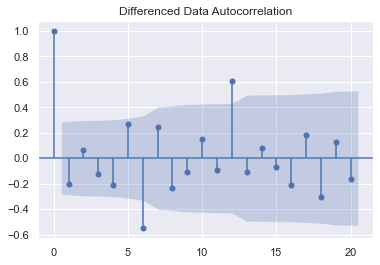

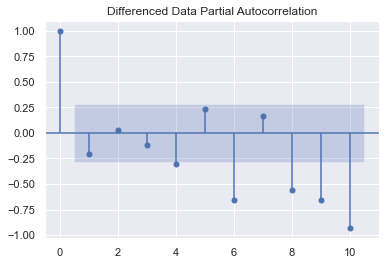

In [408]:
plot_acf(df_Bangalore['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plot_pacf(df_Bangalore['log_sales'].diff().dropna(),lags=10,title='Differenced Data Partial Autocorrelation')
plt.show()

** Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

In [409]:
manual_ARIMA_2b = ARIMA(train1b['log_sales'].astype('float64'), order=(0,1,0))

results_manual_ARIMA_2b = manual_ARIMA_2b.fit()

print(results_manual_ARIMA_2b.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_sales   No. Observations:                   32
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -96.920
Method:                           css   S.D. of innovations              5.002
Date:                Thu, 19 Aug 2021   AIC                            197.839
Time:                        10:34:32   BIC                            200.771
Sample:                    05-01-2014   HQIC                           198.811
                         - 12-01-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0046      0.884     -0.005      0.996      -1.738       1.728


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

#### Predict on the Test Set using this model and evaluate the model.

In [410]:
predicted_manual_ARIMA_2b = results_manual_ARIMA_2b.forecast(steps=len(test1b))

In [411]:
rmse_2b = mean_squared_error(test1b['log_sales'],predicted_manual_ARIMA_2b[0],squared=False)
print(rmse_2b)

4.862615931531502


In [412]:
temp_resultsDfB = pd.DataFrame({'RMSE': [rmse_2b]}
                           ,index=['ARIMA(0,1,0)'])


resultsDfB = pd.concat([resultsDfB,temp_resultsDfB])

resultsDfB

RMSE
ARIMA(0,0,2)  5.755798
ARIMA(0,1,0)  4.862616

#### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

*** Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

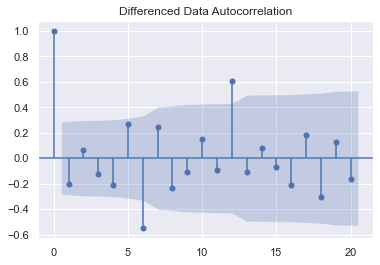

In [413]:
plot_acf(df_Bangalore['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plt.show()

** We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

#### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [414]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [415]:
SARIMA_AIC_2a = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_2a

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [416]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_2b = sm.tsa.statespace.SARIMAX(train1b['log_sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_2b = SARIMA_model_2b.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_2b.aic))
        SARIMA_AIC_2a = SARIMA_AIC_2a.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_2b.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:190.06541657446513
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:151.9695891793937
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:114.35648290352103
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:152.03815121076553


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:135.65695079593405
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:100.55521802439979
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:89.97348923674738
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:91.40215303922274
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:90.00612125316852
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:186.02111579627314
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:148.01308925261537
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:108.34898843013968
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:153.3245685631622
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:131.01175803310633
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:95.75185624689851
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:89.35517429649133
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:90.16289264412285
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:81.00616098745303
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:178.99231627320495
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:144.0906107359565
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:104.48239047045199
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:146.95615995342706
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:11

In [417]:
SARIMA_AIC_2a.sort_values(by=['AIC']).head()

param      seasonal        AIC
80  (2, 1, 2)  (2, 0, 2, 6)  74.282186
77  (2, 1, 2)  (1, 0, 2, 6)  75.493898
78  (2, 1, 2)  (2, 0, 0, 6)  76.101450
26  (0, 1, 2)  (2, 0, 2, 6)  77.900130
79  (2, 1, 2)  (2, 0, 1, 6)  79.632769

In [418]:
import statsmodels.api as sm

auto_SARIMA_2b = sm.tsa.statespace.SARIMAX(train1b['log_sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_2b = auto_SARIMA_2b.fit(maxiter=1000)
print(results_auto_SARIMA_2b.summary())

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   33
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 6)   Log Likelihood                 -28.141
Date:                           Thu, 19 Aug 2021   AIC                             74.282
Time:                                   10:34:51   BIC                             81.781
Sample:                                        0   HQIC                            75.028
                                            - 33                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4869      0.356      1.367      0.172      -0.211       1.185
ar.L2         -0.7252      0.262     -2.765

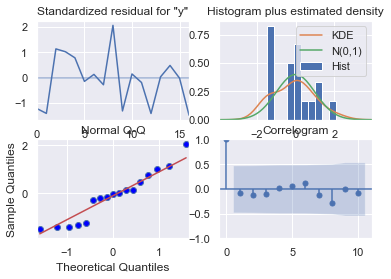

In [419]:
results_auto_SARIMA_2b.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [420]:
predicted_auto_SARIMA_2b = results_auto_SARIMA_2b.get_forecast(steps=len(test1b))

In [421]:
predicted_auto_SARIMA_2b.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  130.367935  1.105598     128.201001     132.534868
1  131.326442  1.100193     129.170103     133.482781
2  133.862981  1.161236     131.587000     136.138963
3  128.389074  1.187858     126.060914     130.717233
4  128.829007  1.426174     126.033758     131.624256

In [422]:
rmse_2c = mean_squared_error(test1b['log_sales'],predicted_auto_SARIMA_2b.predicted_mean,squared=False)
print(rmse_2c)

2.727602635056308


In [423]:
temp_resultsDfB = pd.DataFrame({'RMSE': [rmse_2c]}
                           ,index=['SARIMA(2,1,2)(2,0,2,6)'])


resultsDfB = pd.concat([resultsDfB,temp_resultsDfB])

resultsDfB

RMSE
ARIMA(0,0,2)            5.755798
ARIMA(0,1,0)            4.862616
SARIMA(2,1,2)(2,0,2,6)  2.727603

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [424]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [425]:
SARIMA_AIC_2b = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_2b

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [426]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_2c = sm.tsa.statespace.SARIMAX(train1b['log_sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_2c = SARIMA_model_2c.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_2c.aic))
        SARIMA_AIC_2b = SARIMA_AIC_2b.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_2c.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:190.06541657446513
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:112.49933965200827
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:49.6448828338513
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:90.15485429307493


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:88.58725895068142
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:31.627851768924824
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:40.50033681980945
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:42.500336828025
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:33.20520717756418
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:186.02111579627314
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:106.64086652802675
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:44.74030840064366
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:88.67358559838242
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:79.92546504396486
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:28.19780713477483
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:39.93688355542477
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:41.93688357791082
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:30.12999412384823
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:178.99231627320495
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:102.5123351720698
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:39.961567803814155
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:86.98167675209095
SARIMA(0, 1, 2)x(1, 0, 1,

In [427]:
SARIMA_AIC_2b.sort_values(by=['AIC']).head()

param       seasonal        AIC
80  (2, 1, 2)  (2, 0, 2, 12) -35.118822
77  (2, 1, 2)  (1, 0, 2, 12) -30.636186
60  (2, 1, 0)  (2, 0, 0, 12)  25.945776
68  (2, 1, 1)  (1, 0, 2, 12)  26.837512
78  (2, 1, 2)  (2, 0, 0, 12)  27.168831

In [428]:
import statsmodels.api as sm

auto_SARIMA_2c = sm.tsa.statespace.SARIMAX(train1b['log_sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                
                                enforce_invertibility=False)
results_auto_SARIMA_2c = auto_SARIMA_2c.fit(maxiter=1000)
print(results_auto_SARIMA_2c.summary())

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   33
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 12)   Log Likelihood                 -73.111
Date:                            Thu, 19 Aug 2021   AIC                            164.222
Time:                                    10:35:21   BIC                            177.414
Sample:                                         0   HQIC                           168.595
                                             - 33                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4795      0.520     -0.922      0.357      -1.499       0.540
ar.L2          0.3529      0.422   

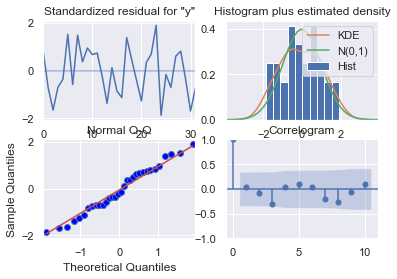

In [429]:
results_auto_SARIMA_2c.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [430]:
predicted_auto_SARIMA_2c = results_auto_SARIMA_2c.get_forecast(steps=len(test1b))

In [431]:
predicted_auto_SARIMA_2c.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  128.238649  1.659122     124.986831     131.490468
1  129.187296  1.855252     125.551069     132.823524
2  134.695116  1.840909     131.086999     138.303232
3  132.696809  1.753351     129.260304     136.133314
4  129.350116  1.753309     125.913693     132.786538

In [432]:
rmse_2d = mean_squared_error(test1b['log_sales'],predicted_auto_SARIMA_2c.predicted_mean,squared=False)
print(rmse_2d)

3.4511872082035095


In [433]:
temp_resultsDfB = pd.DataFrame({'RMSE': [rmse_2d]}
                           ,index=['SARIMA(2,1,2)(2,0,2,12)'])


resultsDfB = pd.concat([resultsDfB,temp_resultsDfB])

resultsDfB

RMSE
ARIMA(0,0,2)             5.755798
ARIMA(0,1,0)             4.862616
SARIMA(2,1,2)(2,0,2,6)   2.727603
SARIMA(2,1,2)(2,0,2,12)  3.451187

In [434]:
TES_trainB = train1b.copy()
TES_testB = test1b.copy()

In [435]:
model_TESB = ExponentialSmoothing(TES_trainB['log_sales'],trend='additive',seasonal='multiplicative')

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [436]:
model_TESB_autofit = model_TESB.fit()

In [437]:
model_TESB_autofit.params

{'smoothing_level': 3.6945900999848596e-08,
 'smoothing_trend': 1.4869853606143498e-09,
 'smoothing_seasonal': 0.9999999630009385,
 'damping_trend': nan,
 'initial_level': 129.4060106161735,
 'initial_trend': -0.029867627220009796,
 'initial_seasons': array([0.98212998, 1.01505433, 0.98005753, 0.91656743, 0.91902631,
        0.9301617 , 1.00155263, 0.97095867, 1.0103416 , 1.02418718,
        1.01449153, 1.04086992]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [438]:
## Prediction on the test data

TES_testB['auto_predict'] = model_TESB_autofit.forecast(steps=len(test1b))
TES_testB.head()

log_sales  auto_predict
date                                
2017-01-01  131.252411    129.322345
2017-02-01  131.042922    129.817076
2017-03-01  134.504659    134.724200
2017-04-01  125.395711    132.046761
2017-05-01  133.055274    129.435550

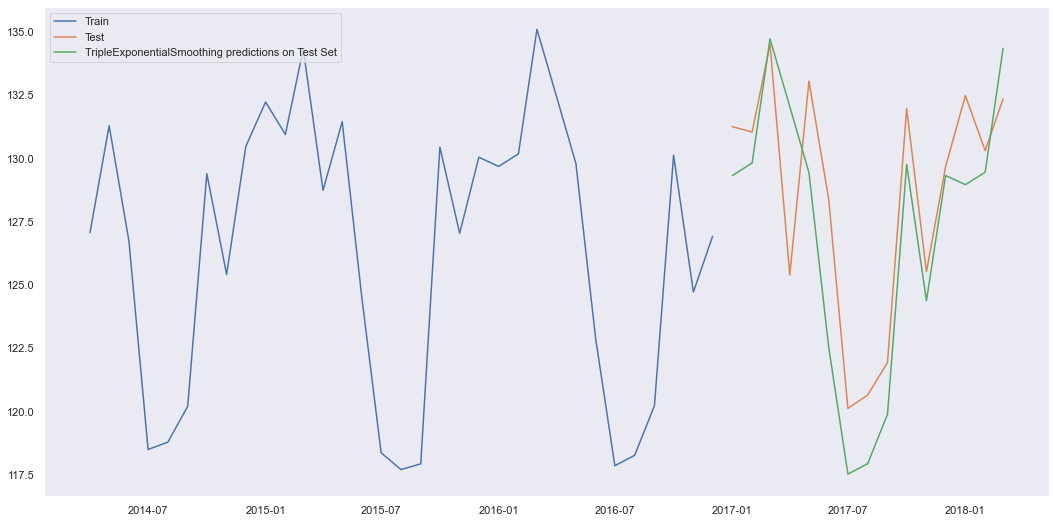

In [439]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_trainB['log_sales'], label='Train')
plt.plot(TES_testB['log_sales'], label='Test')

plt.plot(TES_testB['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [440]:
## Test Data

rmse_model_test_2e = metrics.mean_squared_error(TES_testB['log_sales'],TES_testB['auto_predict'],squared=False)
print(" Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model_test_2e))

 Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 3.039


In [441]:
resultsDf_1e = pd.DataFrame({'Test RMSE': [rmse_model_test_2e]}
                           ,index=['TripleExponentialSmoothing'])

resultsDfB = pd.concat([resultsDfB, resultsDf_1e])
resultsDfB

RMSE  Test RMSE
ARIMA(0,0,2)                5.755798        NaN
ARIMA(0,1,0)                4.862616        NaN
SARIMA(2,1,2)(2,0,2,6)      2.727603        NaN
SARIMA(2,1,2)(2,0,2,12)     3.451187        NaN
TripleExponentialSmoothing       NaN   3.039016

In [442]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_2e = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_2e

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [443]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TESB_alpha_i_j_k = model_TESB.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_trainB['predict',i,j,k] = model_TESB_alpha_i_j_k.fittedvalues
            TES_testB['predict',i,j,k] = model_TESB_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model_trainB = metrics.mean_squared_error(TES_trainB['log_sales'],TES_trainB['predict',i,j,k],squared=False)
            
            rmse_model_testB = metrics.mean_squared_error(TES_testB['log_sales'],TES_testB['predict',i,j,k],squared=False)
            
            resultsDf_2e = resultsDf_2e.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model_trainB,'Test RMSE':rmse_model_testB}
                                                 , ignore_index=True)

In [444]:
resultsDf_2e

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0             0.3          0.3           0.3    1.749621   5.326977
1             0.3          0.3           0.4    1.706435   5.674075
2             0.3          0.3           0.5    1.669825   6.027807
3             0.3          0.3           0.6    1.640269   6.386287
4             0.3          0.3           0.7    1.618194   6.748474
..            ...          ...           ...         ...        ...
507           1.0          1.0           0.6    2.938994  28.077847
508           1.0          1.0           0.7    3.119828  27.928715
509           1.0          1.0           0.8    3.339588  27.778441
510           1.0          1.0           0.9    3.590292  27.630648
511           1.0          1.0           1.0    3.865162  27.490063

[512 rows x 5 columns]

In [445]:
resultsDf_2e.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
349           0.8          0.6           0.8    2.202021   3.488824
380           0.8          1.0           0.7    2.648078   3.491797
413           0.9          0.6           0.8    2.317431   3.501730
405           0.9          0.5           0.8    2.184088   3.536506
372           0.8          0.9           0.7    2.522077   3.541287

In [446]:
TES_testB

log_sales  auto_predict  (predict, 0.3, 0.3, 0.3)  \
date                                                             
2017-01-01  131.252411    129.322345                129.508533   
2017-02-01  131.042922    129.817076                128.660981   
2017-03-01  134.504659    134.724200                132.083462   
2017-04-01  125.395711    132.046761                126.132857   
2017-05-01  133.055274    129.435550                126.831413   
2017-06-01  128.375517    122.525609                121.079717   
2017-07-01  120.122969    117.527657                114.706549   
2017-08-01  120.649751    117.938338                114.592672   
2017-09-01  121.936934    119.891528                115.638645   
2017-10-01  131.970973    129.762172                125.112438   
2017-11-01  125.523097    124.372899                120.467471   
2017-12-01  129.678579    129.322649                124.426290   
2018-01-01  132.481065    128.961332                125.132235   
2018-02-01  130.305565    129.454598                124.301047   
2018-03-01  132.351506    134.347932                127.594874   

            (predict, 0.3, 0.3, 0.4)  (predict, 0.3, 0.3, 0.5)  \
date                                                             
2017-01-01                129.161034                128.814480   
2017-02-01                128.548827                128.436924   
2017-03-01                132.103861                132.123815   
2017-04-01                126.571430                126.974909   
2017-05-01                126.334369                125.859738   
2017-06-01                120.328158                119.639245   
2017-07-01                114.429698                114.131093   
2017-08-01                114.315339                114.037318   
2017-09-01                115.367830                115.108797   
2017-10-01                124.940288                124.688875   
2017-11-01                120.186485                119.856606   
2017-12-01                124.033050                123.639150   
2018-01-01                124.511165                123.890452   
2018-02-01                123.907073                123.511638   
2018-03-01                127.319342                127.040901   

            (predict, 0.3, 0.3, 0.6000000000000001)  \
date                                                  
2017-01-01                               128.468872   
2017-02-01                               128.325271   
2017-03-01                               132.143320   
2017-04-01                               127.343589   
2017-05-01                               125.407534   
2017-06-01                               119.012656   
2017-07-01                               113.810622   
2017-08-01                               113.758307   
2017-09-01                               114.861161   
2017-10-01                               124.358513   
2017-11-01                               119.477876   
2017-12-01                               123.244583   
2018-01-01                               123.270095   
2018-02-01                               123.114733   
2018-03-01                               126.759537   

            (predict, 0.3, 0.3, 0.7000000000000002)  \
date                                                  
2017-01-01                               128.124208   
2017-02-01                               128.213867   
2017-03-01                               132.162375   
2017-04-01                               127.677767   
2017-05-01                               124.977769   
2017-06-01                               118.448066   
2017-07-01                               113.468174   
2017-08-01                               113.478007   
2017-09-01                               114.624538   
2017-10-01                               123.949519   
2017-11-01                               119.050341   
2017-12-01                               122.849341   
2018-01-01                               122.650095   
2018-0

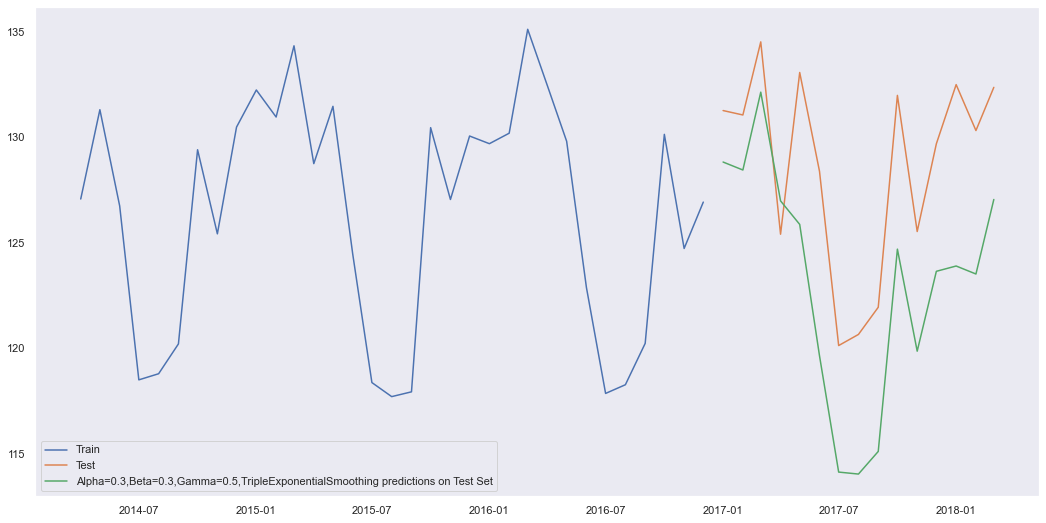

In [447]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_trainB['log_sales'], label='Train')
plt.plot(TES_testB['log_sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_testB['predict', 0.3, 0.3, 0.5], label='Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [448]:
resultsDf_2e = pd.DataFrame({'Test RMSE': [resultsDf_2e.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing'])

resultsDfB = pd.concat([resultsDfB, resultsDf_2e])
resultsDfB

RMSE  Test RMSE
ARIMA(0,0,2)                                        5.755798        NaN
ARIMA(0,1,0)                                        4.862616        NaN
SARIMA(2,1,2)(2,0,2,6)                              2.727603        NaN
SARIMA(2,1,2)(2,0,2,12)                             3.451187        NaN
TripleExponentialSmoothing                               NaN   3.039016
Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialS...       NaN   3.488824

In [449]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDfB.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



RMSE  Test RMSE
TripleExponentialSmoothing                               NaN   3.039016
Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialS...       NaN   3.488824
ARIMA(0,0,2)                                        5.755798        NaN
ARIMA(0,1,0)                                        4.862616        NaN
SARIMA(2,1,2)(2,0,2,6)                              2.727603        NaN
SARIMA(2,1,2)(2,0,2,12)                             3.451187        NaN

In [450]:
fullmodel2B = ExponentialSmoothing(df_Bangalore,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=3.6945900999848596e-08,
                                                                 smoothing_trend=1.4869853606143498e-09,
                                                                 smoothing_seasonal=0.9999999630009385)

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [451]:
RMSE_fullmodel2B = metrics.mean_squared_error(df_Bangalore['log_sales'],fullmodel2B.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2B)

RMSE: 1.9944424748581093


In [452]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2BA = fullmodel2B.forecast(steps=len(test1b))

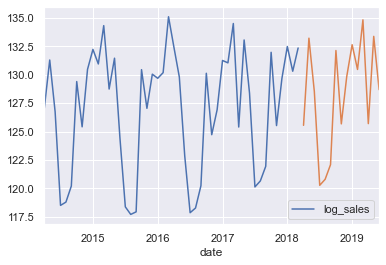

In [453]:
df_Bangalore.plot()
prediction_2BA.plot();

In [454]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_2B_df = pd.DataFrame({'lower_CI':prediction_2BA - 1.96*np.std(fullmodel2B.resid,ddof=1),
                          'prediction':prediction_2BA,
                          'upper_ci': prediction_2BA + 1.96*np.std(fullmodel2B.resid,ddof=1)})
pred_2B_df.head()

lower_CI  prediction    upper_ci
2018-04-01  121.595097  125.545339  129.495582
2018-05-01  129.263784  133.214026  137.164268
2018-06-01  124.578428  128.528671  132.478913
2018-07-01  116.316020  120.266263  124.216505
2018-08-01  116.843416  120.793658  124.743901

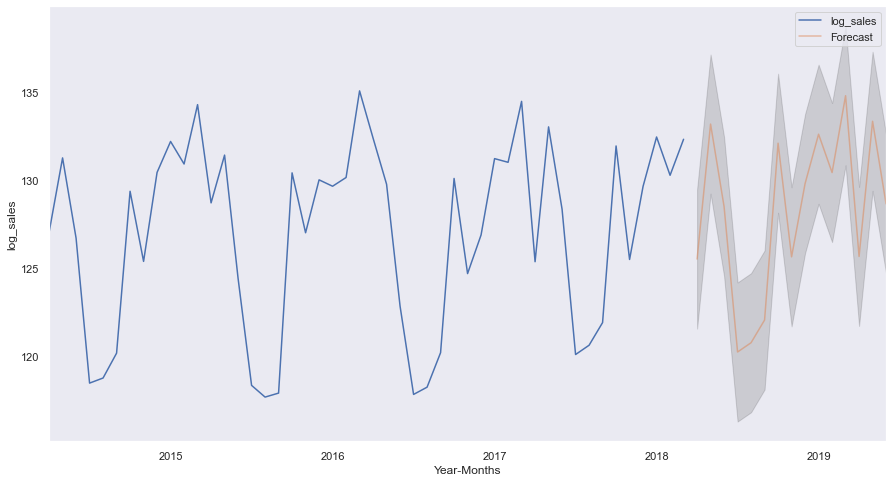

In [455]:
# plot the forecast along with the confidence band

axis = df_Bangalore.plot(label='Actual', figsize=(15,8))
pred_2B_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_2B_df['lower_CI'], pred_2B_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('log_sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [456]:
fullmodel2C = ExponentialSmoothing(df_Bangalore,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.3,
                                                                 smoothing_seasonal=0.5)

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [457]:
RMSE_fullmodel2C = metrics.mean_squared_error(df_Bangalore['log_sales'],fullmodel2C.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2C)

RMSE: 2.004064961533805


In [458]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2C = fullmodel2C.forecast(steps=len(test1b))

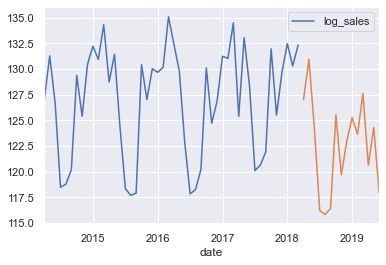

In [459]:
df_Bangalore.plot()
prediction_2C.plot();

In [460]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2C_df = pd.DataFrame({'lower_CI':prediction_2C - 1.96*np.std(fullmodel2C.resid,ddof=1),
                          'prediction':prediction_2C,
                          'upper_ci': prediction_2C + 1.96*np.std(fullmodel2C.resid,ddof=1)})
pred_2C_df.head()

lower_CI  prediction    upper_ci
2018-04-01  123.098435  127.042900  130.987365
2018-05-01  127.019408  130.963873  134.908338
2018-06-01  120.362050  124.306515  128.250980
2018-07-01  112.273403  116.217868  120.162334
2018-08-01  111.906816  115.851281  119.795747

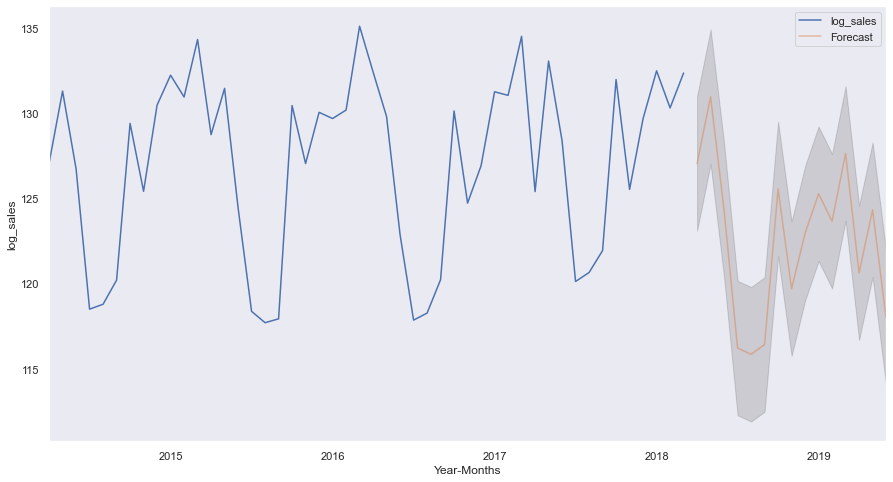

In [461]:
# plot the forecast along with the confidence band

axis = df_Bangalore.plot(label='Actual', figsize=(15,8))
pred_2C_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2C_df.index, pred_2C_df['lower_CI'], pred_2C_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('log_sales')
plt.legend(loc='best')
plt.grid()
plt.show()

# Kolkata

In [462]:
df_Kolkata = df_Kolkata.groupby(['date']).sum()

In [463]:
df_Kolkata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-04-01 to 2018-03-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   log_sales  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


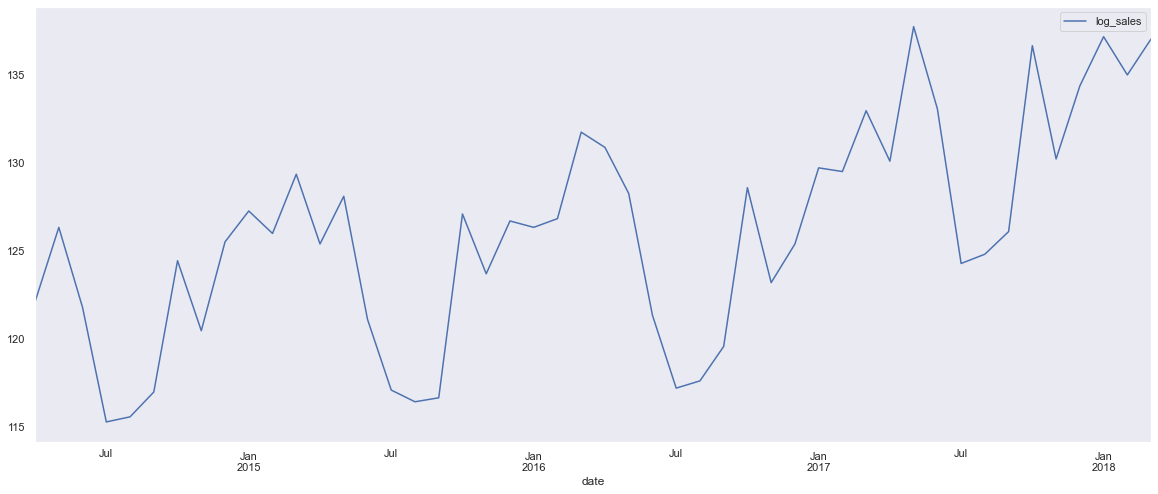

In [464]:
df_Kolkata.plot(figsize=(20,8))
plt.grid()

In [465]:
df_Kolkata.shape

(48, 1)

#### Decompose the Time Series and plot the different components.

In [466]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

#### Additive Decomposition

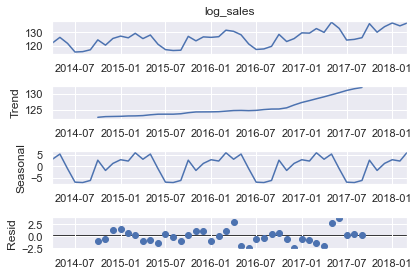

In [467]:
decomposition_3A = seasonal_decompose(df_Kolkata['log_sales'],model='additive')
decomposition_3A.plot();

** We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [468]:
trend_3A = decomposition_3A.trend
seasonality_3A = decomposition_3A.seasonal
residual_3A = decomposition_3A.resid

print('Trend','\n',trend_3A.head(12),'\n')
print('Seasonality','\n',seasonality_3A.head(12),'\n')
print('Residual','\n',residual_3A.head(12),'\n')

Trend 
 date
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01    122.704301
2014-11-01    122.914959
2014-12-01    122.960605
2015-01-01    123.008033
2015-02-01    123.119271
2015-03-01    123.141327
Name: trend, dtype: float64 

Seasonality 
 date
2014-04-01    3.080218
2014-05-01    5.359350
2014-06-01   -1.103078
2014-07-01   -7.022990
2014-08-01   -7.194994
2014-09-01   -6.269678
2014-10-01    2.671466
2014-11-01   -1.861742
2014-12-01    1.241334
2015-01-01    2.869030
2015-02-01    2.284090
2015-03-01    5.946995
Name: seasonal, dtype: float64 

Residual 
 date
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01   -0.954688
2014-11-01   -0.615341
2014-12-01    1.291293
2015-01-01    1.373595
2015-02-01    0.567100
2015-03-01    0.254219
Name: resid, dtype: float64 



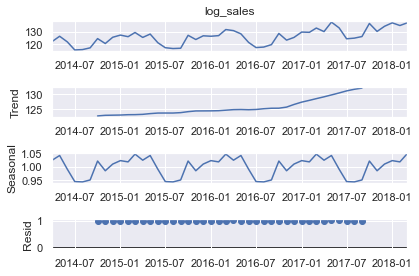

In [469]:
decomposition_3B = seasonal_decompose(df_Kolkata['log_sales'],model='multiplicative')
decomposition_3B.plot();

** For the multiplicative series, we see that a lot of residuals are located around 1

In [470]:
trend_3B = decomposition_3B.trend
seasonality_3B = decomposition_3B.seasonal
residual_3B = decomposition_3B.resid

print('Trend','\n',trend_3B.head(12),'\n')
print('Seasonality','\n',seasonality_3B.head(12),'\n')
print('Residual','\n',residual_3B.head(12),'\n')

Trend 
 date
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01    122.704301
2014-11-01    122.914959
2014-12-01    122.960605
2015-01-01    123.008033
2015-02-01    123.119271
2015-03-01    123.141327
Name: trend, dtype: float64 

Seasonality 
 date
2014-04-01    1.024549
2014-05-01    1.042142
2014-06-01    0.990672
2014-07-01    0.944329
2014-08-01    0.943048
2014-09-01    0.950416
2014-10-01    1.021375
2014-11-01    0.984900
2014-12-01    1.009994
2015-01-01    1.022928
2015-02-01    1.018204
2015-03-01    1.047444
Name: seasonal, dtype: float64 

Residual 
 date
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01    0.992771
2014-11-01    0.994870
2014-12-01    1.010498
2015-01-01    1.011304
2015-02-01    1.004865
2015-03-01    1.002782
Name: resid, dtype: float64 



#### Check for stationarity of the whole Time Series data.

In [471]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print (dfoutput,'\n')

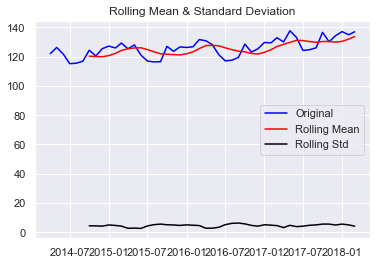

Results of Dickey-Fuller Test:
Test Statistic                  1.242945
p-value                         0.996270
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
dtype: float64 

Test Statistic                  1.242945
p-value                         0.996270
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
dtype: float64 

Test Statistic                  1.242945
p-value                         0.996270
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64 



In [472]:
test_stationarity(df_Kolkata['log_sales'])

** We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

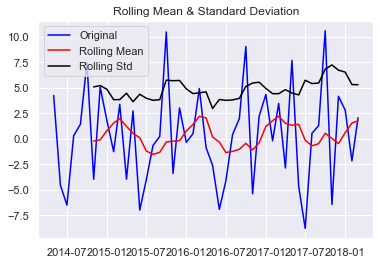

Results of Dickey-Fuller Test:
Test Statistic                 -4.939861
p-value                         0.000029
#Lags Used                     10.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
dtype: float64 

Test Statistic                 -4.939861
p-value                         0.000029
#Lags Used                     10.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
dtype: float64 

Test Statistic                 -4.939861
p-value                         0.000029
#Lags Used                     10.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64 



In [473]:
test_stationarity(df_Kolkata['log_sales'].diff().dropna())

* We see that at α = 0.05 the Time Series is indeed stationary

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the data.

In [474]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

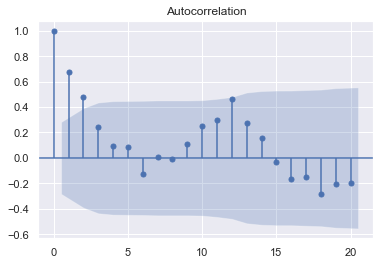

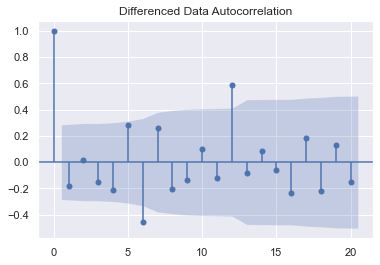

In [475]:
plot_acf(df_Kolkata['log_sales'],lags=20)
plot_acf(df_Kolkata['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


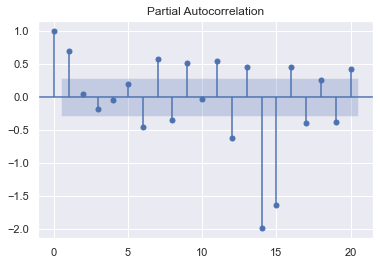

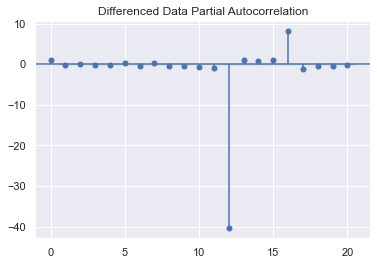

In [476]:
plot_pacf(df_Kolkata['log_sales'],lags=20)
plot_pacf(df_Kolkata['log_sales'].diff().dropna(),lags=20,title='Differenced Data Partial Autocorrelation')
plt.show()

### Split the data into train and test and plot the training and test data.

In [477]:
trainK=df_Kolkata.loc['2014-04-01':'2016-12-01']
testK=df_Kolkata.loc['2017-01-01':'2018-03-01']

#### Check for stationarity of the Training Data Time Series.

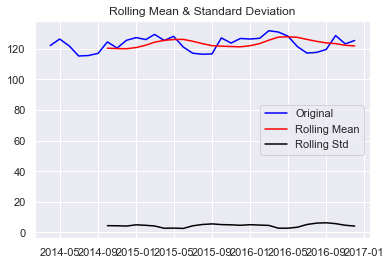

Results of Dickey-Fuller Test:
Test Statistic                 -0.858811
p-value                         0.801234
#Lags Used                     10.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
dtype: float64 

Test Statistic                 -0.858811
p-value                         0.801234
#Lags Used                     10.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
dtype: float64 

Test Statistic                 -0.858811
p-value                         0.801234
#Lags Used                     10.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64 



In [478]:
test_stationarity(trainK['log_sales'])

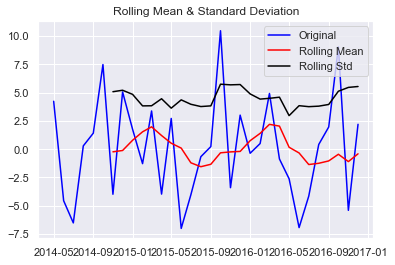

Results of Dickey-Fuller Test:
Test Statistic                -1.126514e+01
p-value                        1.586326e-20
#Lags Used                     1.000000e+01
Number of Observations Used    2.100000e+01
Critical Value (1%)           -3.788386e+00
dtype: float64 

Test Statistic                -1.126514e+01
p-value                        1.586326e-20
#Lags Used                     1.000000e+01
Number of Observations Used    2.100000e+01
Critical Value (1%)           -3.788386e+00
Critical Value (5%)           -3.013098e+00
dtype: float64 

Test Statistic                -1.126514e+01
p-value                        1.586326e-20
#Lags Used                     1.000000e+01
Number of Observations Used    2.100000e+01
Critical Value (1%)           -3.788386e+00
Critical Value (5%)           -3.013098e+00
Critical Value (10%)          -2.646397e+00
dtype: float64 



In [479]:
test_stationarity(trainK['log_sales'].diff().dropna())

#### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [480]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [481]:
# Creating an empty Dataframe with column names only
ARIMA_AIC_K = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_K

Empty DataFrame
Columns: [param, AIC]
Index: []

In [482]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model_K1 = ARIMA(trainK['log_sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_K1.aic))
    ARIMA_AIC_K = ARIMA_AIC_K.append({'param':param, 'AIC': ARIMA_model_K1.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:200.1089229716399


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 0, 1) - AIC:192.540049155766
ARIMA(0, 0, 2) - AIC:184.2297056633583
ARIMA(1, 0, 0) - AIC:189.59800326808693
ARIMA(1, 0, 1) - AIC:191.4475904854787


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 0, 2) - AIC:185.83051437612357
ARIMA(2, 0, 0) - AIC:191.26162073167623


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 0, 1) - AIC:187.83172457149362


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 0, 2) - AIC:186.00914244370557


In [483]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC_K.sort_values(by='AIC',ascending=True)

param         AIC
2  (0, 0, 2)  184.229706
5  (1, 0, 2)  185.830514
8  (2, 0, 2)  186.009142
7  (2, 0, 1)  187.831725
3  (1, 0, 0)  189.598003
6  (2, 0, 0)  191.261621
4  (1, 0, 1)  191.447590
1  (0, 0, 1)  192.540049
0  (0, 0, 0)  200.108923

In [484]:
auto_ARIMA_K = ARIMA(trainK['log_sales'], order=(0,0,2))

results_auto_ARIMA_K = auto_ARIMA_K.fit()

print(results_auto_ARIMA_K.summary())

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

                              ARMA Model Results                              
Dep. Variable:              log_sales   No. Observations:                   33
Model:                     ARMA(0, 2)   Log Likelihood                 -88.115
Method:                       css-mle   S.D. of innovations              3.200
Date:                Thu, 19 Aug 2021   AIC                            184.230
Time:                        10:35:55   BIC                            190.216
Sample:                    04-01-2014   HQIC                           186.244
                         - 12-01-2016                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             122.9593      1.401     87.755      0.000     120.213     125.706
ma.L1.log_sales     0.5875      0.110      5.323      0.000       0.371       0.804
ma.L2.log_sales     0.9998      

#### Predict on the Test Set using this model and evaluate the model.

In [485]:
predicted_auto_ARIMA_K = results_auto_ARIMA_K.forecast(steps=len(testK))

In [486]:
from sklearn.metrics import  mean_squared_error
rmse_k1 = mean_squared_error(testK['log_sales'],predicted_auto_ARIMA_K[0],squared=False)
print(rmse_k1)

10.167474898927646


In [487]:
results_k_Df = pd.DataFrame({'RMSE': [rmse_k1]}
                           ,index=['ARIMA(0,0,2)'])

results_k_Df

RMSE
ARIMA(0,0,2)  10.167475

#### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

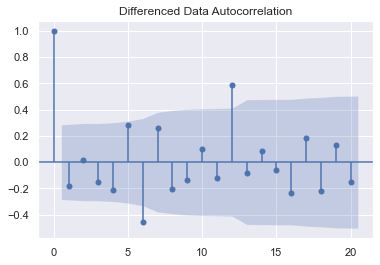

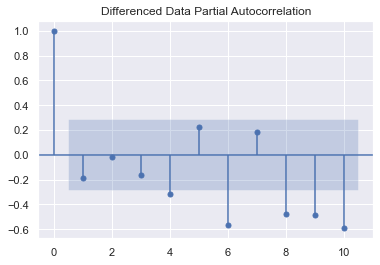

In [497]:
plot_acf(df_Kolkata['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plot_pacf(df_Kolkata['log_sales'].diff().dropna(),lags=10,title='Differenced Data Partial Autocorrelation')
plt.show()

** Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.
By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [489]:
manual_ARIMA_K = ARIMA(trainK['log_sales'].astype('float64'), order=(0,1,0))

results_manual_ARIMA_K = manual_ARIMA_K.fit()

print(results_manual_ARIMA_K.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_sales   No. Observations:                   32
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -93.142
Method:                           css   S.D. of innovations              4.445
Date:                Thu, 19 Aug 2021   AIC                            190.283
Time:                        10:35:57   BIC                            193.215
Sample:                    05-01-2014   HQIC                           191.255
                         - 12-01-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1025      0.786      0.130      0.896      -1.437       1.643


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

#### Predict on the Test Set using this model and evaluate the model.

In [490]:
predicted_manual_ARIMA_K = results_manual_ARIMA_K.forecast(steps=len(testK))

In [491]:
rmse_k2 = mean_squared_error(testK['log_sales'],predicted_manual_ARIMA_K[0],squared=False)
print(rmse_k2)

7.117171395725669


In [492]:
temp_results_k_Df = pd.DataFrame({'RMSE': [rmse_k2]}
                           ,index=['ARIMA(0,1,0)'])


results_k_Df = pd.concat([results_k_Df,temp_results_k_Df])

results_k_Df

RMSE
ARIMA(0,0,2)  10.167475
ARIMA(0,1,0)   7.117171

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

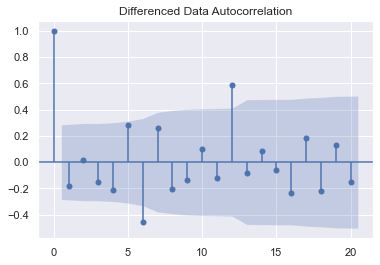

In [493]:
plot_acf(df_Kolkata['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plt.show()

#### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [494]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [495]:
SARIMA_AIC_K1 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_K1

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [513]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_K1 = sm.tsa.statespace.SARIMAX(trainK['log_sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_K1 = SARIMA_model_K1.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_K1.aic))
        SARIMA_AIC_K1 = SARIMA_AIC_K1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_K1.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:182.57313543246144
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:147.38006719345933
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:110.50801717128168
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:148.7912588968967


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:133.5097790428919
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:99.46898285299025
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:88.24398598359974
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:89.96679558701743
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:88.6771336004403
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:178.43065703999247
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:143.31001727102978
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:103.95305686838003
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:150.47459802104723
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:129.75780051321607
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:95.15846977701763
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:87.27938286707348
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:88.42626645267205
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:78.72117910412135
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:172.36359435834237
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:136.35878493182958
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:100.13183634131317
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:144.0016028550539
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:116.

In [514]:
SARIMA_AIC_K1.sort_values(by=['AIC']).head()

param      seasonal        AIC
80  (2, 1, 2)  (2, 0, 2, 6)  73.830632
26  (0, 1, 2)  (2, 0, 2, 6)  75.763804
79  (2, 1, 2)  (2, 0, 1, 6)  77.175551
53  (1, 1, 2)  (2, 0, 2, 6)  77.684564
62  (2, 1, 0)  (2, 0, 2, 6)  78.422230

In [515]:
import statsmodels.api as sm

auto_SARIMA_K1 = sm.tsa.statespace.SARIMAX(trainK['log_sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_K1 = auto_SARIMA_K1.fit(maxiter=1000)
print(results_auto_SARIMA_K1.summary())

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   33
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 6)   Log Likelihood                 -27.915
Date:                           Thu, 19 Aug 2021   AIC                             73.831
Time:                                   11:21:07   BIC                             81.330
Sample:                                        0   HQIC                            74.576
                                            - 33                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4949      0.340      1.457      0.145      -0.171       1.161
ar.L2         -0.7149      0.408     -1.754

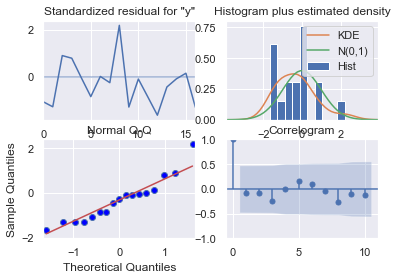

In [516]:
results_auto_SARIMA_K1.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [518]:
predicted_auto_SARIMA_K1 = results_auto_SARIMA_K1.get_forecast(steps=len(testK))

In [520]:
predicted_auto_SARIMA_K1.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  127.570138  1.090960     125.431895     129.708380
1  127.992320  1.092308     125.851436     130.133203
2  132.018712  1.109410     129.844309     134.193116
3  129.919748  1.174165     127.618426     132.221070
4  129.305047  1.434339     126.493794     132.116300

In [521]:
rmse_k3 = mean_squared_error(testK['log_sales'],predicted_auto_SARIMA_K1.predicted_mean,squared=False)
print(rmse_k3)

6.197019914043381


In [522]:
temp_results_k_Df = pd.DataFrame({'RMSE': [rmse_k3]}
                           ,index=['SARIMA(2,1,2)(2,0,2,6)'])


results_k_Df = pd.concat([results_k_Df,temp_results_k_Df])

results_k_Df

RMSE
ARIMA(0,0,2)            10.167475
ARIMA(0,1,0)             7.117171
SARIMA(2,1,2)(2,0,2,6)   6.197020

#### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [523]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [524]:
SARIMA_AIC_K2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_K2

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [525]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_K2 = sm.tsa.statespace.SARIMAX(trainK['log_sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_K2 = SARIMA_model_K2.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_K2.aic))
        SARIMA_AIC_K2 = SARIMA_AIC_K2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_K2.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:182.57313543246144
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:108.51119696041505
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:48.7833553152237
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:89.67442353246493
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:88.04857662283861


C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:30.546265024684434
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:40.629045455738215
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:42.629045457068024
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:31.54773011306026
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:178.43065703999247
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:102.00541762524261
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:43.732770721920836
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:86.83686620970309
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:78.66227584349949
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:26.46028641233406
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:42.034441985502355
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:44.0344419419129
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:27.34573425401461
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:172.36359435834237
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:98.24014896159083
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:39.23851873815824
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:86.40491397671178
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:75.94317792486572
SARIMA(0, 1, 2)x(1, 0

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [526]:
SARIMA_AIC_K2.sort_values(by=['AIC']).head()

param       seasonal        AIC
80  (2, 1, 2)  (2, 0, 2, 12) -24.590457
77  (2, 1, 2)  (1, 0, 2, 12)  -5.562899
60  (2, 1, 0)  (2, 0, 0, 12)  24.012877
69  (2, 1, 1)  (2, 0, 0, 12)  24.820711
26  (0, 1, 2)  (2, 0, 2, 12)  25.341854

In [530]:
import statsmodels.api as sm

auto_SARIMA_K2 = sm.tsa.statespace.SARIMAX(trainK['log_sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                
                                enforce_invertibility=False)
results_auto_SARIMA_K2 = auto_SARIMA_K2.fit(maxiter=1000)
print(results_auto_SARIMA_K2.summary())

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   33
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 12)   Log Likelihood                 -71.987
Date:                            Thu, 19 Aug 2021   AIC                            161.975
Time:                                    11:31:30   BIC                            175.166
Sample:                                         0   HQIC                           166.347
                                             - 33                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5135      1.057     -0.486      0.627      -2.585       1.558
ar.L2          0.3952      0.552   

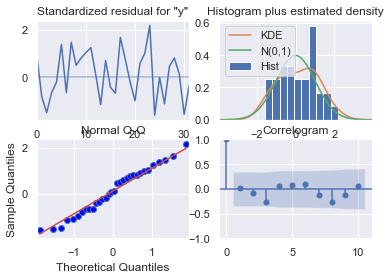

In [531]:
results_auto_SARIMA_K2.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [532]:
predicted_auto_SARIMA_K2 = results_auto_SARIMA_K2.get_forecast(steps=len(testK))

In [533]:
predicted_auto_SARIMA_K2.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  125.991244  1.645599     122.765930     129.216558
1  126.703377  1.854483     123.068657     130.338096
2  132.184312  1.870551     128.518099     135.850526
3  131.907625  1.847278     128.287026     135.528224
4  128.620035  1.850118     124.993871     132.246199

In [534]:
rmse_k4 = mean_squared_error(testK['log_sales'],predicted_auto_SARIMA_K2.predicted_mean,squared=False)
print(rmse_k4)

6.911286325000788


In [535]:

temp_results_k_Df = pd.DataFrame({'RMSE': [rmse_k4]}
                           ,index=['SARIMA(2,1,2)(2,0,2,12)'])


results_k_Df = pd.concat([results_k_Df,temp_results_k_Df])

results_k_Df

RMSE
ARIMA(0,0,2)             10.167475
ARIMA(0,1,0)              7.117171
SARIMA(2,1,2)(2,0,2,6)    6.197020
SARIMA(2,1,2)(2,0,2,12)   6.911286

## Triple Exponential Smoothing for Kolkata:

In [536]:
TES_trainK = trainK.copy()
TES_testK = testK.copy()

In [537]:
model_TES_K = ExponentialSmoothing(TES_trainK['log_sales'],trend='additive',seasonal='multiplicative')

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [538]:
model_TES_autofit_K = model_TES_K.fit()

In [539]:
model_TES_autofit_K.params

{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 4.9206465347330555e-09,
 'smoothing_seasonal': 0.9999999850988388,
 'damping_trend': nan,
 'initial_level': 125.8579423749217,
 'initial_trend': 0.10665623257264023,
 'initial_seasons': array([0.96922197, 1.0019492 , 0.96498297, 0.91258683, 0.91411   ,
        0.92449904, 0.98275318, 0.95049072, 0.98955429, 1.00256891,
        0.99164916, 1.01734032]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [540]:
## Prediction on the test data

TES_testK['auto_predict'] = model_TES_autofit_K.forecast(steps=len(testK))
TES_testK.head()

log_sales  auto_predict
date                                
2017-01-01  129.703951    127.579162
2017-02-01  129.494464    128.079255
2017-03-01  132.956191    133.048170
2017-04-01  130.083222    132.170374
2017-05-01  137.742842    129.524821

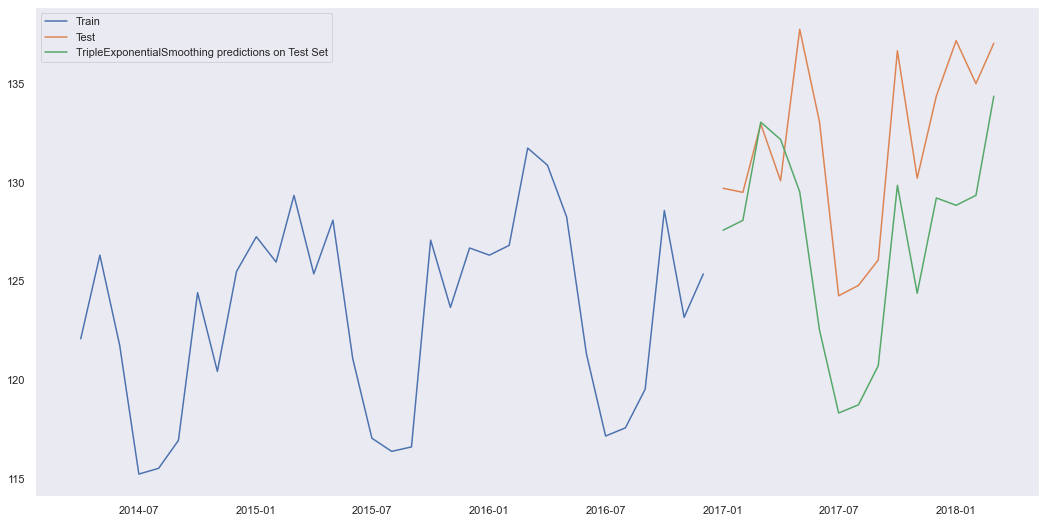

In [541]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_trainK['log_sales'], label='Train')
plt.plot(TES_testK['log_sales'], label='Test')

plt.plot(TES_testK['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [542]:
## Test Data

rmse_model_test_k5 = metrics.mean_squared_error(TES_testK['log_sales'],TES_testK['auto_predict'],squared=False)
print(" Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model_test_k5))

 Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 5.802


In [543]:
temp_results_k_Df = pd.DataFrame({'Test RMSE': [rmse_model_test_k5]}
                           ,index=['TripleExponentialSmoothing'])

results_k_Df = pd.concat([results_k_Df,temp_results_k_Df ])
results_k_Df


RMSE  Test RMSE
ARIMA(0,0,2)                10.167475        NaN
ARIMA(0,1,0)                 7.117171        NaN
SARIMA(2,1,2)(2,0,2,6)       6.197020        NaN
SARIMA(2,1,2)(2,0,2,12)      6.911286        NaN
TripleExponentialSmoothing        NaN   5.801987

In [544]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_kz = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_kz

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [546]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_K_alpha_i_j_k = model_TES_K.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_trainK['predict',i,j,k] = model_TES_K_alpha_i_j_k.fittedvalues
            TES_testK['predict',i,j,k] = model_TES_K_alpha_i_j_k.forecast(steps=len(testK))
        
            rmse_modelK_train = metrics.mean_squared_error(TES_trainK['log_sales'],TES_trainK['predict',i,j,k],squared=False)
            
            rmse_modelK_test = metrics.mean_squared_error(TES_testK['log_sales'],TES_testK['predict',i,j,k],squared=False)
            
            resultsDf_kz = resultsDf_kz.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_modelK_train,'Test RMSE':rmse_modelK_test}
                                                 , ignore_index=True)

In [547]:
resultsDf_kz 

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0             0.3          0.3           0.3    1.815320   8.351413
1             0.3          0.3           0.4    1.752826   8.368450
2             0.3          0.3           0.5    1.696062   8.383851
3             0.3          0.3           0.6    1.645604   8.395693
4             0.3          0.3           0.7    1.602034   8.402454
..            ...          ...           ...         ...        ...
507           1.0          1.0           0.6    3.076544  30.824228
508           1.0          1.0           0.7    3.275687  30.077721
509           1.0          1.0           0.8    3.531093  29.330153
510           1.0          1.0           0.9    3.831386  28.588538
511           1.0          1.0           1.0    4.166784  27.862683

[512 rows x 5 columns]

In [548]:
resultsDf_kz.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
351           0.8          0.6           1.0    2.301063   5.302363
366           0.8          0.8           0.9    2.548761   5.309918
295           0.7          0.7           1.0    2.242253   5.323526
415           0.9          0.6           1.0    2.525454   5.383694
239           0.6          0.8           1.0    2.163856   5.389351

In [549]:
TES_testK

log_sales  auto_predict  (predict, 0.3, 0.3, 0.3)  \
date                                                             
2017-01-01  129.703951    127.579162                128.373384   
2017-02-01  129.494464    128.079255                127.759698   
2017-03-01  132.956191    133.048170                131.541732   
2017-04-01  130.083222    132.170374                126.521750   
2017-05-01  137.742842    129.524821                127.176066   
2017-06-01  133.063088    122.525733                121.205840   
2017-07-01  124.263180    118.333725                116.124858   
2017-08-01  124.789976    118.748761                116.071899   
2017-09-01  126.077157    120.725942                117.248626   
2017-10-01  136.658526    129.850859                125.632261   
2017-11-01  130.210648    124.392009                120.960539   
2017-12-01  134.366157    129.212926                125.260139   
2018-01-01  137.168659    128.840206                126.274320   
2018-02-01  134.993129    129.344200                125.667817   
2018-03-01  137.039061    134.361110                129.384984   

            (predict, 0.3, 0.3, 0.4)  (predict, 0.3, 0.3, 0.5)  \
date                                                             
2017-01-01                128.066996                127.761624   
2017-02-01                127.745419                127.733437   
2017-03-01                131.712869                131.887853   
2017-04-01                127.404255                128.227446   
2017-05-01                127.084656                127.020615   
2017-06-01                120.827686                120.532657   
2017-07-01                116.125964                116.124220   
2017-08-01                116.072245                116.099716   
2017-09-01                117.252165                117.297159   
2017-10-01                125.814968                125.952782   
2017-11-01                121.005503                121.019867   
2017-12-01                125.188583                125.124773   
2018-01-01                126.018002                125.770304   
2018-02-01                125.698841                125.739968   
2018-03-01                129.599908                129.826867   

            (predict, 0.3, 0.3, 0.6000000000000001)  \
date                                                  
2017-01-01                               127.457235   
2017-02-01                               127.723745   
2017-03-01                               132.066695   
2017-04-01                               128.990701   
2017-05-01                               126.983260   
2017-06-01                               120.320570   
2017-07-01                               116.119746   
2017-08-01                               116.154834   
2017-09-01                               117.384308   
2017-10-01                               126.046314   
2017-11-01                               121.003915   
2017-12-01                               125.068663   
2018-01-01                               125.531127   
2018-02-01                               125.791175   
2018-03-01                               130.065890   

            (predict, 0.3, 0.3, 0.7000000000000002)  \
date                                                  
2017-01-01                               127.153801   
2017-02-01                               127.716334   
2017-03-01                               132.249406   
2017-04-01                               129.693382   
2017-05-01                               126.971909   
2017-06-01                               120.191269   
2017-07-01                               116.112660   
2017-08-01                               116.238131   
2017-09-01                               117.514329   
2017-10-01                               126.096150   
2017-11-01                               120.957915   
2017-12-01                               125.020207   
2018-01-01                               125.300372   
2018-0

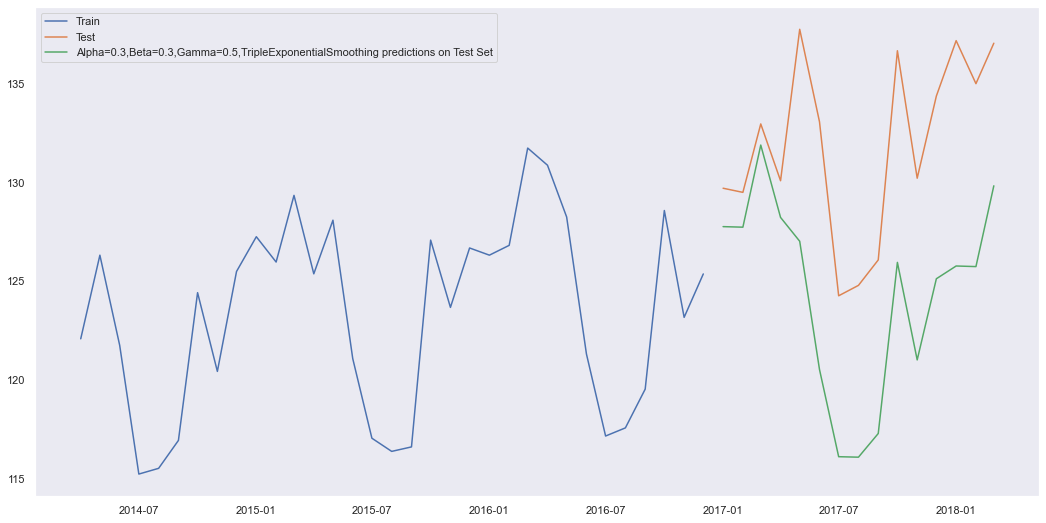

In [550]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_trainK['log_sales'], label='Train')
plt.plot(TES_testK['log_sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_testK['predict', 0.3, 0.3, 0.5], label='Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [551]:
temp_results_k_Df = pd.DataFrame({'Test RMSE': [resultsDf_kz.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing'])

results_k_Df = pd.concat([results_k_Df, temp_results_k_Df])
results_k_Df


RMSE  Test RMSE
ARIMA(0,0,2)                                        10.167475        NaN
ARIMA(0,1,0)                                         7.117171        NaN
SARIMA(2,1,2)(2,0,2,6)                               6.197020        NaN
SARIMA(2,1,2)(2,0,2,12)                              6.911286        NaN
TripleExponentialSmoothing                                NaN   5.801987
Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialS...        NaN   5.302363

In [552]:
print('Sorted by RMSE values on the Test Data:','\n',)
results_k_Df.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



RMSE  Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.5,TripleExponentialS...        NaN   5.302363
TripleExponentialSmoothing                                NaN   5.801987
ARIMA(0,0,2)                                        10.167475        NaN
ARIMA(0,1,0)                                         7.117171        NaN
SARIMA(2,1,2)(2,0,2,6)                               6.197020        NaN
SARIMA(2,1,2)(2,0,2,12)                              6.911286        NaN

In [553]:
fullmodel_k1 = ExponentialSmoothing(df_Kolkata,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=1.4901161193847656e-08,
                                                                 smoothing_trend=4.9206465347330555e-09,
                                                                 smoothing_seasonal=0.9999999850988388)

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [554]:
RMSE_fullmodel_k1 = metrics.mean_squared_error(df_Kolkata['log_sales'],fullmodel_k1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel_k1)

RMSE: 2.9569309738913034


In [555]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_ko1 = fullmodel_k1.forecast(steps=len(testK))

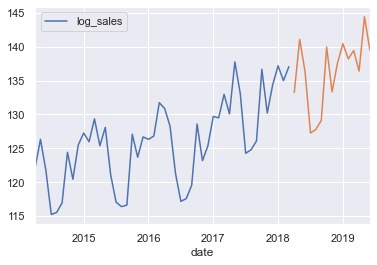

In [556]:
df_Kolkata.plot()
prediction_ko1.plot();

In [557]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_k1_df = pd.DataFrame({'lower_CI':prediction_ko1 - 1.96*np.std(fullmodel_k1.resid,ddof=1),
                          'prediction':prediction_ko1,
                          'upper_ci': prediction_ko1 + 1.96*np.std(fullmodel_k1.resid,ddof=1)})
pred_k1_df.head()

lower_CI  prediction    upper_ci
2018-04-01  127.382732  133.238145  139.093558
2018-05-01  135.221383  141.076796  146.932209
2018-06-01  130.421876  136.277289  142.132702
2018-07-01  121.403373  127.258786  133.114199
2018-08-01  121.936836  127.792250  133.647663

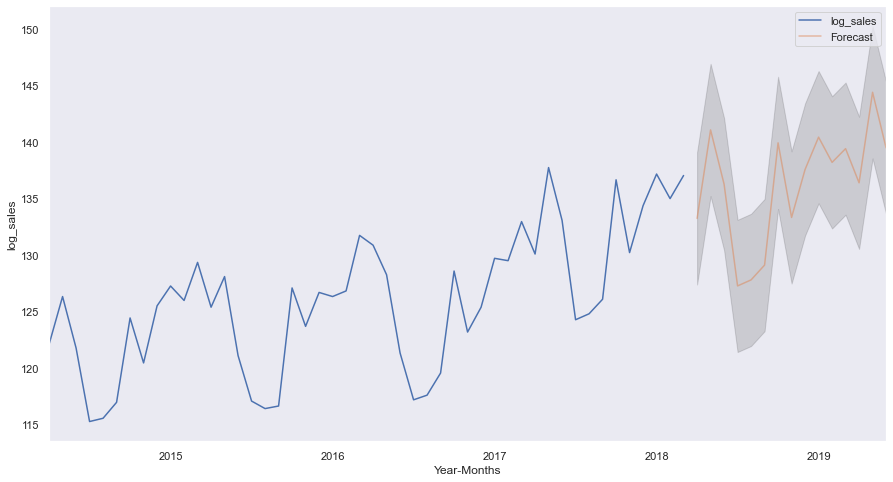

In [558]:
# plot the forecast along with the confidence band

axis = df_Kolkata.plot(label='Actual', figsize=(15,8))
pred_k1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_k1_df.index, pred_k1_df['lower_CI'], pred_k1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('log_sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [559]:
fullmodel_k2 = ExponentialSmoothing(df_Kolkata,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.3,
                                                                 smoothing_seasonal=0.5)

C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sathyabanu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [560]:
RMSE_fullmodel_k2 = metrics.mean_squared_error(df_Kolkata['log_sales'],fullmodel_k2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel_k2)

RMSE: 2.2254101014661076


In [561]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_ko2 = fullmodel_k2.forecast(steps=len(testK))

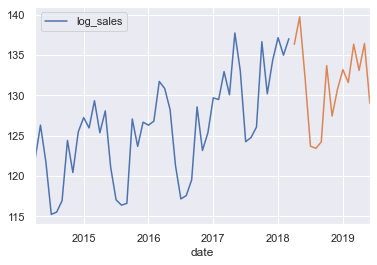

In [563]:
df_Kolkata.plot()
prediction_ko2.plot();

In [564]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_k2_df = pd.DataFrame({'lower_CI':prediction_ko2 - 1.96*np.std(fullmodel_k2.resid,ddof=1),
                          'prediction':prediction_ko2,
                          'upper_ci': prediction_ko2 + 1.96*np.std(fullmodel_k2.resid,ddof=1)})
pred_k2_df.head()

lower_CI  prediction    upper_ci
2018-04-01  131.950404  136.337944  140.725483
2018-05-01  135.371457  139.758997  144.146536
2018-06-01  127.776899  132.164438  136.551978
2018-07-01  119.322326  123.709866  128.097405
2018-08-01  119.048234  123.435774  127.823313

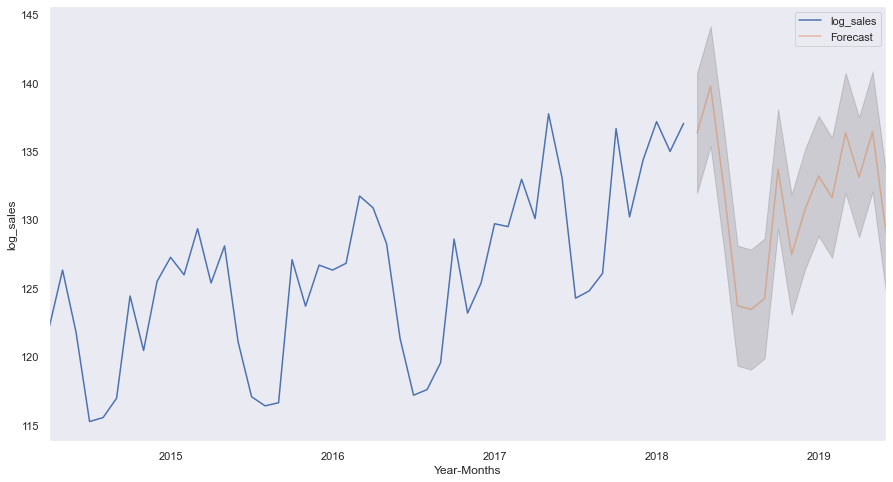

In [565]:
# plot the forecast along with the confidence band

axis = df_Kolkata.plot(label='Actual', figsize=(15,8))
pred_k2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_k2_df.index, pred_k2_df['lower_CI'], pred_k2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('log_sales')
plt.legend(loc='best')
plt.grid()
plt.show()

# 2). Model Tuning and business implication
## a.Ensemble modelling, wherever applicable
## b. Any other model tuning measures(if applicable)
## c. Interpretation of the most optimum model and its implication on the business

## ENSEMBLE TECHNIQUES:

In [582]:
df_Kolkata

log_sales
date                  
2014-04-01  122.087522
2014-05-01  126.317071
2014-06-01  121.759615
2014-07-01  115.245741
2014-08-01  115.535557
2014-09-01  116.947247
2014-10-01  124.421079
2014-11-01  120.437876
2014-12-01  125.493233
2015-01-01  127.250657
2015-02-01  125.970461
2015-03-01  129.342541
2015-04-01  125.373546
2015-05-01  128.086836
2015-06-01  121.085353
2015-07-01  117.058268
2015-08-01  116.392743
2015-09-01  116.619423
2015-10-01  127.079165
2015-11-01  123.676267
2015-12-01  126.681477
2016-01-01  126.318118
2016-02-01  126.814309
2016-03-01  131.735231
2016-04-01  130.867169
2016-05-01  128.248750
2016-06-01  121.319607
2016-07-01  117.169819
2016-08-01  117.581730
2016-09-01  119.540449
2016-10-01  128.576806
2016-11-01  123.172513
2016-12-01  125.368225
2017-01-01  129.703951
2017-02-01  129.494464
2017-03-01  132.956191
2017-04-01  130.083222
2017-05-01  137.742842
2017-06-01  133.063088
2017-07-01  124.263180
2017-08-01  124.789976
2017-09-01  126.077157
2017-10-01  136.658526
2017-11-01  130.210648
2017-12-01  134.366157
2018-01-01  137.168659
2018-02-01  134.993129
2018-03-01  137.039061

In [38]:
df_z=pd.read_csv('data_t10.csv')
df_z.head()

product        date    city    sales
0  Mixers  04-01-2014  Mumbai  2679347
1  Mixers  05-01-2014  Mumbai  3864612
2  Mixers  06-01-2014  Mumbai  2932658
3  Mixers  07-01-2014  Mumbai  3703713
4  Mixers  08-01-2014  Mumbai  3931029

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
df_z.drop("date",inplace=True,axis=1)

In [47]:
df_z.head()

product    city    sales
0  Mixers  Mumbai  2679347
1  Mixers  Mumbai  3864612
2  Mixers  Mumbai  2932658
3  Mixers  Mumbai  3703713
4  Mixers  Mumbai  3931029

In [48]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  4800 non-null   object
 1   city     4800 non-null   object
 2   sales    4800 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 112.6+ KB


In [49]:
df_z.describe()

sales
count  4.800000e+03
mean   7.415188e+05
std    1.308447e+06
min    0.000000e+00
25%    1.171152e+05
50%    3.077215e+05
75%    7.796660e+05
max    1.588133e+07

In [50]:
dups1 = df_z.duplicated()
print('Number of duplicate rows = %d' % (dups1.sum()))

Number of duplicate rows = 111


In [51]:
df_z[dups1]

product    city  sales
148   coolers  Mumbai      0
149   coolers  Mumbai      0
159   coolers  Mumbai      0
160   coolers  Mumbai      0
161   coolers  Mumbai      0
...       ...     ...    ...
4684  coolers   Delhi      0
4685  coolers   Delhi      0
4695  coolers   Delhi      0
4696  coolers   Delhi      0
4697  coolers   Delhi      0

[111 rows x 3 columns]

In [52]:
df_z.drop_duplicates(inplace=True) 

In [55]:
def univariateAnalysis_numeric(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_z[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df_z[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_z[column])
    plt.show()

In [56]:
df_num = df_z.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

1

Description of sales
----------------------------------------------------------------------------
count    4.689000e+03
mean     7.590521e+05
std      1.318815e+06
min      0.000000e+00
25%      1.288680e+05
50%      3.200130e+05
75%      7.950350e+05
max      1.588133e+07
Name: sales, dtype: float64 Distribution of sales
----------------------------------------------------------------------------


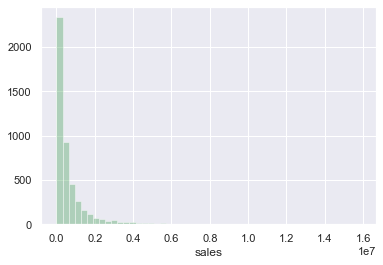

BoxPlot of sales
----------------------------------------------------------------------------


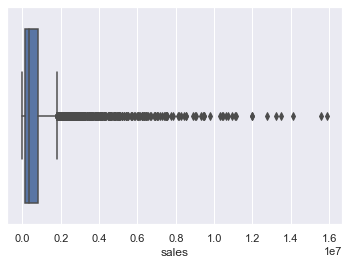

In [57]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x)

In [58]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    print("Percentage:")
    print(df_cat[cat_column].value_counts(normalize=True)*100)
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [59]:
df_cat = df_z.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['product', 'city']

Details of product
----------------------------------------------------------------
Dry Iron              480
Mixers                480
Oven Toaster Grill    480
Steam Iron            480
Gas Stove             480
Induction cookers     480
SECF                  480
Water Heaters         480
FoodProcessor         479
coolers               370
Name: product, dtype: int64
Percentage:
Dry Iron              10.236724
Mixers                10.236724
Oven Toaster Grill    10.236724
Steam Iron            10.236724
Gas Stove             10.236724
Induction cookers     10.236724
SECF                  10.236724
Water Heaters         10.236724
FoodProcessor         10.215398
coolers                7.890808
Name: product, dtype: float64


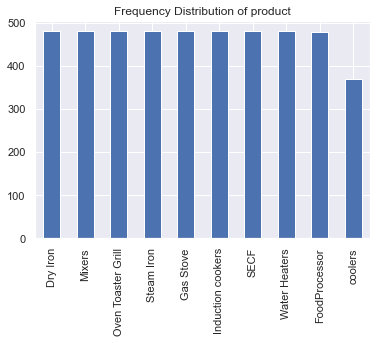

       
Details of city
----------------------------------------------------------------
Mumbai       469
Bangalore    469
Delhi        469
Chennai      469
Ahmd         469
Kolkata      469
Pune         469
Hyderabad    469
Cochin       469
Patna        468
Name: city, dtype: int64
Percentage:
Mumbai       10.002133
Bangalore    10.002133
Delhi        10.002133
Chennai      10.002133
Ahmd         10.002133
Kolkata      10.002133
Pune         10.002133
Hyderabad    10.002133
Cochin       10.002133
Patna         9.980806
Name: city, dtype: float64


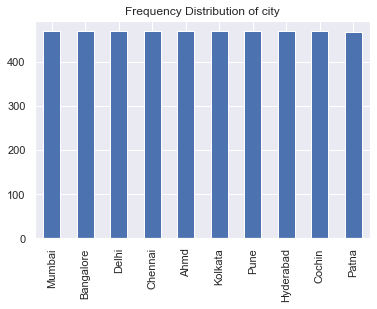

In [60]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

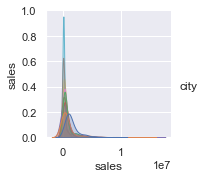

In [61]:
sns.pairplot(df_z,hue="city")

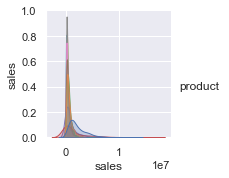

In [62]:
sns.pairplot(df_z,hue="product")

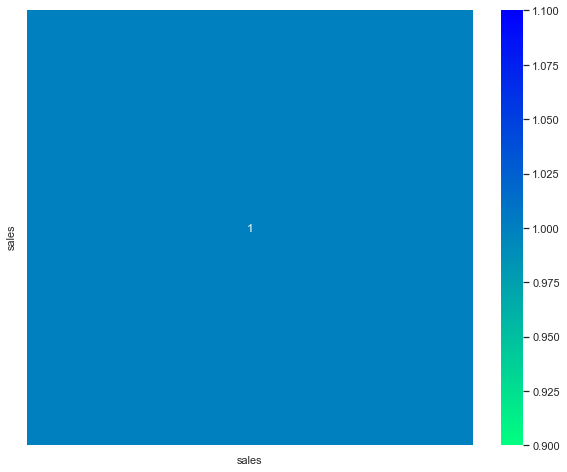

In [63]:
fig = plt.subplots(figsize=(10, 8))
sns.heatmap(df_z.corr(),mask=np.triu(df_z.corr(),+1),annot=True,cmap="winter_r")
plt.show()

In [65]:
df_z['product'] = pd.Categorical(df_z['product']).codes

In [67]:
df_z['city'] = pd.Categorical(df_z['city']).codes

In [68]:
df_z['city']

0       7
1       7
2       7
3       7
4       7
       ..
4795    4
4796    4
4797    4
4798    4
4799    4
Name: city, Length: 4689, dtype: int8

In [69]:
X = df_z.drop('city', axis=1) 
y = df_z[['city']]

In [70]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=124578,stratify=y)

In [72]:
model = LogisticRegression()

In [73]:
model.fit(X_train,y_train)

LogisticRegression()

In [74]:
model.score(X_train,y_train)

0.10024375380865326

In [75]:
model.score(X_test,y_test)

0.09950248756218906

In [76]:
grid={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'tol':[0.0001,0.00001,0.0001]}

In [77]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3)

In [79]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 1e-05, 0.0001]})

In [80]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(penalty='l1', solver='liblinear', tol=1e-05)


In [81]:
model.score(X_train,y_train)

0.10024375380865326

In [82]:
model.score(X_test,y_test)

0.09950248756218906

In [83]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,model.coef_[0][idx]))

The coefficient for product is 6.67940056672032e-13
The coefficient for sales is 7.003196154380356e-08


In [84]:
ytrain_predict_log = model.predict(X_train)
ytest_predict_log = model.predict(X_test)

In [85]:
log_train_acc = model.score(X_train, y_train)
log_train_acc

0.10024375380865326

In [86]:
log_test_acc = model.score(X_test, y_test)
log_test_acc

0.09950248756218906

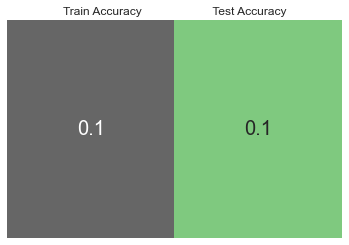

In [87]:
sns.heatmap(np.matrix([[log_train_acc,log_test_acc]]),annot=True,cmap='Accent',cbar=False,xticklabels=False,yticklabels=False,annot_kws={"fontsize":20})
plt.title('Train Accuracy                     Test Accuracy')
plt.show()

In [88]:
confusion_matrix(y_train, ytrain_predict_log)

array([[  0,   0,   0,   0,   1,   0,   0, 327,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 328,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 327,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 327,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 327,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 327,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 327,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 328,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 327,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 328,   0,   0]], dtype=int64)

In [89]:
print(classification_report(y_train, ytrain_predict_log))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       328
           1       0.00      0.00      0.00       329
           2       0.00      0.00      0.00       328
           3       0.00      0.00      0.00       328
           4       0.11      0.00      0.01       328
           5       0.00      0.00      0.00       328
           6       0.00      0.00      0.00       328
           7       0.10      1.00      0.18       328
           8       0.00      0.00      0.00       328
           9       0.00      0.00      0.00       329

    accuracy                           0.10      3282
   macro avg       0.02      0.10      0.02      3282
weighted avg       0.02      0.10      0.02      3282



In [90]:
confusion_matrix(y_test, ytest_predict_log)

array([[  0,   0,   0,   0,   0,   0,   0, 141,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 140,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 141,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 141,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 141,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 141,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 141,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 140,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 140,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 140,   0,   0]], dtype=int64)

In [91]:
print(classification_report(y_test, ytest_predict_log))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.00      0.00      0.00       140
           2       0.00      0.00      0.00       141
           3       0.00      0.00      0.00       141
           4       0.00      0.00      0.00       141
           5       0.00      0.00      0.00       141
           6       0.00      0.00      0.00       141
           7       0.10      0.99      0.18       141
           8       0.00      0.00      0.00       140
           9       0.00      0.00      0.00       140

    accuracy                           0.10      1407
   macro avg       0.01      0.10      0.02      1407
weighted avg       0.01      0.10      0.02      1407



In [92]:
log_test_report = classification_report(y_test,ytest_predict_log,output_dict=True)
df_z=pd.DataFrame(log_test_report).transpose()
log_test_prec = round(df_z.loc['1'][0],2)
log_test_rec = round(df_z.loc['1'][1],2)
log_test_f1 = round(df_z.loc['1'][2],2)

clf = LinearDiscriminantAnalysis()

clf.fit(X_train,y_train)

clf.score(X_train,y_train)

0.14564290067032298

In [93]:
clf.score(X_test,y_test)

0.12224591329068941

In [94]:
grid_lda={
      'solver':['svd', 'lsqr', 'eigen'],
      'tol':[0.0001,0.00001],
        'shrinkage':[0,0.1,0.4,0.7,1]}

In [95]:
grid_search = GridSearchCV(estimator = clf, param_grid = grid_lda, cv = 3)

In [96]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': [0, 0.1, 0.4, 0.7, 1],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05]})

In [97]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'shrinkage': 0.7, 'solver': 'lsqr', 'tol': 0.0001} 

LinearDiscriminantAnalysis(shrinkage=0.7, solver='lsqr')


In [98]:
clf = LinearDiscriminantAnalysis(shrinkage= 0 , solver = 'lsqr')
model_lda=clf.fit(X_train,y_train)

lda_train_acc = model_lda.score(X_train, y_train)
lda_train_acc

0.14564290067032298

In [99]:
lda_test_acc = model_lda.score(X_test, y_test)
lda_test_acc

0.12224591329068941

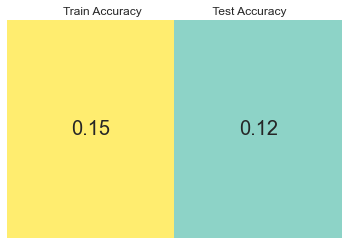

In [100]:
sns.heatmap(np.matrix([[lda_train_acc,lda_test_acc]]),annot=True,cmap='Set3',cbar=False,xticklabels=False,yticklabels=False,annot_kws={"fontsize":20})
plt.title('Train Accuracy                     Test Accuracy')
plt.show()

In [101]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,clf.coef_[0][idx]))

The coefficient for product is 0.5258813822048087
The coefficient for sales is 2.473008184609282e-07


In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

nb_train_acc = NB_model.score(X_train,y_train)
nb_train_acc

0.15447897623400367

In [104]:
nb_test_acc = NB_model.score(X_test,y_test)
nb_test_acc

0.1478322672352523

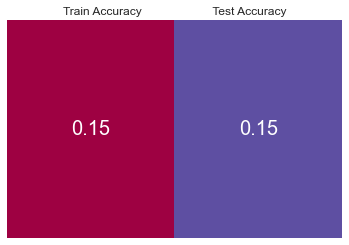

In [105]:
sns.heatmap(np.matrix([[nb_train_acc,nb_test_acc]]),annot=True,cmap='Spectral_r',cbar=False,xticklabels=False,yticklabels=False,annot_kws={"fontsize":20})
plt.title('Train Accuracy                     Test Accuracy')
plt.show()

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rfcl = RandomForestClassifier(n_estimators = 100,max_depth=6,min_samples_leaf=20,min_samples_split=60,random_state=561)
#rfcl = rfcl.fit(X_train, y_train)

In [108]:
rfcl.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=20, min_samples_split=60,
                       random_state=561)

In [109]:
rf_train_acc = rfcl.score(X_train,y_train)
rf_train_acc

0.34308348567946373

In [110]:
rf_test_acc = rfcl.score(X_test,y_test)
rf_test_acc

0.27221037668798864

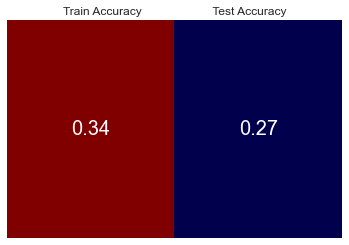

In [111]:
sns.heatmap(np.matrix([[rf_train_acc,rf_test_acc]]),annot=True,cmap='seismic',cbar=False,xticklabels=False,yticklabels=False,annot_kws={"fontsize":20})
plt.title('Train Accuracy                     Test Accuracy')
plt.show()

In [112]:
var_imp = pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns)

var_imp.sort_values('Imp',inplace=True,ascending=False)

print(var_imp)

              Imp
sales    0.745405
product  0.254595


In [113]:
from sklearn.ensemble import BaggingClassifier

In [114]:
bgcl = BaggingClassifier(base_estimator=GaussianNB(),n_estimators=100,random_state=15651)


In [115]:
bgcl = bgcl.fit(X_train, y_train)

In [116]:
bgcl.fit(X_train, y_train)

bg_train_acc = bgcl.score(X_train,y_train)
bg_train_acc

0.1563071297989031

In [117]:
bg_test_acc = bgcl.score(X_test,y_test)
bg_test_acc

0.14641080312722105

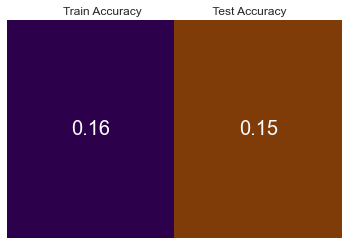

In [118]:
sns.heatmap(np.matrix([[bg_train_acc,bg_test_acc]]),annot=True,cmap='PuOr',cbar=False,xticklabels=False,yticklabels=False,annot_kws={"fontsize":20})
plt.title('Train Accuracy                     Test Accuracy')
plt.show()

In [121]:
df_z = pd.read_csv('data_t10.csv')
df_z.head()

product        date    city    sales
0  Mixers  04-01-2014  Mumbai  2679347
1  Mixers  05-01-2014  Mumbai  3864612
2  Mixers  06-01-2014  Mumbai  2932658
3  Mixers  07-01-2014  Mumbai  3703713
4  Mixers  08-01-2014  Mumbai  3931029

In [122]:
df_z.drop("date",inplace=True,axis=1)

In [123]:
df_z.head()

product    city    sales
0  Mixers  Mumbai  2679347
1  Mixers  Mumbai  3864612
2  Mixers  Mumbai  2932658
3  Mixers  Mumbai  3703713
4  Mixers  Mumbai  3931029

In [125]:
dups = df_z.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 111


In [126]:
df_z[dups]

product    city  sales
148   coolers  Mumbai      0
149   coolers  Mumbai      0
159   coolers  Mumbai      0
160   coolers  Mumbai      0
161   coolers  Mumbai      0
...       ...     ...    ...
4684  coolers   Delhi      0
4685  coolers   Delhi      0
4695  coolers   Delhi      0
4696  coolers   Delhi      0
4697  coolers   Delhi      0

[111 rows x 3 columns]

In [127]:
df_z.drop_duplicates(inplace=True) 

In [128]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    print("Percentage:")
    print(df_cat[cat_column].value_counts(normalize=True)*100)
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [129]:
df_cat = df_z.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['product', 'city']

Details of product
----------------------------------------------------------------
Dry Iron              480
Mixers                480
Oven Toaster Grill    480
Steam Iron            480
Gas Stove             480
Induction cookers     480
SECF                  480
Water Heaters         480
FoodProcessor         479
coolers               370
Name: product, dtype: int64
Percentage:
Dry Iron              10.236724
Mixers                10.236724
Oven Toaster Grill    10.236724
Steam Iron            10.236724
Gas Stove             10.236724
Induction cookers     10.236724
SECF                  10.236724
Water Heaters         10.236724
FoodProcessor         10.215398
coolers                7.890808
Name: product, dtype: float64


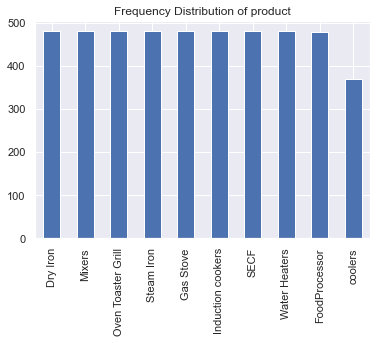

       
Details of city
----------------------------------------------------------------
Mumbai       469
Bangalore    469
Delhi        469
Chennai      469
Ahmd         469
Kolkata      469
Pune         469
Hyderabad    469
Cochin       469
Patna        468
Name: city, dtype: int64
Percentage:
Mumbai       10.002133
Bangalore    10.002133
Delhi        10.002133
Chennai      10.002133
Ahmd         10.002133
Kolkata      10.002133
Pune         10.002133
Hyderabad    10.002133
Cochin       10.002133
Patna         9.980806
Name: city, dtype: float64


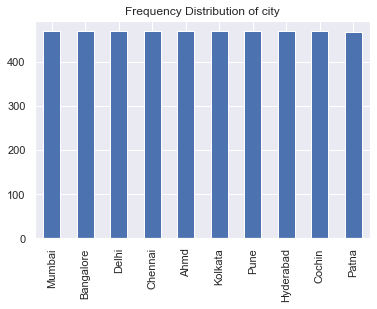

In [130]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

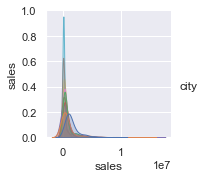

In [131]:
sns.pairplot(df_z,hue="city")

In [139]:
df_z['product'] = pd.Categorical(df_z['product']).codes
df_z['city']= pd.Categorical(df_z['city']).codes

In [140]:
X = df_z.drop('product', axis=1) 
y = df_z[['product']]

In [141]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=124578,stratify=y)

In [143]:
model = LogisticRegression()

In [144]:
model.fit(X_train,y_train)

LogisticRegression()

In [145]:
model.score(X_train,y_train)

0.10237659963436929

In [146]:
model.score(X_test,y_test)

0.1023454157782516

In [147]:
grid={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'tol':[0.0001,0.00001,0.0001]}

In [148]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3)

In [149]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 1e-05, 0.0001]})

In [150]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(penalty='l1', solver='liblinear')


In [151]:
model.score(X_train,y_train)

0.10237659963436929

In [152]:
model.score(X_test,y_test)

0.1023454157782516

In [153]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,model.coef_[0][idx]))

The coefficient for city is 4.213709365613188e-12
The coefficient for sales is 7.315182837745647e-08


In [154]:
ytrain_predict_log = model.predict(X_train)
ytest_predict_log = model.predict(X_test)

In [155]:
log_train_acc = model.score(X_train, y_train)
log_train_acc

0.10237659963436929

In [156]:
log_test_acc = model.score(X_test, y_test)
log_test_acc

0.1023454157782516

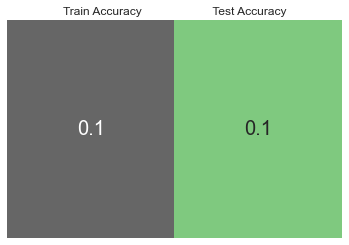

In [157]:
sns.heatmap(np.matrix([[log_train_acc,log_test_acc]]),annot=True,cmap='Accent',cbar=False,xticklabels=False,yticklabels=False,annot_kws={"fontsize":20})
plt.title('Train Accuracy                     Test Accuracy')
plt.show()

In [158]:
confusion_matrix(y_train, ytrain_predict_log)

array([[  0,   0,   0,   0, 336,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 335,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 336,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 336,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 336,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 336,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 336,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 336,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 336,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 252,   0,   7,   0,   0,   0]], dtype=int64)

In [159]:
print(classification_report(y_train, ytrain_predict_log))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       336
           1       0.00      0.00      0.00       335
           2       0.00      0.00      0.00       336
           3       0.00      0.00      0.00       336
           4       0.10      1.00      0.19       336
           5       0.00      0.00      0.00       336
           6       0.00      0.00      0.00       336
           7       0.00      0.00      0.00       336
           8       0.00      0.00      0.00       336
           9       0.00      0.00      0.00       259

    accuracy                           0.10      3282
   macro avg       0.01      0.10      0.02      3282
weighted avg       0.01      0.10      0.02      3282



In [160]:
confusion_matrix(y_test, ytest_predict_log)

array([[  0,   0,   0,   0, 144,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 144,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 144,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 144,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 144,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 144,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 144,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 144,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 144,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 108,   0,   3,   0,   0,   0]], dtype=int64)

In [161]:
print(classification_report(y_test, ytest_predict_log))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.00      0.00      0.00       144
           2       0.00      0.00      0.00       144
           3       0.00      0.00      0.00       144
           4       0.10      1.00      0.19       144
           5       0.00      0.00      0.00       144
           6       0.00      0.00      0.00       144
           7       0.00      0.00      0.00       144
           8       0.00      0.00      0.00       144
           9       0.00      0.00      0.00       111

    accuracy                           0.10      1407
   macro avg       0.01      0.10      0.02      1407
weighted avg       0.01      0.10      0.02      1407



In [162]:
log_test_report = classification_report(y_test,ytest_predict_log,output_dict=True)
df=pd.DataFrame(log_test_report).transpose()
log_test_prec = round(df.loc['1'][0],2)
log_test_rec = round(df.loc['1'][1],2)
log_test_f1 = round(df.loc['1'][2],2)

clf = LinearDiscriminantAnalysis()

clf.fit(X_train,y_train)

clf.score(X_train,y_train)

0.1809872029250457

In [163]:
clf.score(X_test,y_test)

0.1712864250177683

In [164]:
grid_lda={
      'solver':['svd', 'lsqr', 'eigen'],
      'tol':[0.0001,0.00001],
        'shrinkage':[0,0.1,0.4,0.7,1]}

In [165]:
grid_search = GridSearchCV(estimator = clf, param_grid = grid_lda, cv = 3)

In [166]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': [0, 0.1, 0.4, 0.7, 1],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05]})

In [167]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'shrinkage': 0.1, 'solver': 'lsqr', 'tol': 0.0001} 

LinearDiscriminantAnalysis(shrinkage=0.1, solver='lsqr')


In [168]:
clf = LinearDiscriminantAnalysis(shrinkage= 0 , solver = 'lsqr')
model_lda=clf.fit(X_train,y_train)

lda_train_acc = model_lda.score(X_train, y_train)
lda_train_acc

0.1809872029250457

In [169]:
lda_test_acc = model_lda.score(X_test, y_test)
lda_test_acc

0.1712864250177683

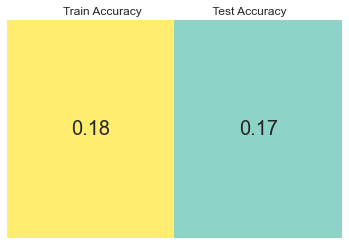

In [170]:
sns.heatmap(np.matrix([[lda_train_acc,lda_test_acc]]),annot=True,cmap='Set3',cbar=False,xticklabels=False,yticklabels=False,annot_kws={"fontsize":20})
plt.title('Train Accuracy                     Test Accuracy')
plt.show()

In [171]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,clf.coef_[0][idx]))

The coefficient for city is 0.5481180423202869
The coefficient for sales is 3.883543679802363e-07


In [172]:
from sklearn.naive_bayes import GaussianNB

In [173]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

nb_train_acc = NB_model.score(X_train,y_train)
nb_train_acc

0.1660572821450335

In [174]:
nb_test_acc = NB_model.score(X_test,y_test)
nb_test_acc

0.17057569296375266

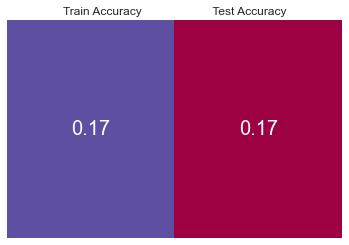

In [175]:
sns.heatmap(np.matrix([[nb_train_acc,nb_test_acc]]),annot=True,cmap='Spectral_r',cbar=False,xticklabels=False,yticklabels=False,annot_kws={"fontsize":20})
plt.title('Train Accuracy                     Test Accuracy')
plt.show()

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
rfcl = RandomForestClassifier(n_estimators = 100,max_depth=6,min_samples_leaf=20,min_samples_split=60,random_state=561)
#rfcl = rfcl.fit(X_train, y_train)

In [178]:
rfcl.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=20, min_samples_split=60,
                       random_state=561)

In [179]:
rf_train_acc = rfcl.score(X_train,y_train)
rf_train_acc

0.37903717245581964

In [180]:
rf_test_acc = rfcl.score(X_test,y_test)
rf_test_acc

0.3361762615493959

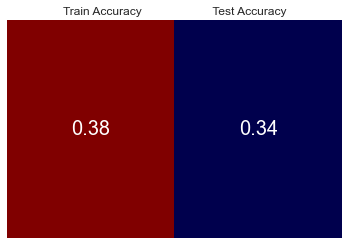

In [181]:
sns.heatmap(np.matrix([[rf_train_acc,rf_test_acc]]),annot=True,cmap='seismic',cbar=False,xticklabels=False,yticklabels=False,annot_kws={"fontsize":20})
plt.title('Train Accuracy                     Test Accuracy')
plt.show()

In [182]:
var_imp = pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns)

var_imp.sort_values('Imp',inplace=True,ascending=False)

print(var_imp)

            Imp
sales  0.832228
city   0.167772


In [183]:
from sklearn.ensemble import BaggingClassifier

In [184]:
bgcl = BaggingClassifier(base_estimator=GaussianNB(),n_estimators=100,random_state=15651)


In [185]:
bgcl = bgcl.fit(X_train, y_train)

In [186]:
bgcl.fit(X_train, y_train)

bg_train_acc = bgcl.score(X_train,y_train)
bg_train_acc

0.1663619744058501

In [187]:
bg_test_acc = bgcl.score(X_test,y_test)
bg_test_acc

0.1691542288557214

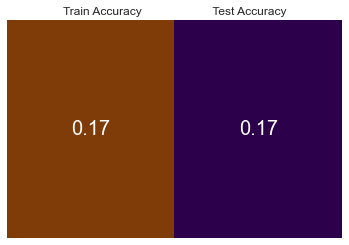

In [188]:
sns.heatmap(np.matrix([[bg_train_acc,bg_test_acc]]),annot=True,cmap='PuOr',cbar=False,xticklabels=False,yticklabels=False,annot_kws={"fontsize":20})
plt.title('Train Accuracy                     Test Accuracy')
plt.show()